### Imports

In [65]:
import pandas as pd
from auto_ts import auto_timeseries
import dill
import talib
import numpy as np

In [66]:
# Evito que ciertas columnas se transformen a notacion cientifica en las predicciones
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

### Dataset

In [67]:
columns = [
    'Open_time',
    'Open',
    'High',
    'Low',
    'Close',
    'Number of trades',
    'Close_BTCUSDT',
    'Volume_BTCUSDT',
    'Number_of_trades_BTCUSDT',
    'Close_ETHUSDT',
    'Volume_ETHUSDT',
    'Number_of_trades_ETHUSDT',
    'Close_BNBUSDT',
    'Volume_BNBUSDT',
    'Number_of_trades_BNBUSDT',
    'SMA_20',
    'EMA_20',
    'Upper_Band',
    'Middle_Band',
    'Lower_Band',
    'RSI',
    'buy_1000x_high_coinbase',
    'sell_1000x_high_coinbase',
    'total_trades_coinbase',	
    'Tweets_Utilizados',
    'Tweets_Utilizados_coin',
    'Tweets_Utilizados_referentes',
    'Tweets_Utilizados_whale_alert',
    'Buy_1000x_high',
    'sell_1000x_high',
    'total_trades_binance'
]
columns_to_model=[
    'Open',
    'High',
    'Low',
    'Close',
    'Number of trades',
    'Close_BTCUSDT',
    'Volume_BTCUSDT',
    'Number_of_trades_BTCUSDT',
    'Close_ETHUSDT',
    'Volume_ETHUSDT',
    'Number_of_trades_ETHUSDT',
    'Close_BNBUSDT',
    'Volume_BNBUSDT',
    'Number_of_trades_BNBUSDT',
    # 'SMA_20',
    # 'EMA_20',
    # 'Upper_Band',
    # 'Middle_Band',
    # 'Lower_Band',
    # 'RSI',
    'buy_1000x_high_coinbase',
    'sell_1000x_high_coinbase',
    'total_trades_coinbase',	
    'Tweets_Utilizados',
    'Tweets_Utilizados_coin',
    'Tweets_Utilizados_referentes',
    'Tweets_Utilizados_whale_alert',
    'Buy_1000x_high',
    'sell_1000x_high',
    'total_trades_binance'
]

In [68]:
dataset = pd.read_csv('/Users/mmarchetta/Desktop/Tesis-2024/data-visualization/final_dataset.csv') 
dataset['Open_time'] = pd.to_datetime(dataset['Open_time'])

In [69]:
display(dataset.head())

Open_time  Open  High   Low  Close      Volume  Quote asset volume  \
0 2021-09-27 28.84 30.26 27.50  27.71 11094418.10        320340017.82   
1 2021-09-28 27.72 28.38 26.14  26.31  9784154.53        267560973.69   
2 2021-09-29 26.31 28.59 26.11  27.28 10207287.33        280535376.38   
3 2021-09-30 27.28 28.99 27.13  28.62  8201551.44        230622998.43   
4 2021-10-01 28.61 32.33 28.50  31.94 13176348.21        402700970.65   

   Number of trades  Open_BTCUSDT  High_BTCUSDT  Low_BTCUSDT  Close_BTCUSDT  \
0         449178.00      43160.90      44350.00     42098.00       42147.35   
1         362304.00      42147.35      42787.38     40888.00       41026.54   
2         376232.00      41025.01      42590.00     40753.88       41524.28   
3         339737.00      41524.29      44141.37     41410.17       43824.10   
4         735059.00      43820.01      48495.00     43283.03       48141.61   

   Volume_BTCUSDT  Quote_asset_volume_BTCUSDT  Number_of_trades_BTCUSDT  \
0        39776.84               1728912299.80                1001487.00   
1        43372.26               1816305387.84                1045389.00   
2        33511.53               1399625476.06                 884909.00   
3        46381.23               2005486003.56                1197815.00   
4        66244.87               3076094886.59                1771237.00   

   Open_ETHUSDT  High_ETHUSDT  Low_ETHUSDT  Close_ETHUSDT  Volume_ETHUSDT  \
0       3059.36       3164.94      2922.71        2925.59       510130.73   
1       2924.76       2970.82      2789.00        2804.91       511325.46   
2       2805.15       2950.00      2782.00        2850.45       411305.09   
3       2850.45       3048.42      2837.19        3000.61       506896.76   
4       3000.62       3330.00      2969.07        3309.91       648714.62   

   Quote_asset_volume_ETHUSDT  Number_of_trades_ETHUSDT  Open_BNBUSDT  \
0               1564096695.37                1043885.00        344.00   
1               1477983245.67                 928494.00        335.50   
2               1180681056.16                 748804.00        332.90   
3               1514341937.31                 992243.00        367.70   
4               2063112280.67                1446386.00        387.50   

   High_BNBUSDT  Low_BNBUSDT  Close_BNBUSDT  Volume_BNBUSDT  \
0        357.60       335.00         335.50       956544.07   
1        344.60       330.00         333.00       922077.23   
2        375.40       331.20         367.70      1696420.04   
3        388.80       366.40         387.50      1163674.21   
4        423.40       381.50         421.50      1440336.04   

   Quote_asset_volume_BNBUSDT  Number_of_trades_BNBUSDT  SMA_20  EMA_20  \
0                332372476.51                 457187.00   31.85   30.83   
1                310828343.70                 417006.00   31.77   30.40   
2                612547661.88                 653011.00   31.65   30.10   
3                439628574.42                 551245.00   31.62   29.96   
4                584311192.72                 727854.00   31.64   30.15   

   Upper_Band  Middle_Band  Lower_Band   RSI  MACD  Signal   ADX  SlowK  \
0       38.30        31.85       25.39 44.11  0.02    0.96 21.20  24.79   
1       38.44        31.77       25.11 41.83 -0.33    0.70 21.98  16.10   
2       38.55        31.65       24.74 43.99 -0.52    0.46 22.61  12.88   
3       38.56        31.62       24.67 46.92 -0.56    0.26 22.99  16.42   
4       38.58        31.64       24.69 53.42 -0.31    0.14 21.86  34.90   

   SlowD     CCI  ATR   MFI  buy_1000x_high_coinbase  \
0  33.78  -86.30 4.00 29.23                     0.00   
1  24.47 -109.46 3.88 19.19                     4.00   
2  17.92  -92.93 3.78 23.82                    22.00   
3  15.13  -60.03 3.64 28.34                    15.00   
4  21.40   34.17 3.65 35.02                    24.00   

   sell_1000x_high_coinbase  total_trades_coinbase Sentimiento  \
0                      0.00                   0.00  

In [70]:
n_days_to_predict = 10

dates = dataset['Open_time'][:-n_days_to_predict]

dataset = dataset.round(2)

feature_dataset = dataset[columns]
# feature_dataset['Open_time'] = dataset['Open_time']
# feature_dataset.set_index('Open_time', inplace=True)

validation = feature_dataset[-n_days_to_predict:]
feature_dataset = feature_dataset[:-n_days_to_predict]

In [71]:
display(feature_dataset.head())
print(feature_dataset.shape)

display(validation.head())
display(validation.shape)

Open_time  Open  High   Low  Close  Number of trades  Close_BTCUSDT  \
0 2021-09-27 28.84 30.26 27.50  27.71         449178.00       42147.35   
1 2021-09-28 27.72 28.38 26.14  26.31         362304.00       41026.54   
2 2021-09-29 26.31 28.59 26.11  27.28         376232.00       41524.28   
3 2021-09-30 27.28 28.99 27.13  28.62         339737.00       43824.10   
4 2021-10-01 28.61 32.33 28.50  31.94         735059.00       48141.61   

   Volume_BTCUSDT  Number_of_trades_BTCUSDT  Close_ETHUSDT  Volume_ETHUSDT  \
0        39776.84                1001487.00        2925.59       510130.73   
1        43372.26                1045389.00        2804.91       511325.46   
2        33511.53                 884909.00        2850.45       411305.09   
3        46381.23                1197815.00        3000.61       506896.76   
4        66244.87                1771237.00        3309.91       648714.62   

   Number_of_trades_ETHUSDT  Close_BNBUSDT  Volume_BNBUSDT  \
0                1043885.00         335.50       956544.07   
1                 928494.00         333.00       922077.23   
2                 748804.00         367.70      1696420.04   
3                 992243.00         387.50      1163674.21   
4                1446386.00         421.50      1440336.04   

   Number_of_trades_BNBUSDT  SMA_20  EMA_20  Upper_Band  Middle_Band  \
0                 457187.00   31.85   30.83       38.30        31.85   
1                 417006.00   31.77   30.40       38.44        31.77   
2                 653011.00   31.65   30.10       38.55        31.65   
3                 551245.00   31.62   29.96       38.56        31.62   
4                 727854.00   31.64   30.15       38.58        31.64   

   Lower_Band   RSI  buy_1000x_high_coinbase  sell_1000x_high_coinbase  \
0       25.39 44.11                     0.00                      0.00   
1       25.11 41.83                     4.00                      2.00   
2       24.74 43.99                    22.00                     40.00   
3       24.67 46.92                    15.00                     23.00   
4       24.69 53.42                    24.00                     35.00   

   total_trades_coinbase  Tweets_Utilizados  Tweets_Utilizados_coin  \
0                   0.00                139                     135   
1                5273.00                 93                     122   
2               54144.00                112                     145   
3               39220.00                116                     147   
4               63183.00                171                     141   

   Tweets_Utilizados_referentes  Tweets_Utilizados_whale_alert  \
0                          1.00                          81.00   
1                          2.00                          87.00   
2                          0.00                          64.00   
3                          2.00                          77.00   
4                          1.00                          71.00   

   Buy_1000x_high  sell_1000x_high  total_trades_binance  
0          525.00           364.00             270000.00  
1          472.00           331.00             204000.00  
2          594.00           495.00             216000.00  
3          419.00           464.00             202000.00  
4          477.00           664.00             492000.00

(946, 31)


Open_time  Open  High  Low  Close  Number of trades  Close_BTCUSDT  \
946 2024-04-30  6.59  6.67 6.04   6.42         115512.00       60672.00   
947 2024-05-01  6.42  6.94 6.13   6.90         175570.00       58364.97   
948 2024-05-02  6.90  7.41 6.69   7.27         109002.00       59060.61   
949 2024-05-03  7.27  7.39 7.00   7.24         109634.00       62882.01   
950 2024-05-04  7.24  7.28 7.10   7.12          71120.00       63892.04   

     Volume_BTCUSDT  Number_of_trades_BTCUSDT  Close_ETHUSDT  Volume_ETHUSDT  \
946        54947.66                1985671.00        3014.05       561717.49   
947        81166.47                2401089.00        2972.46       624963.78   
948        47583.82                1572898.00        2986.19       365939.72   
949        43628.40                1558661.00        3102.61       355825.84   
950        24368.69                1113509.00        3117.23       196263.95   

     Number_of_trades_ETHUSDT  Close_BNBUSDT  Volume_BNBUSDT  \
946                1292873.00         578.40       766513.45   
947                1365039.00         561.80       669027.32   
948                 880167.00         560.50       359794.32   
949                 859542.00         587.00       342906.43   
950                 575026.00         585.70       197129.25   

     Number_of_trades_BNBUSDT  SMA_20  EMA_20  Upper_Band  Middle_Band  \
946                 486465.00    6.93    7.13        7.80         6.93   
947                 427425.00    6.85    7.11        7.41         6.85   
948                 250921.00    6.85    7.12        7.42         6.85   
949                 257575.00    6.90    7.14        7.44         6.90   
950                 210303.00    6.91    7.13        7.46         6.91   

     Lower_Band   RSI  buy_1000x_high_coinbase  sell_1000x_high_coinbase  \
946        6.05 34.18                    51.00                     55.00   
947        6.29 43.30                    42.00                     50.00   
948        6.29 49.27                    87.00                     57.00   
949        6.35 48.86                    52.00                     40.00   
950        6.36 46.98                    68.00                     50.00   

     total_trades_coinbase  Tweets_Utilizados  Tweets_Utilizados_coin  \
946               48709.00                142                     187   
947               83718.00                130                     177   
948               61208.00                461                     374   
949               46255.00                573                     474   
950               34251.00                407                     472   

     Tweets_Utilizados_referentes  Tweets_Utilizados_whale_alert  \
946                          1.00                          23.00   
947                          0.00                          36.00   
948                          1.00                          25.00   
949                          1.00                          22.00   
950                          0.00                          14.00   

     Buy_1000x_high  sell_1000x_high  total_trades_binance  
946          379.00           377.00              70000.00  
947          327.00           340.00             107000.00  
948          270.00           282.00              71000.00  
949          386.00           635.00              69000.00  
950          203.00           232.00              49000.00

(10, 31)

### Models

#### Generacion de los modelos

Start of Fit.....
    Target variable given as = target
Start of loading of data.....
    Inputs: ts_column = timestamp, sep = ,, target = ['target']
    Using given input: pandas dataframe...
    timestamp column exists in given train data...
    train data shape = (946, 1)
Alert: Could not detect strf_time_format of timestamp. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


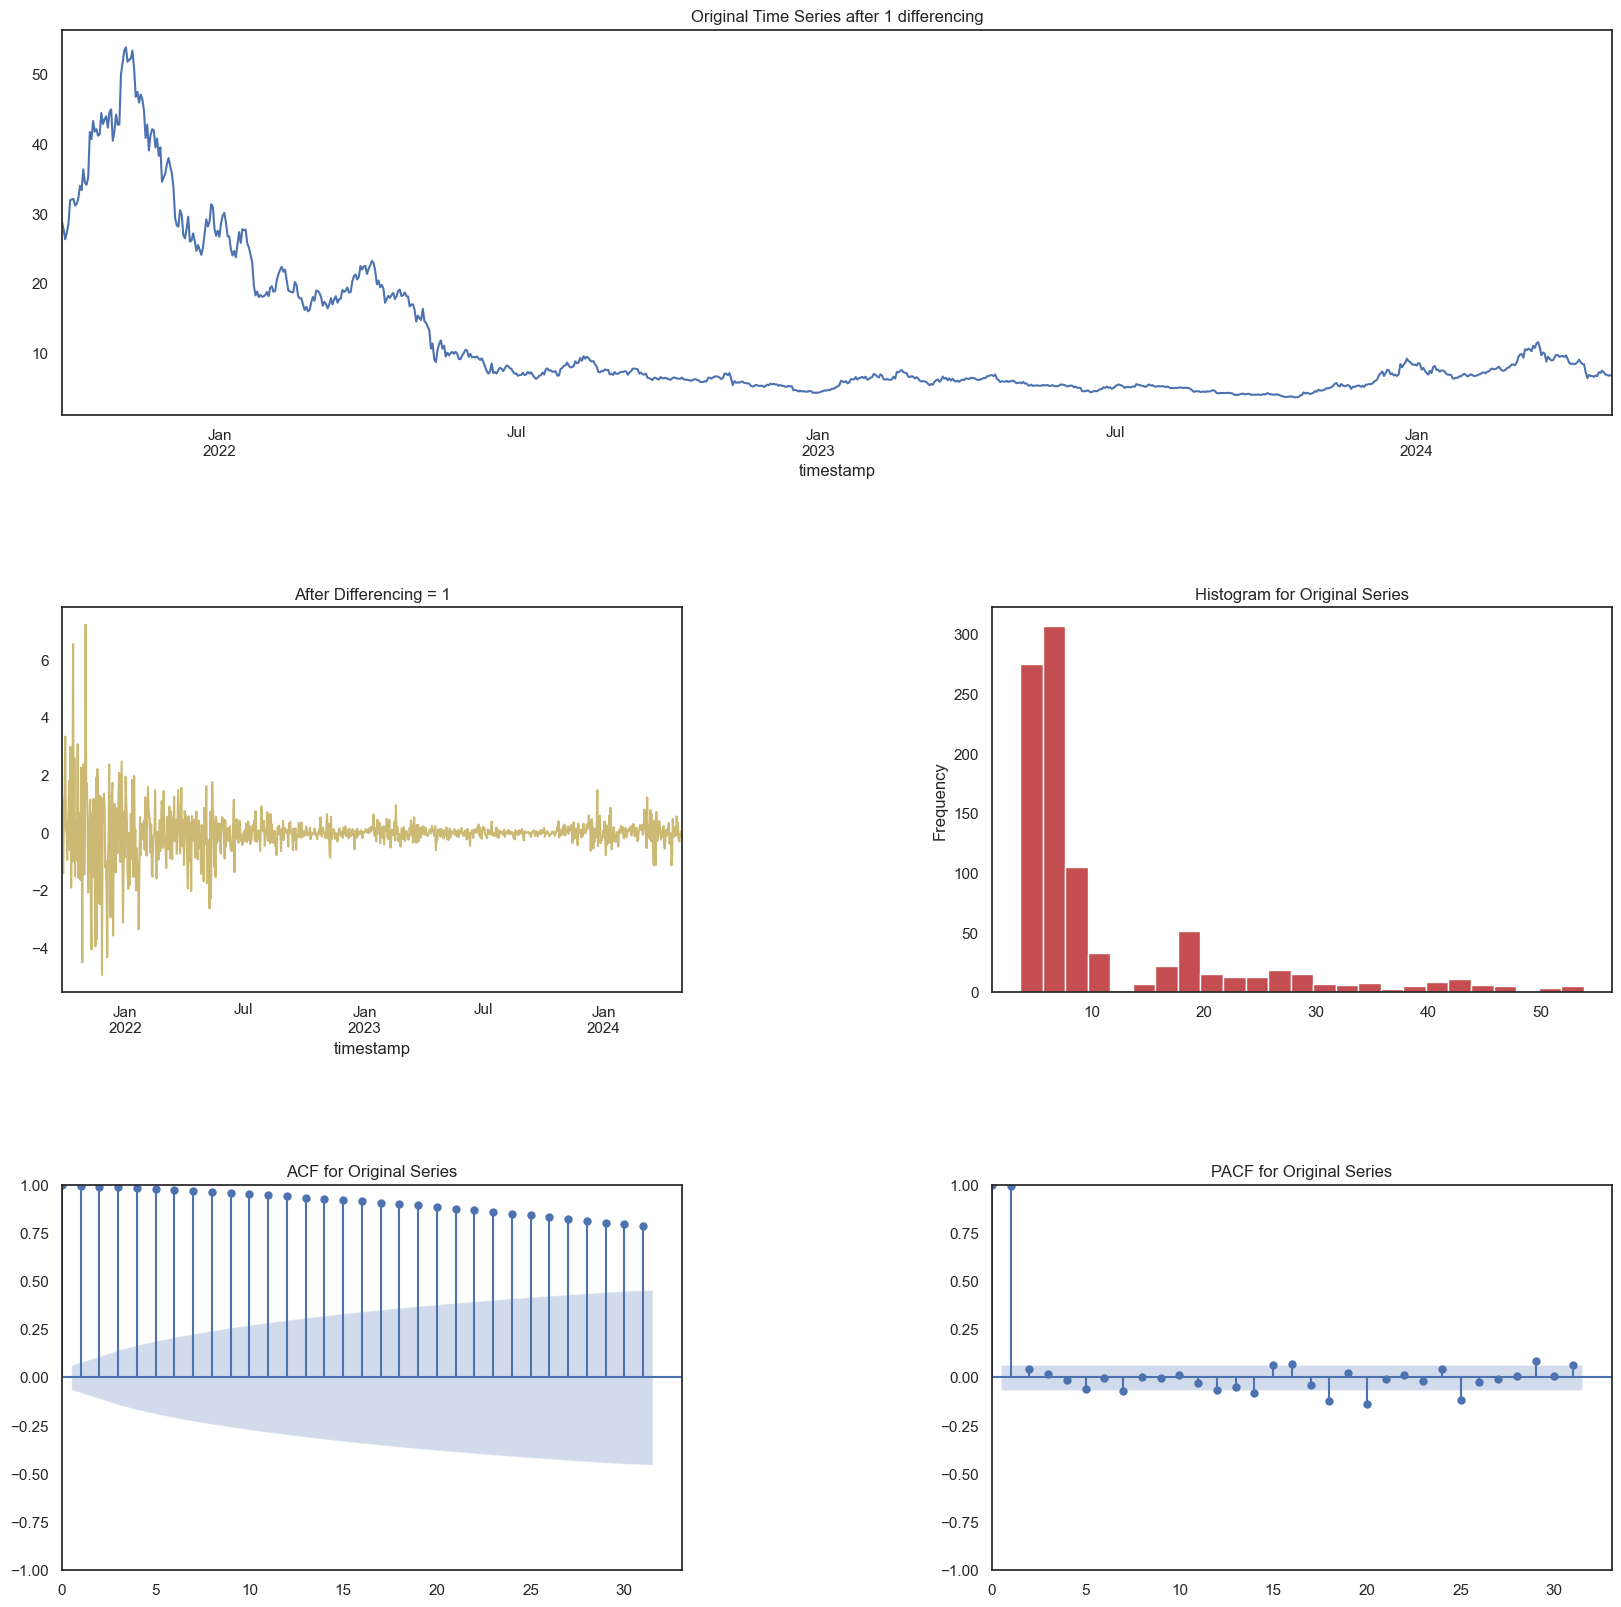

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2174.385, Time=0.13 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2169.193, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2170.350, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2172.953, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2175.153, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2165.537, Time=0.99 sec
 ARIMA(1,1,0)(3,0,0)[12] intercept   : AIC=2166.674, Time=2.36 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=2165.478, Time=1.95 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=21

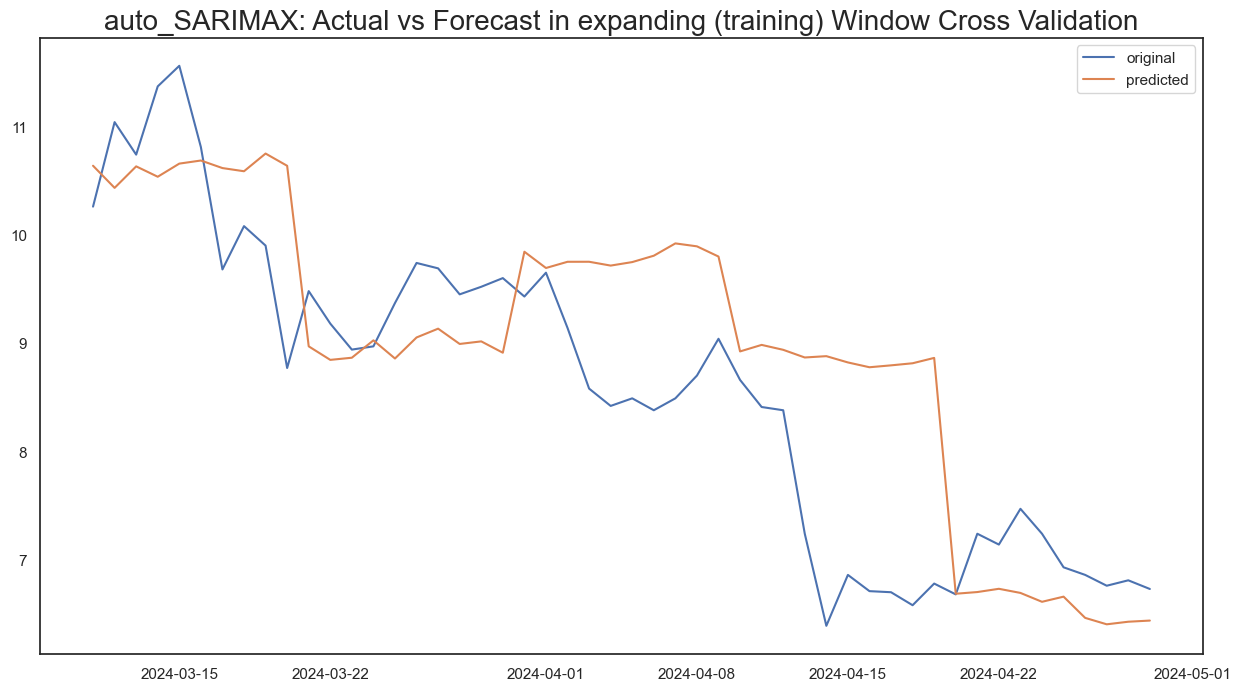

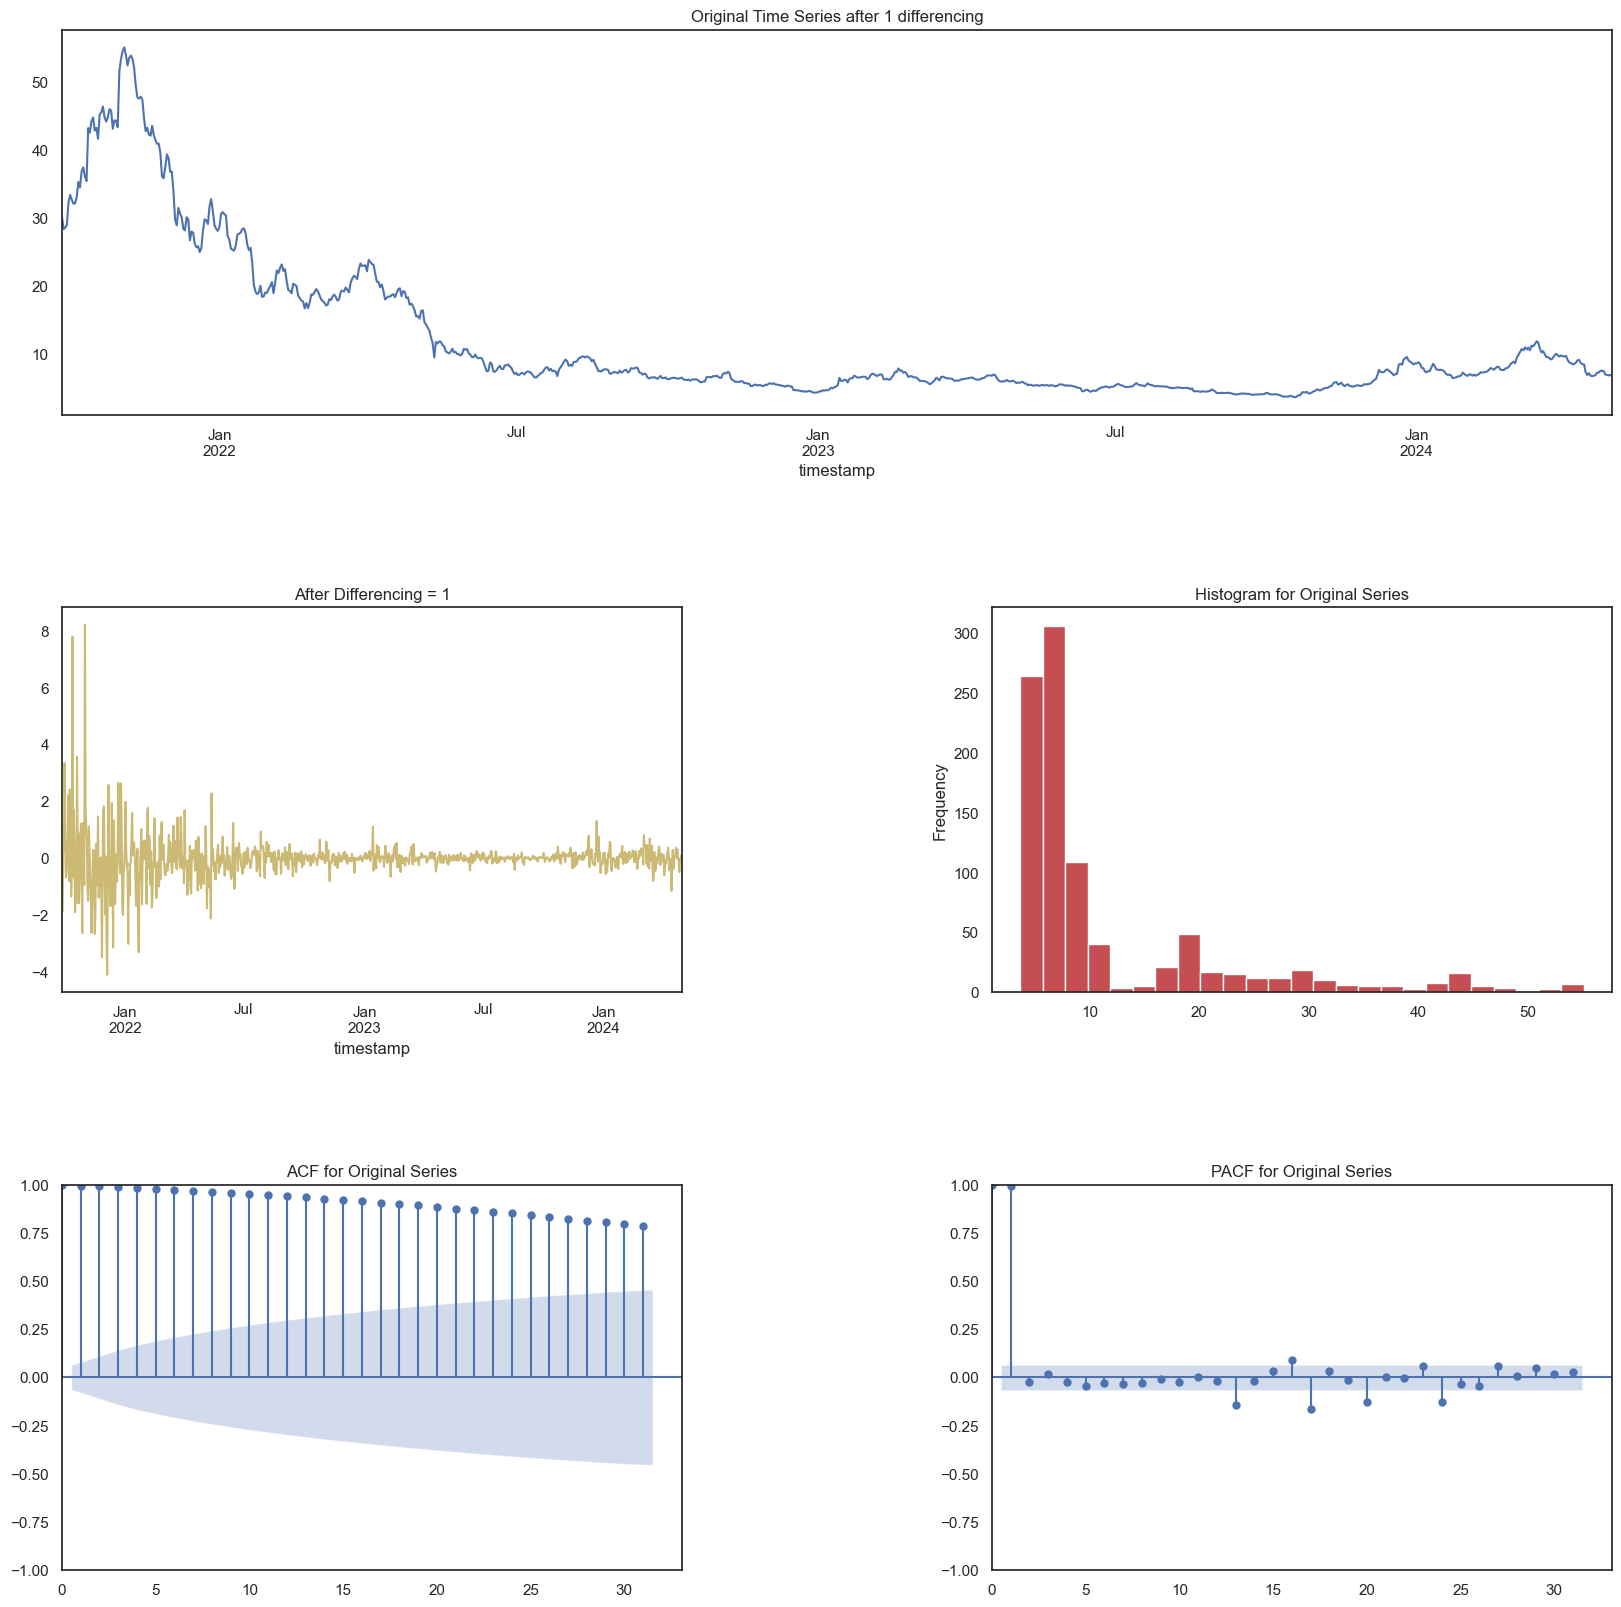

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2010.065, Time=0.15 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1981.783, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1983.511, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2008.851, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2001.786, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1979.786, Time=0.77 sec
 ARIMA(1,1,0)(3,0,0)[12] intercept   : AIC=1980.052, Time=2.12 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1976.731, Time=2.39 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=19

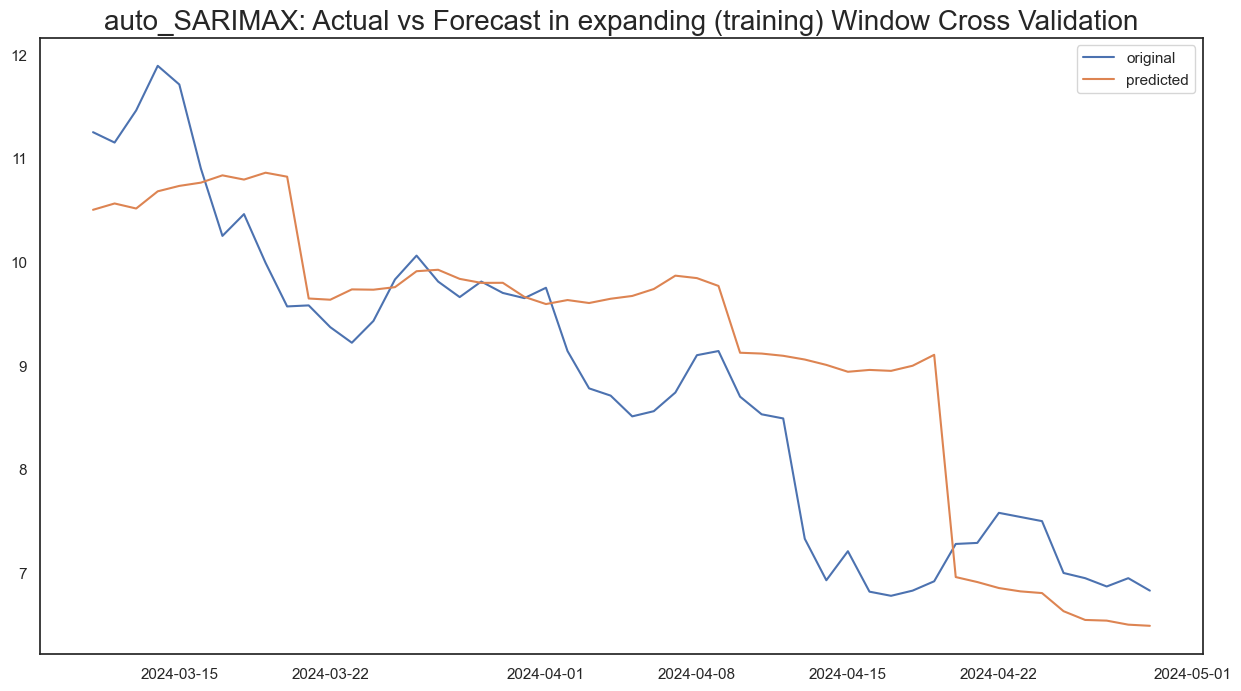

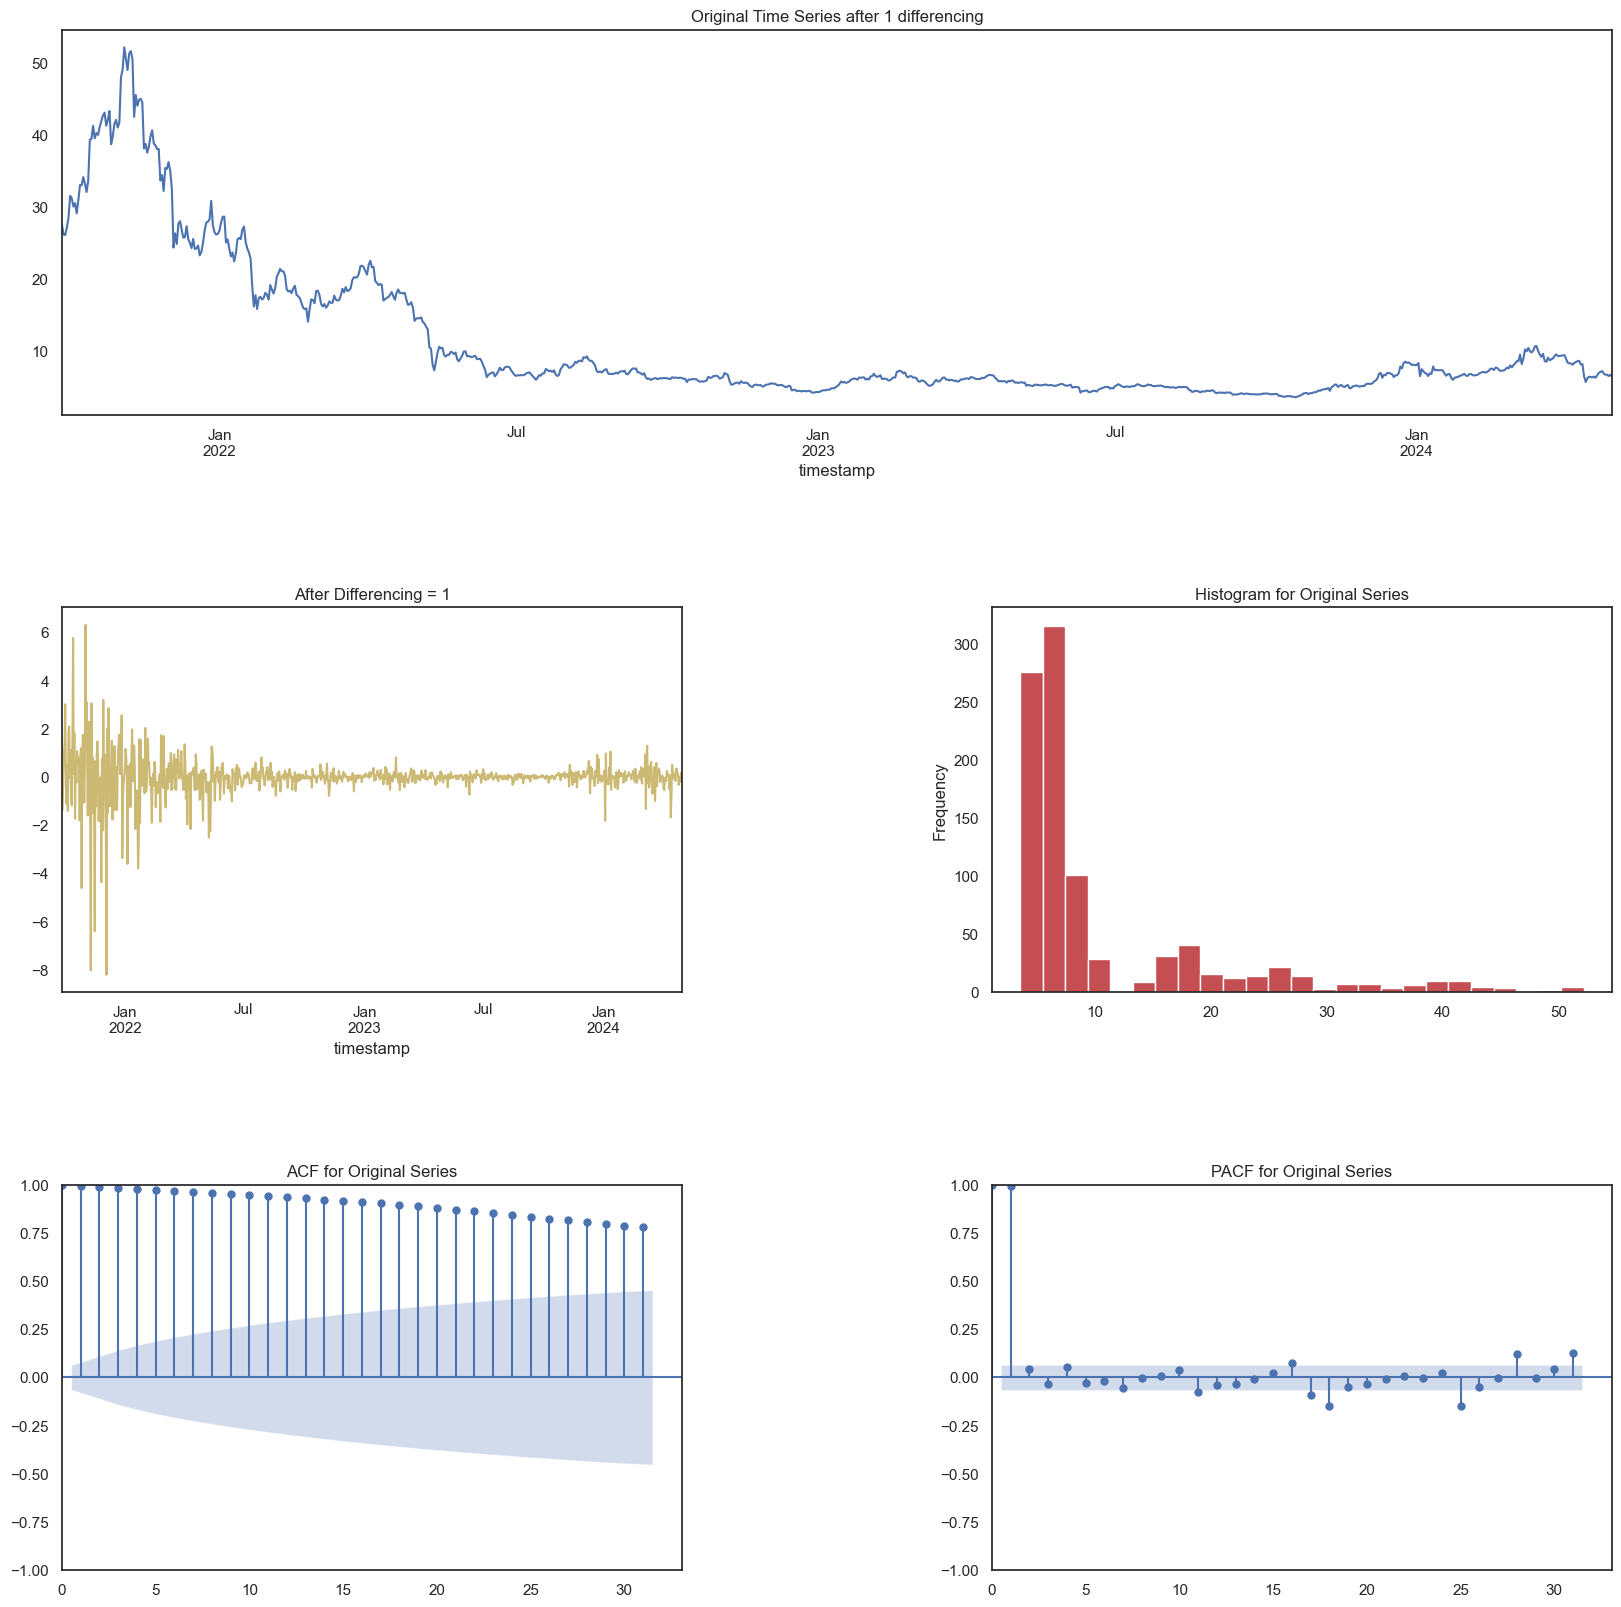

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2244.565, Time=0.13 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2244.775, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2245.639, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2243.045, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2243.527, Time=0.18 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2244.365, Time=0.19 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2235.008, Time=0.66 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=2200.726, Time=1.49 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=22

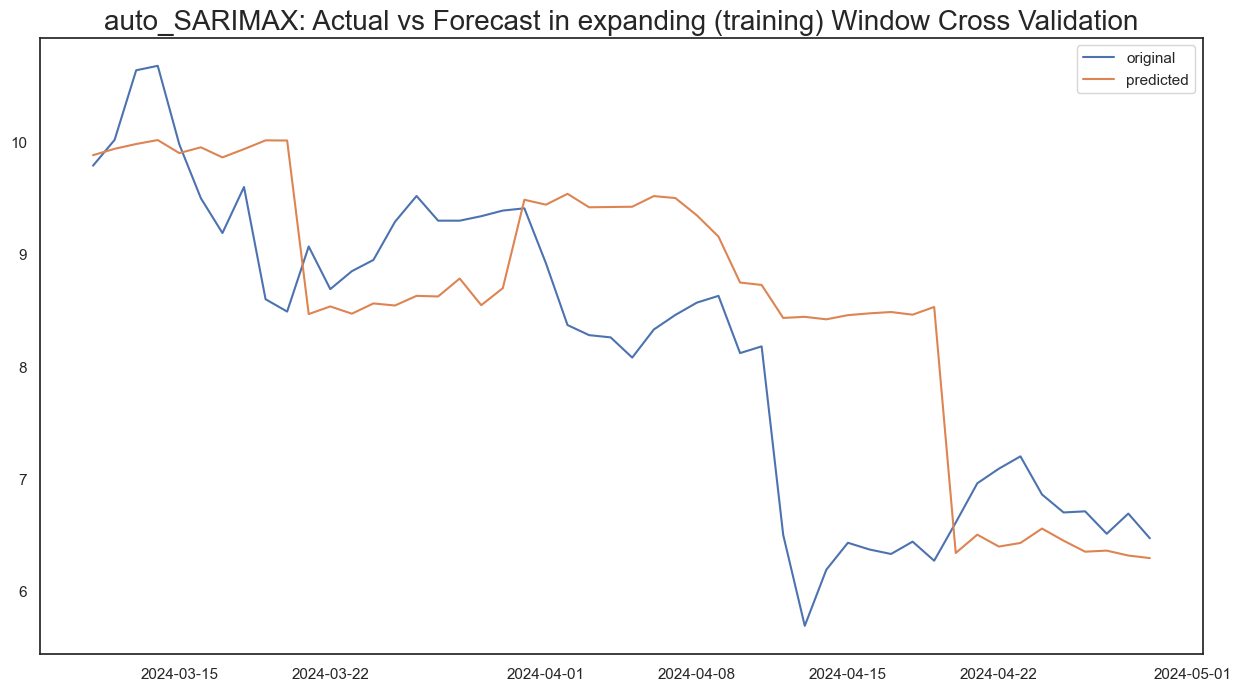

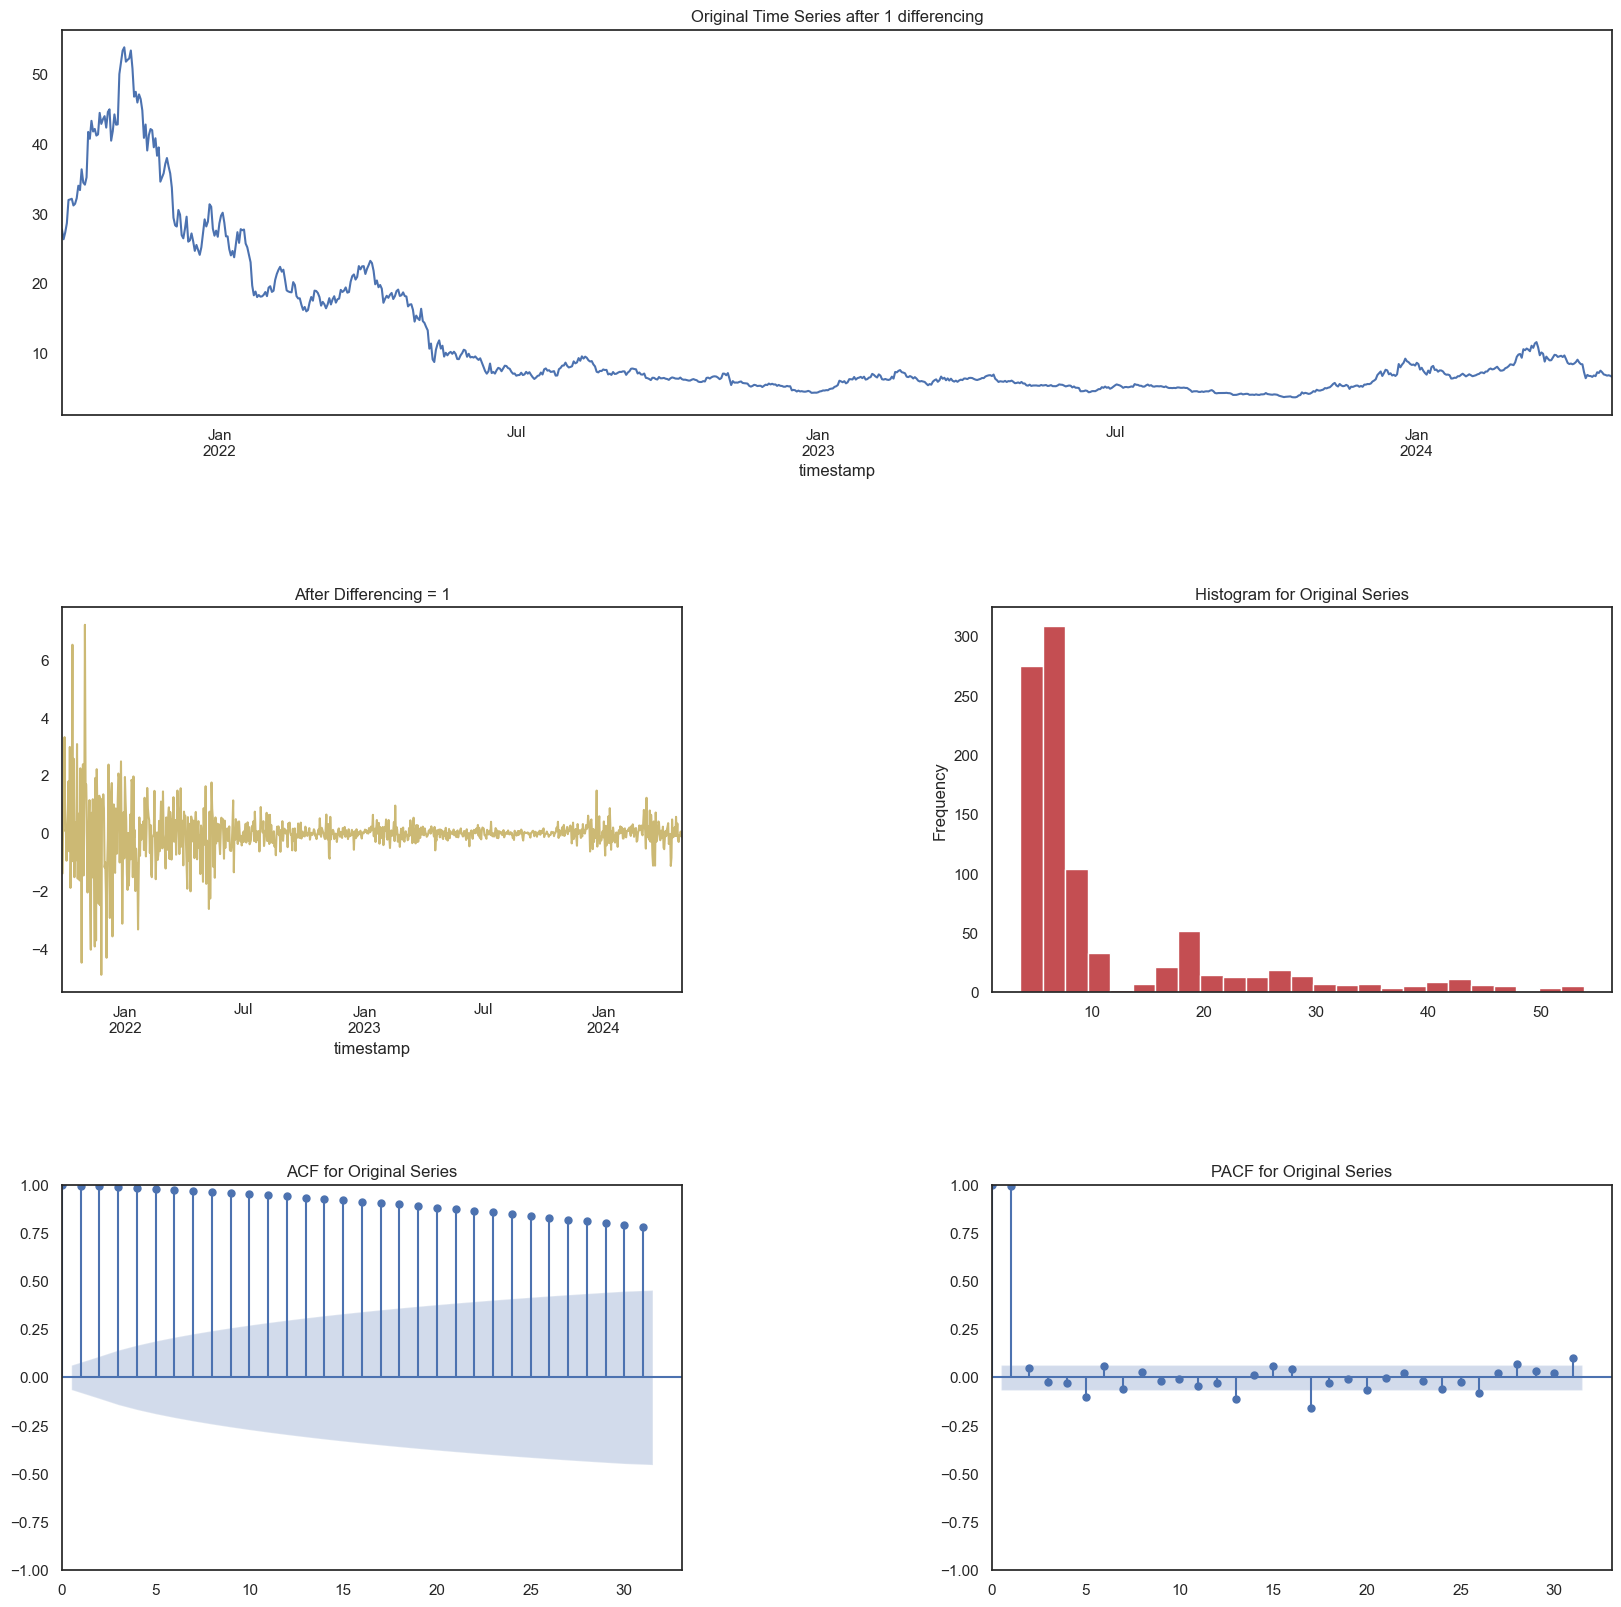

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2171.495, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2164.871, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2166.166, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2170.010, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2172.115, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2162.012, Time=0.74 sec
 ARIMA(1,1,0)(3,0,0)[12] intercept   : AIC=2163.392, Time=2.13 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=2161.795, Time=2.16 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=21

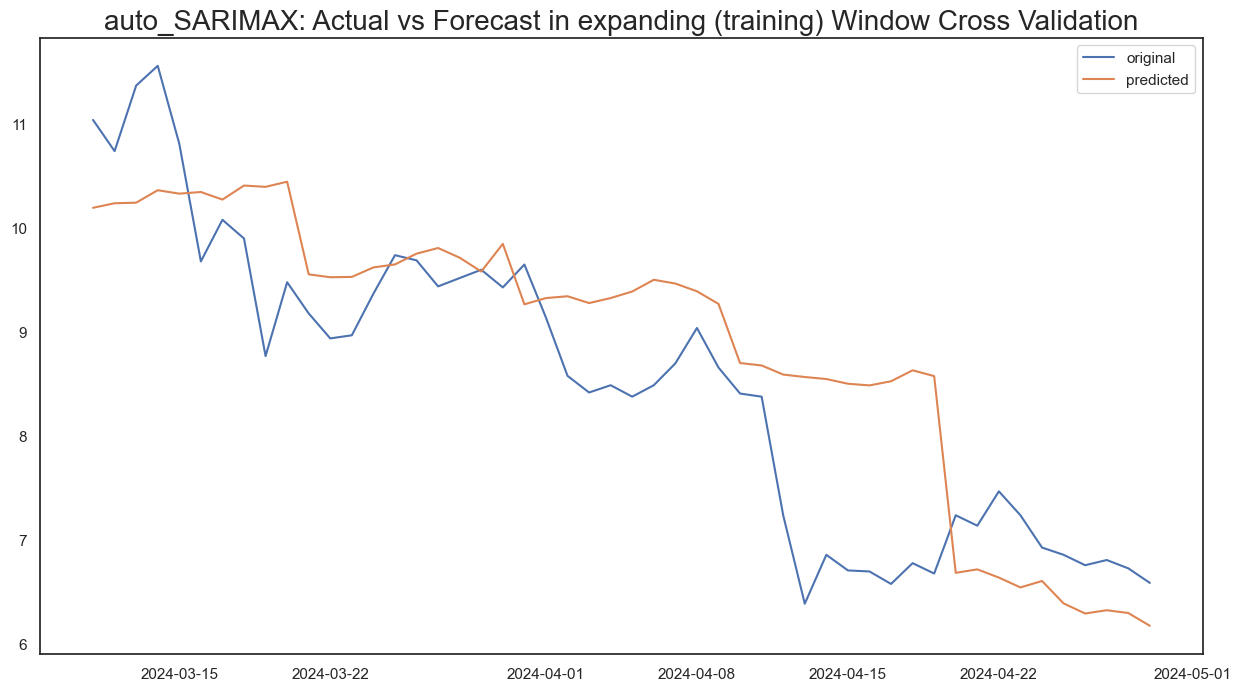

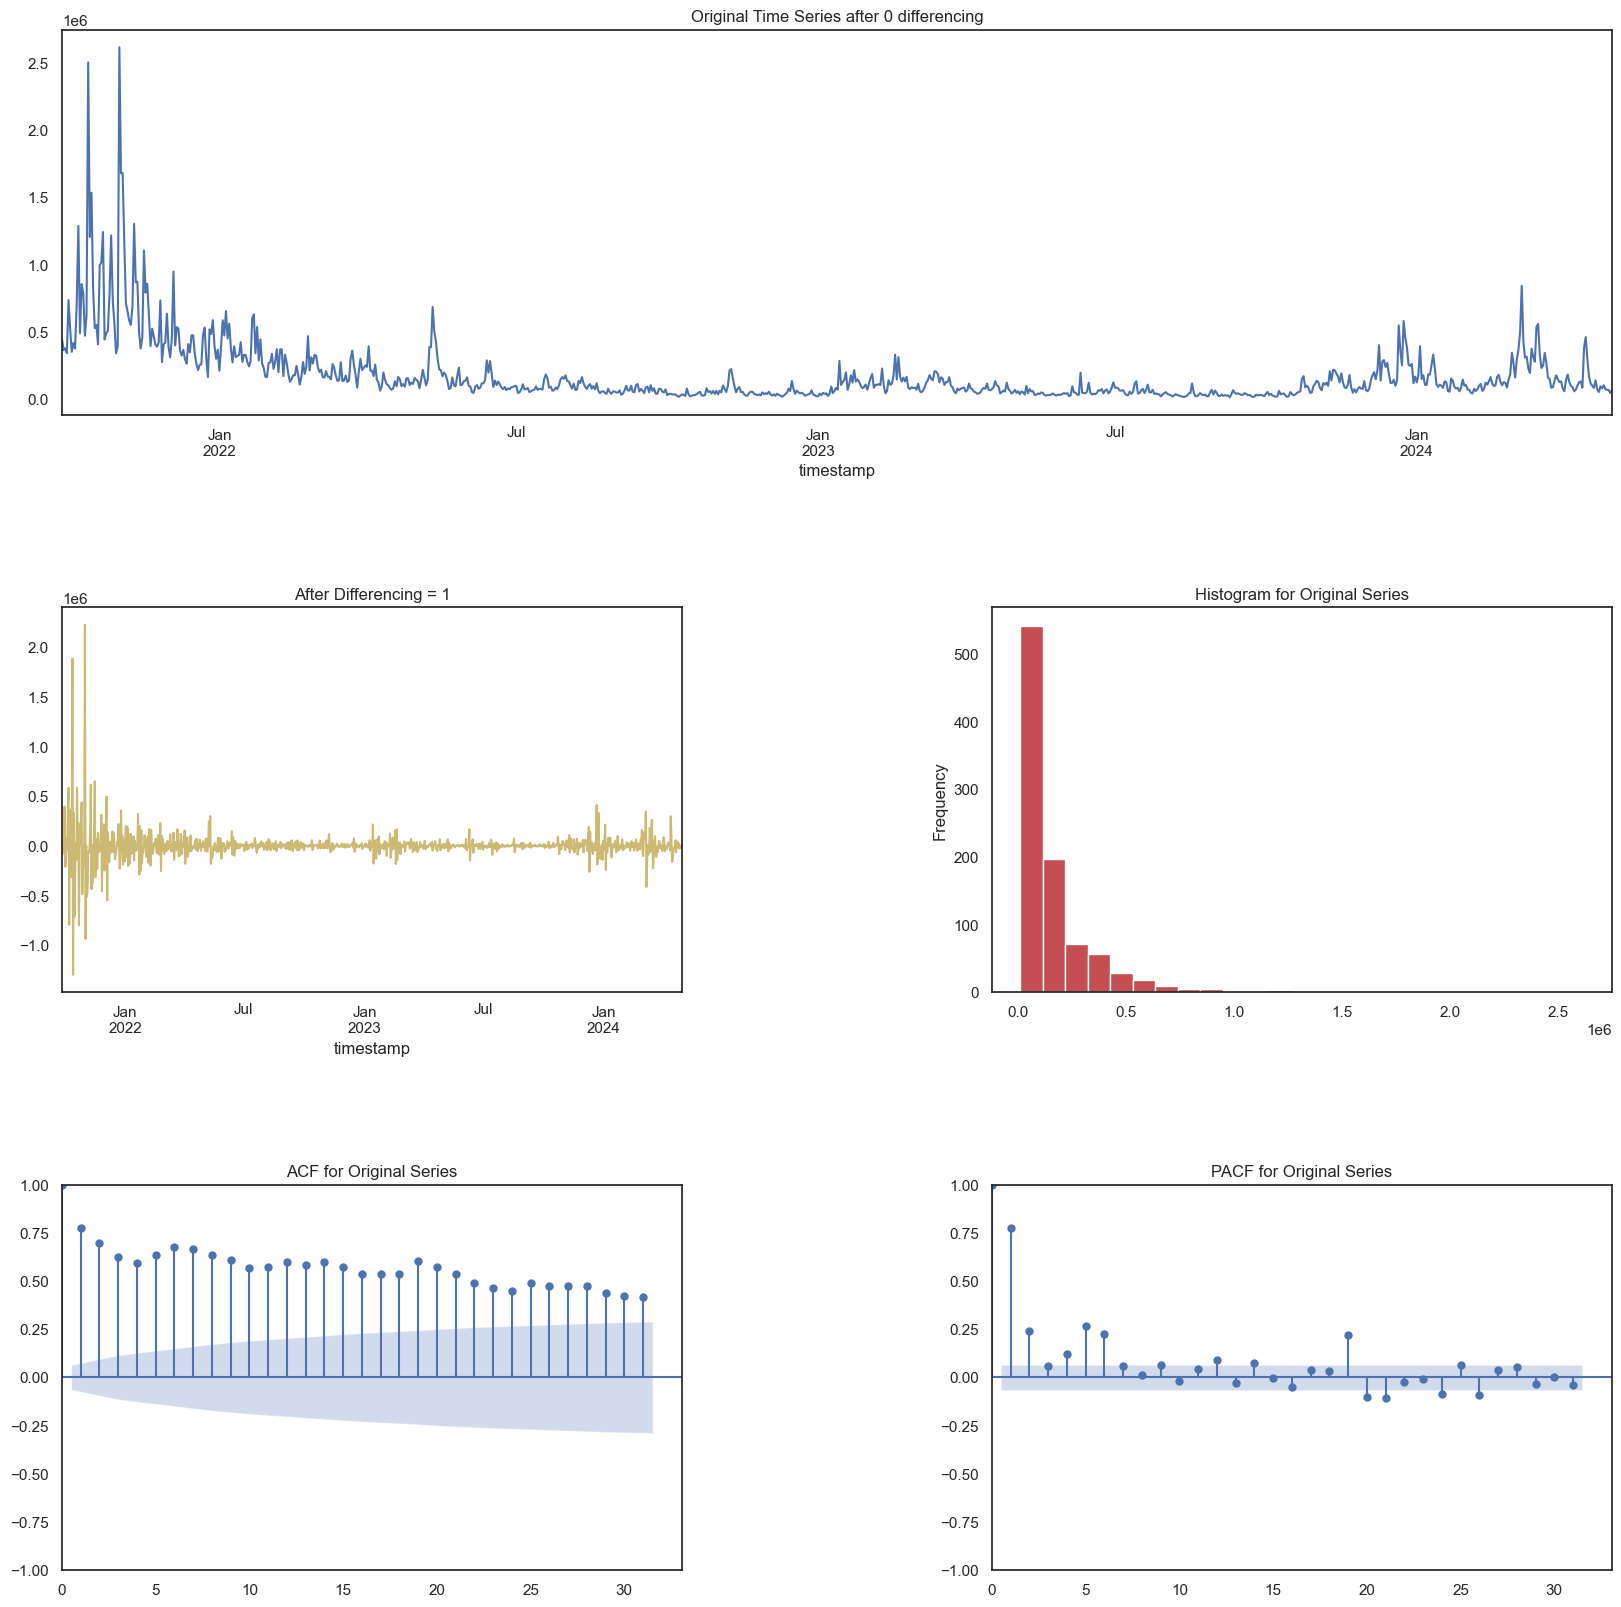

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=23951.239, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=23843.320, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=23778.005, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=23949.243, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=23777.635, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=23778.552, Time=0.29 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=23771.709, Time=0.75 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=23750.462, Time=1.98 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   

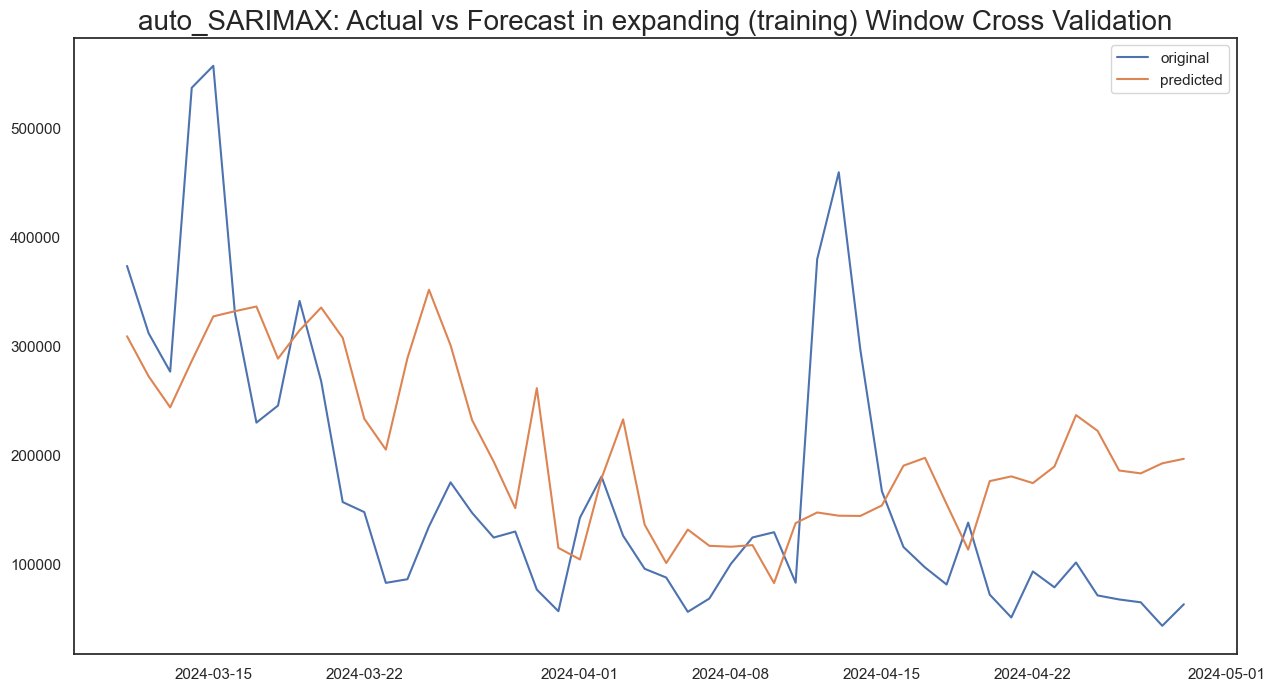

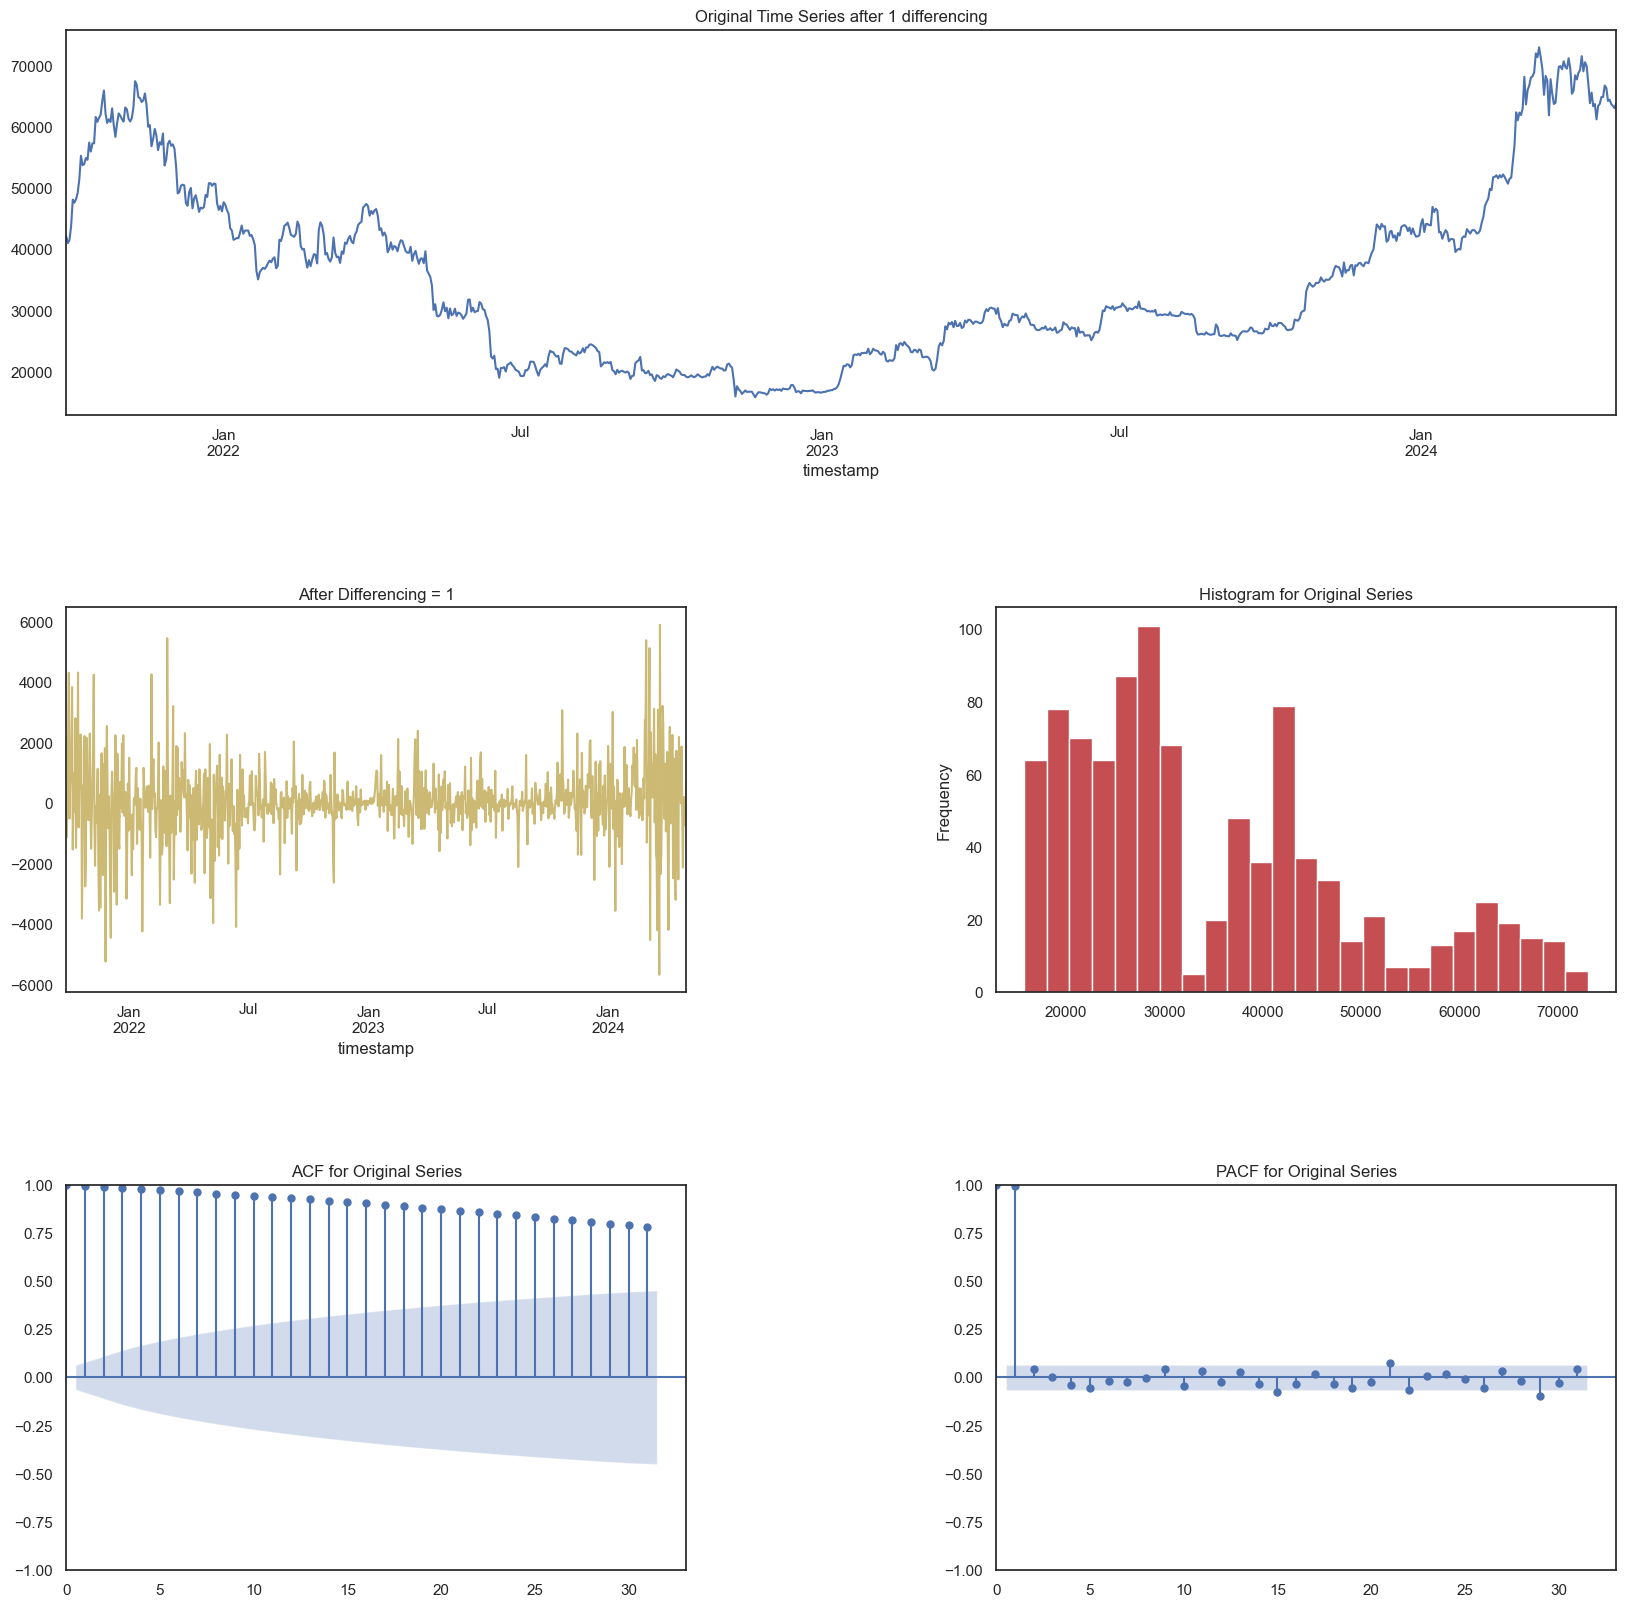

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=15038.095, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=15040.348, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=15040.515, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=15036.790, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=15039.289, Time=0.14 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=15039.273, Time=0.16 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=15041.167, Time=0.94 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=15039.145, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   

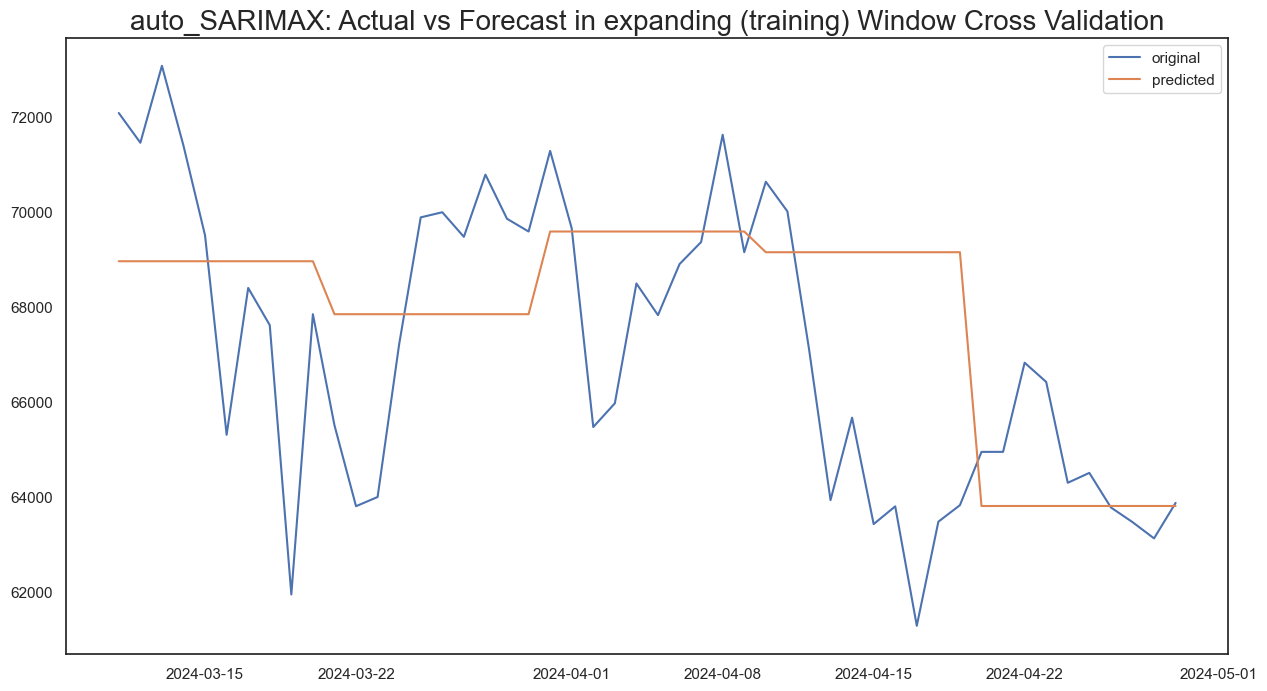

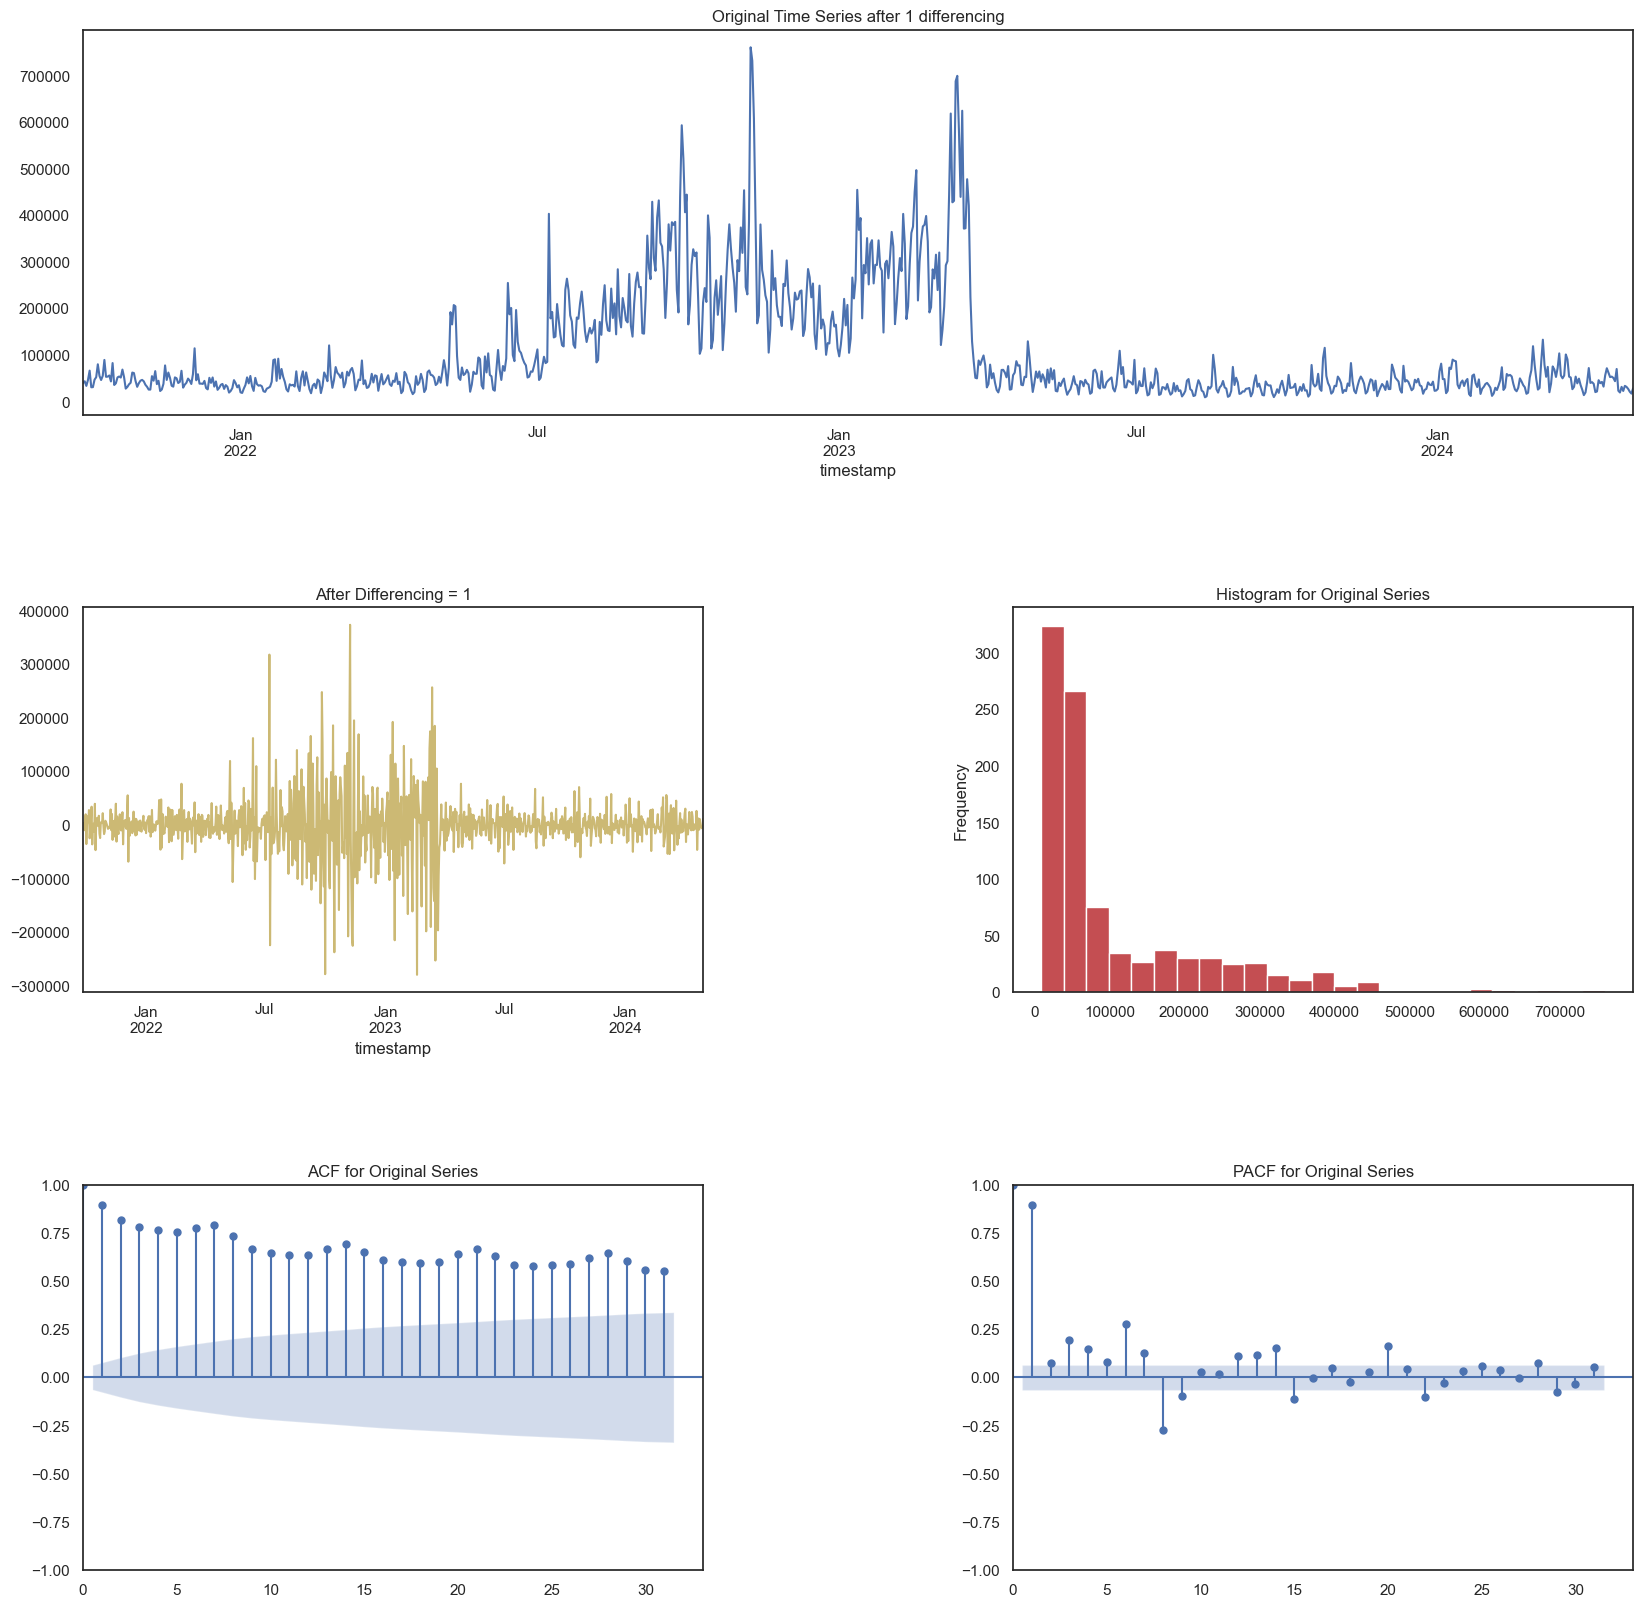

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=22076.630, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=22053.086, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=22032.969, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=22074.631, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=22050.659, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=22032.016, Time=0.67 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=22037.790, Time=0.21 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=22020.637, Time=1.29 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   

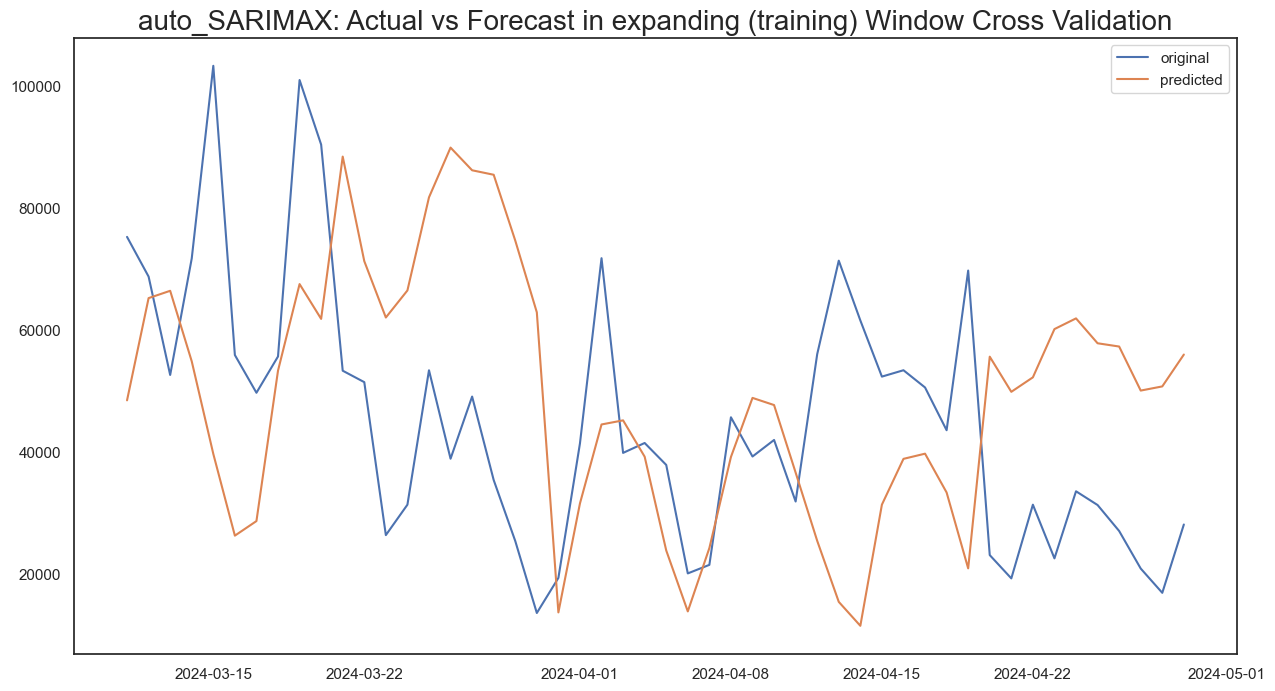

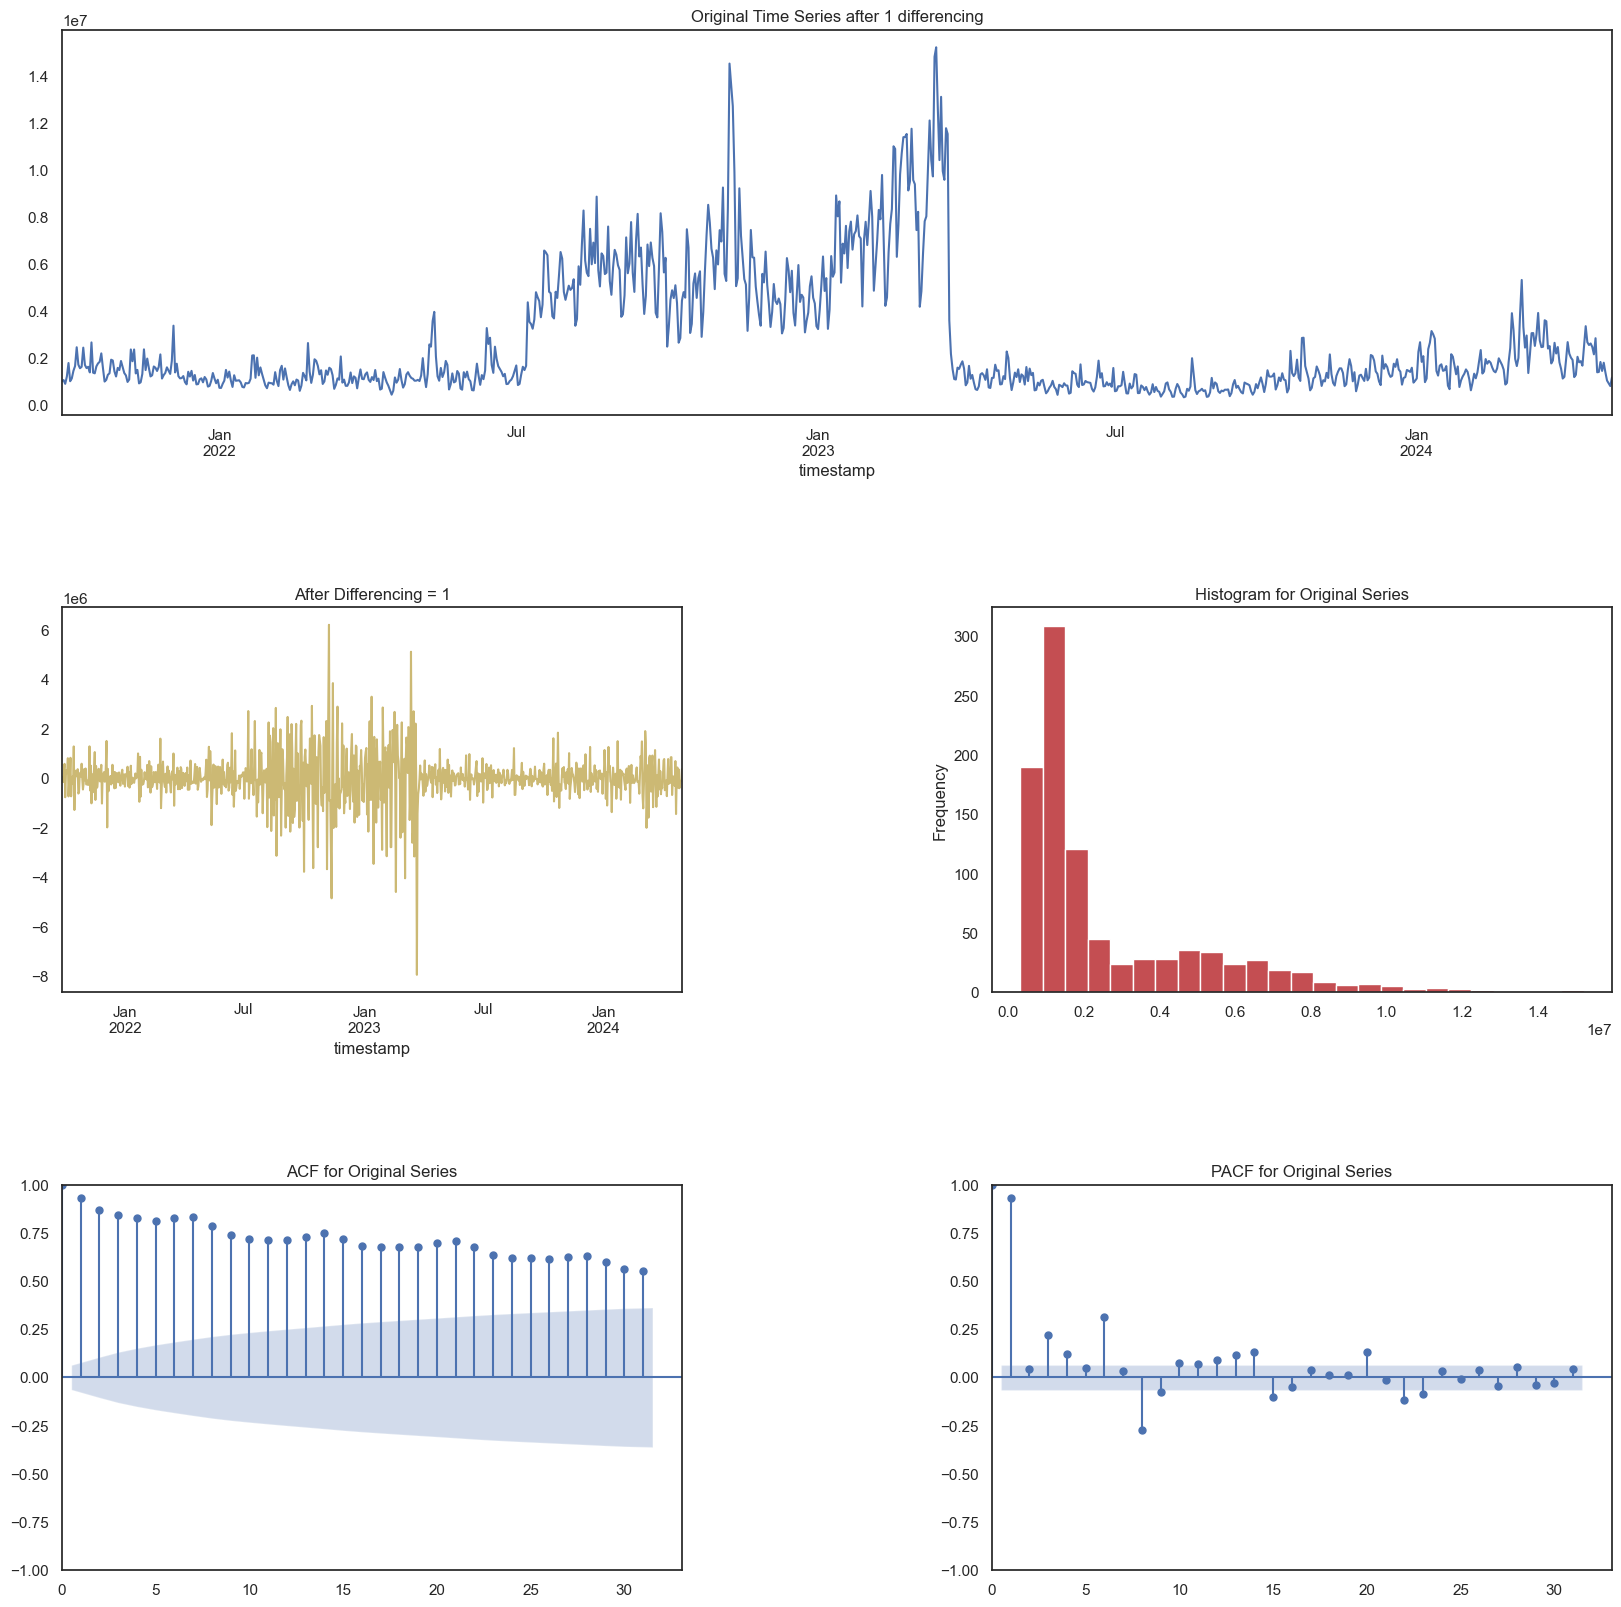

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=27254.055, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=27234.175, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=27224.488, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=27252.058, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=27245.321, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=27224.517, Time=0.62 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=27222.322, Time=0.80 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=27218.152, Time=2.88 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   

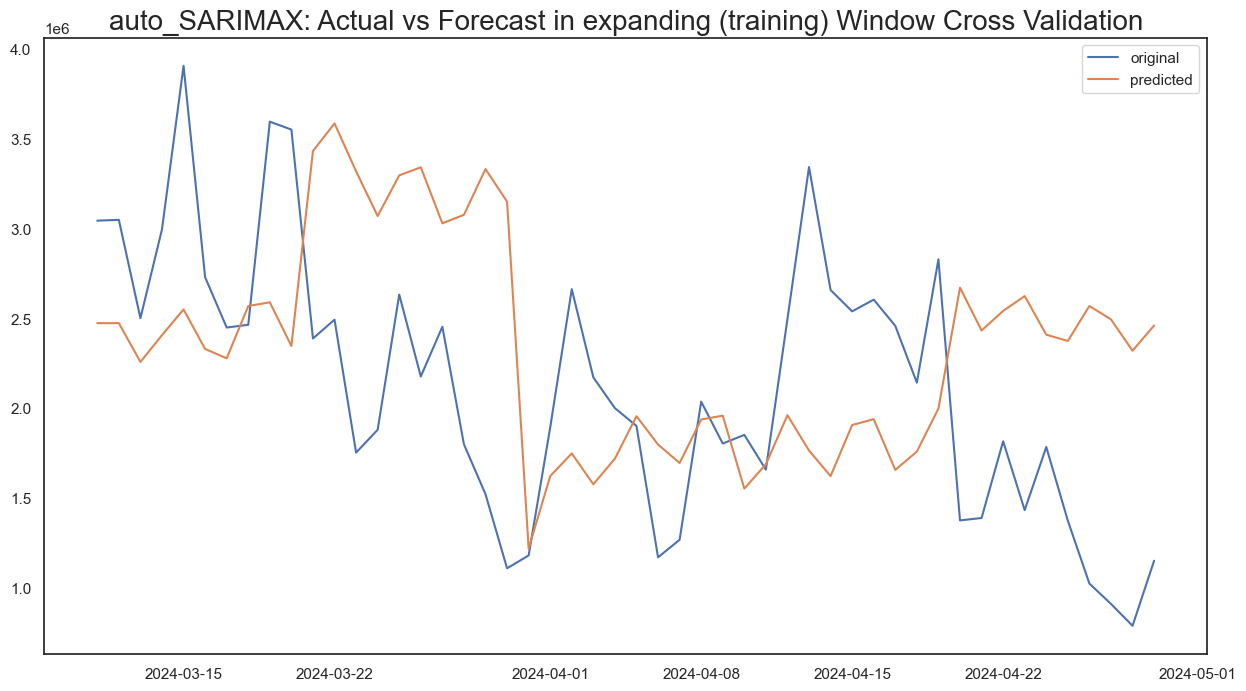

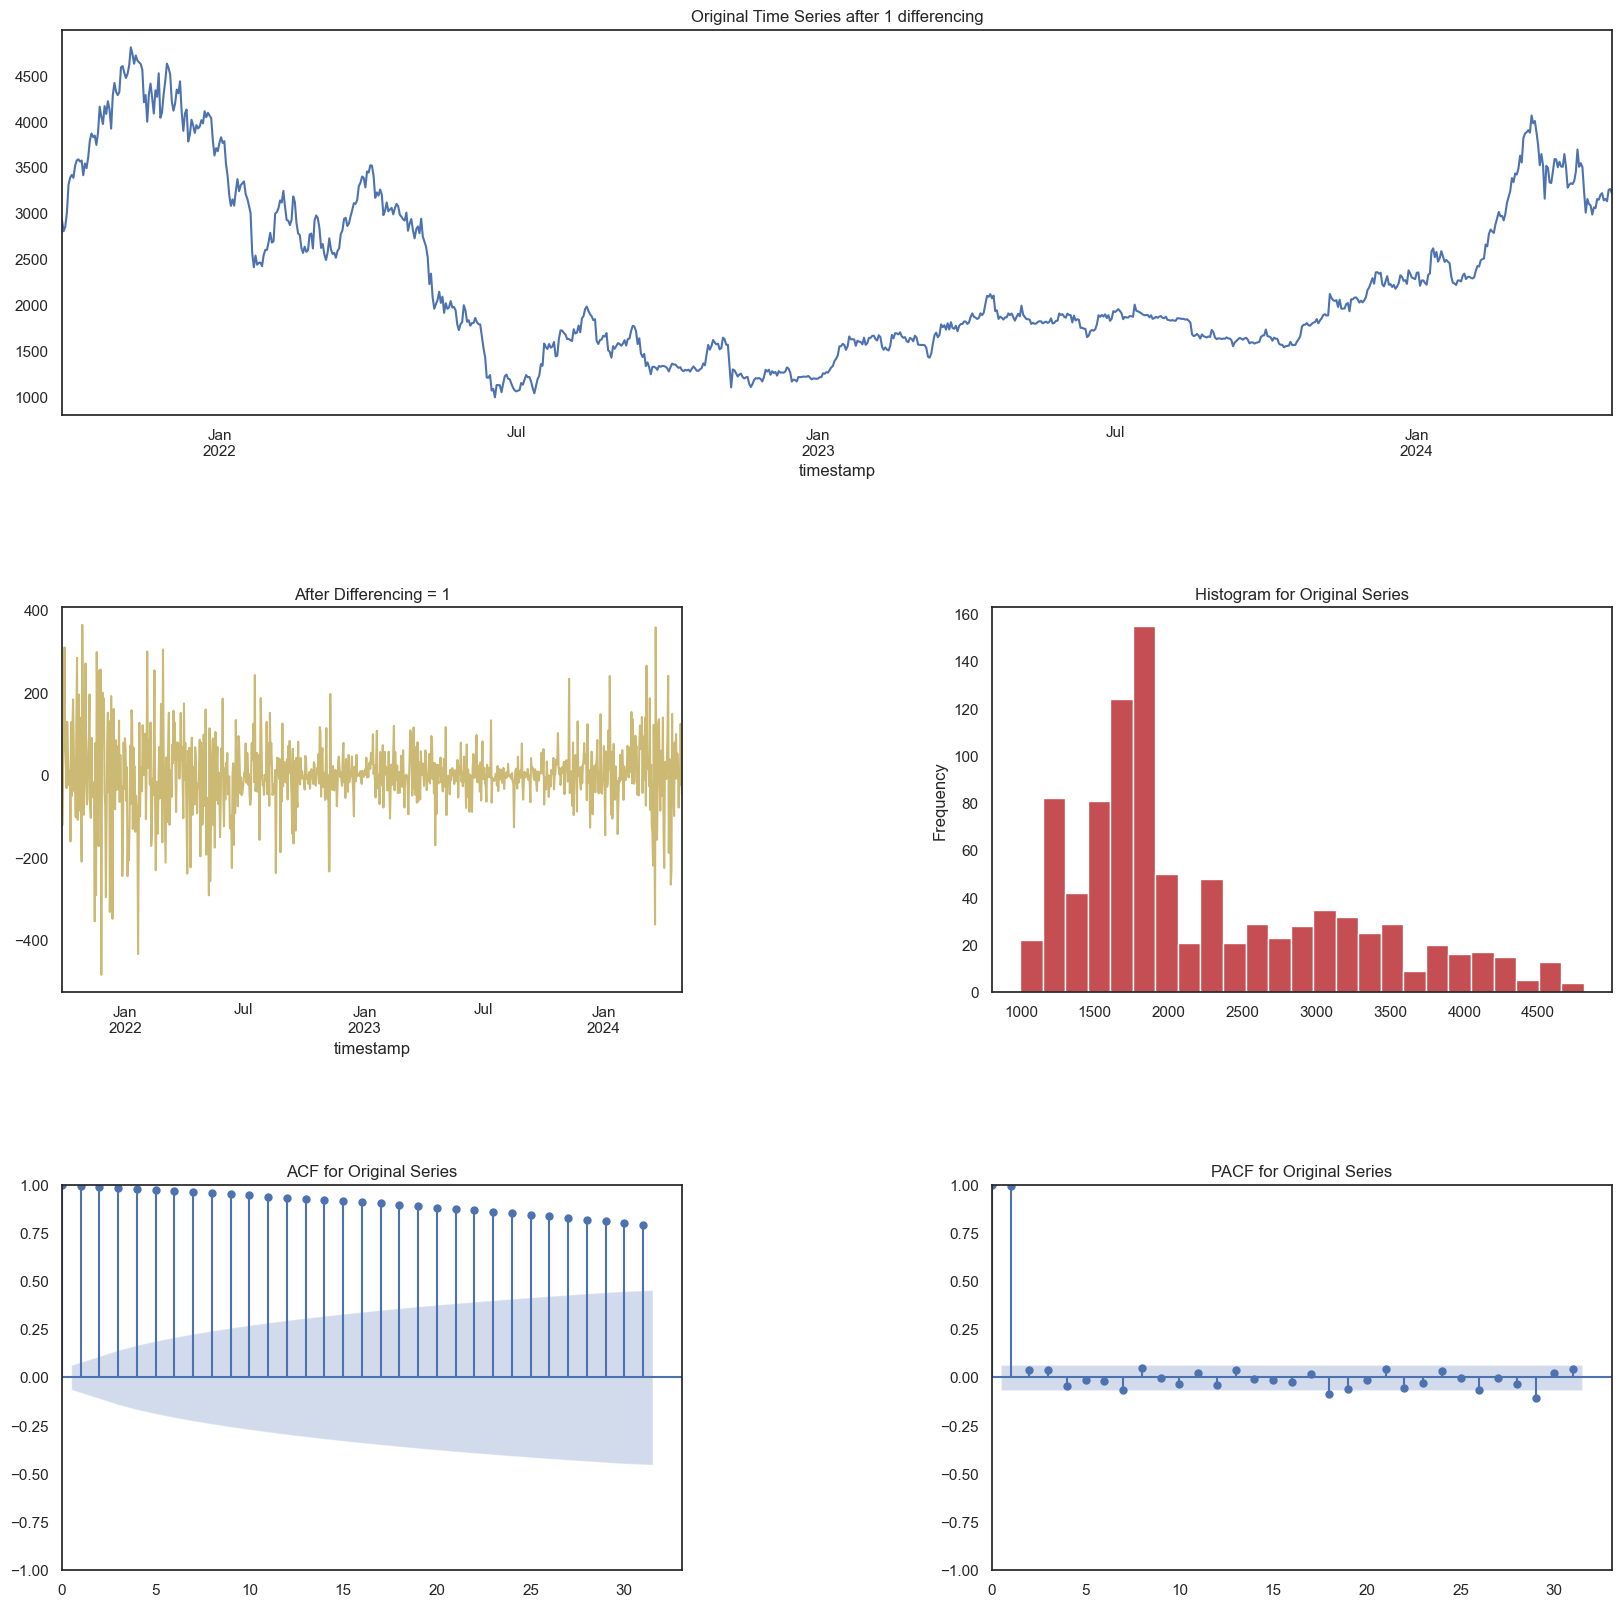

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=10489.115, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=10492.072, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=10491.997, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=10487.257, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=10491.099, Time=0.12 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=10491.099, Time=0.17 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=10493.122, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=10490.080, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   

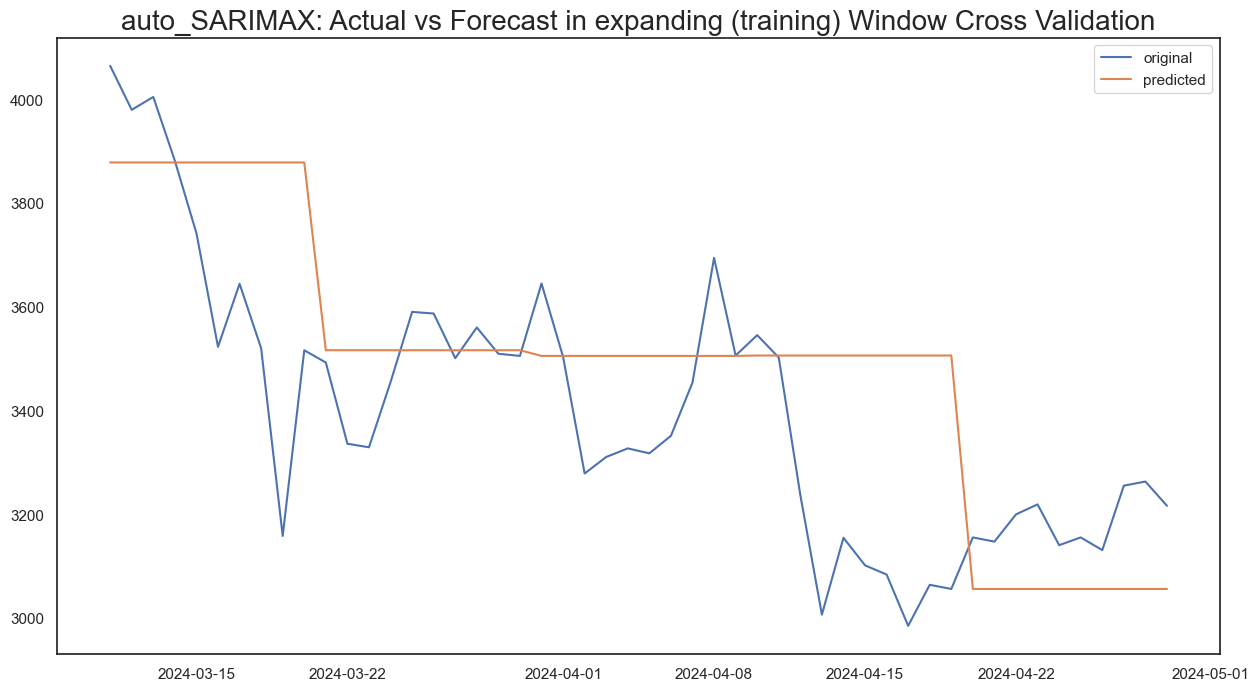

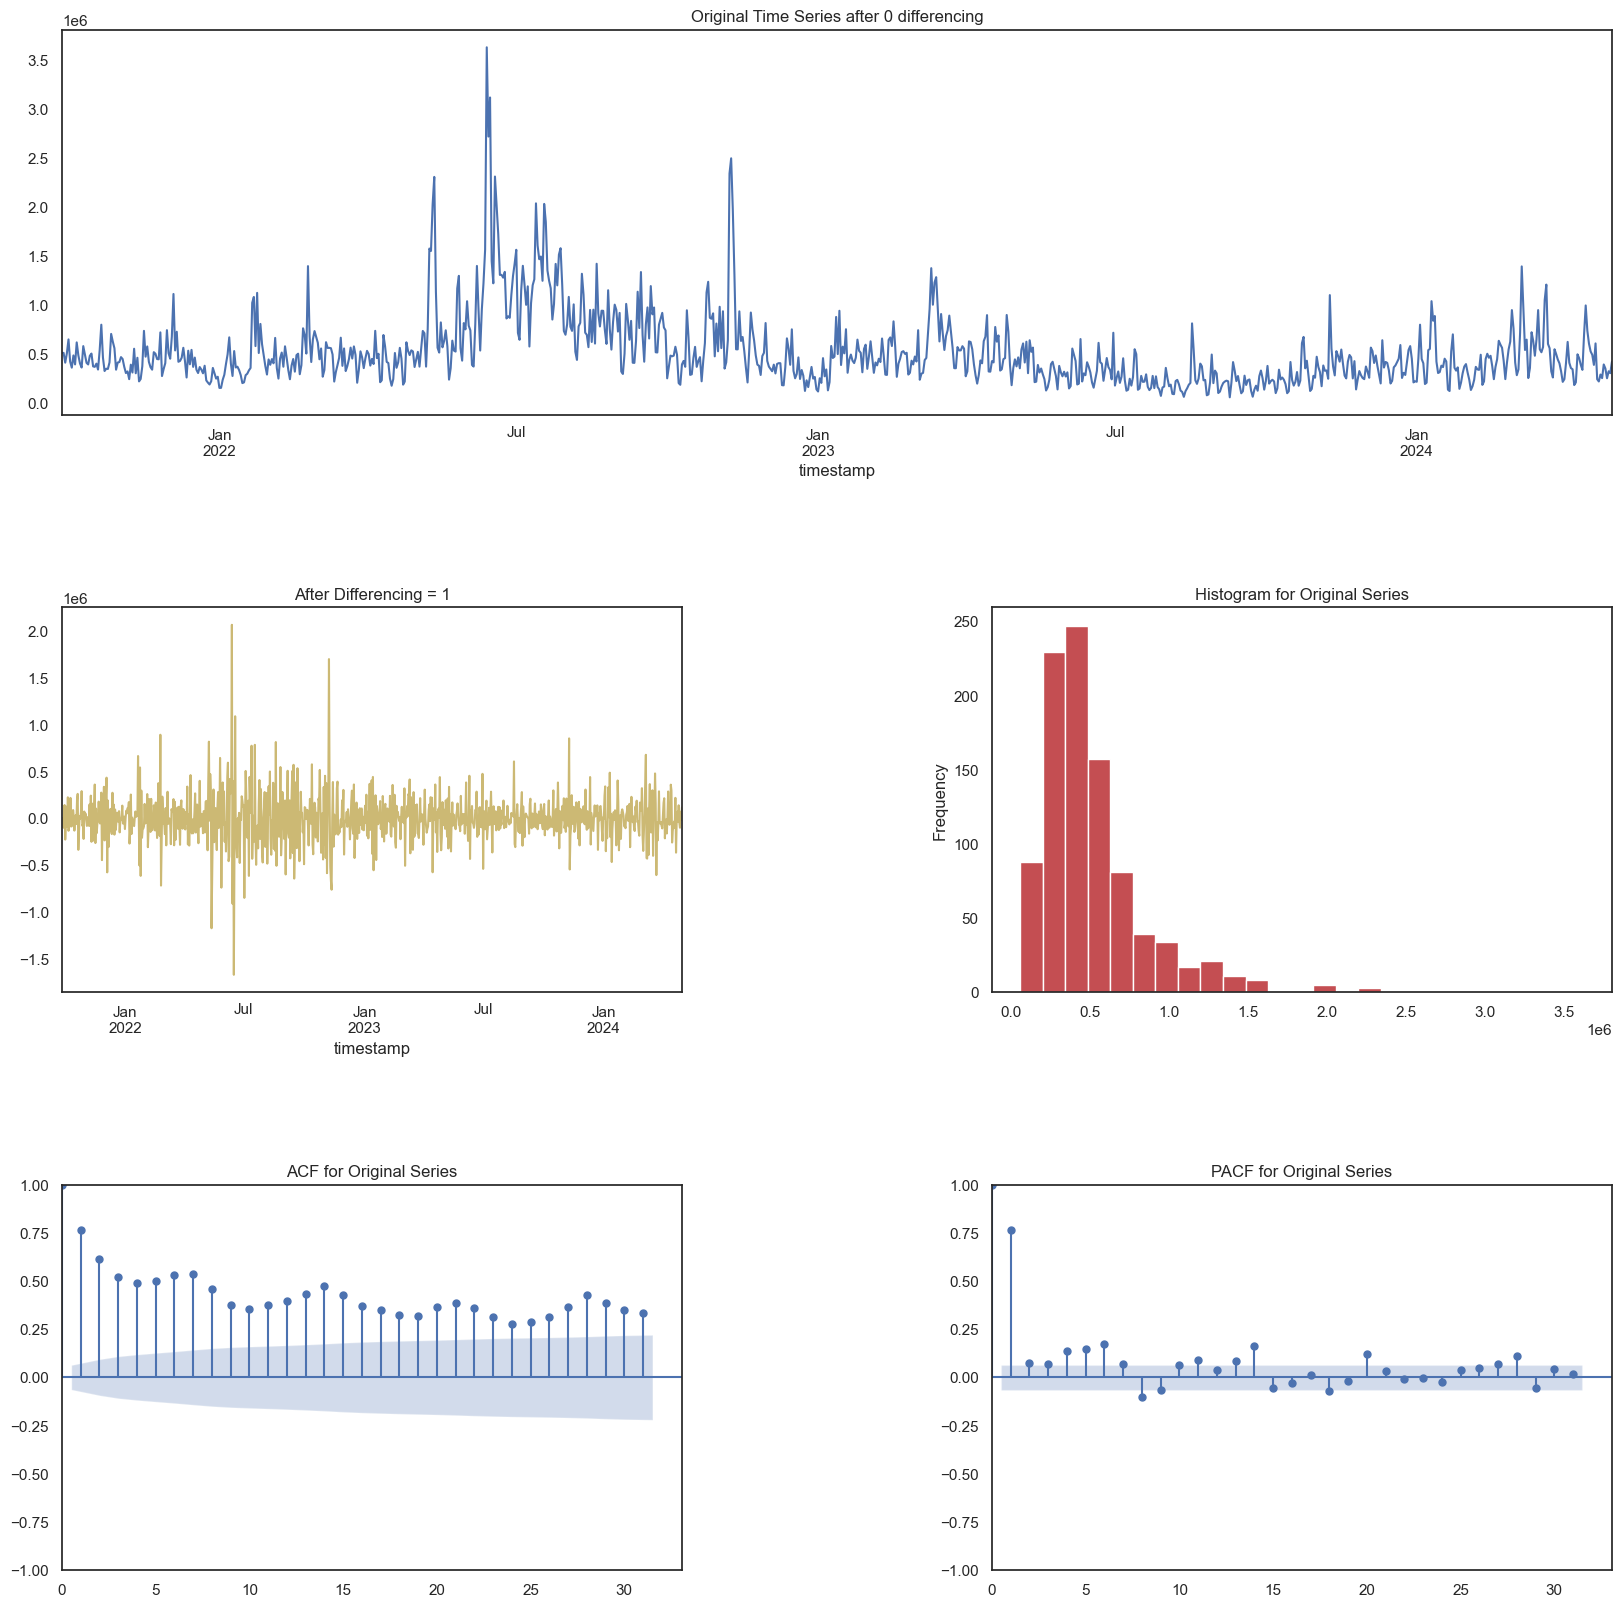

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=24840.990, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=24811.564, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=24790.961, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=24838.991, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=24789.566, Time=0.09 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=24791.121, Time=0.22 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=24789.043, Time=0.84 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=24777.900, Time=1.13 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   

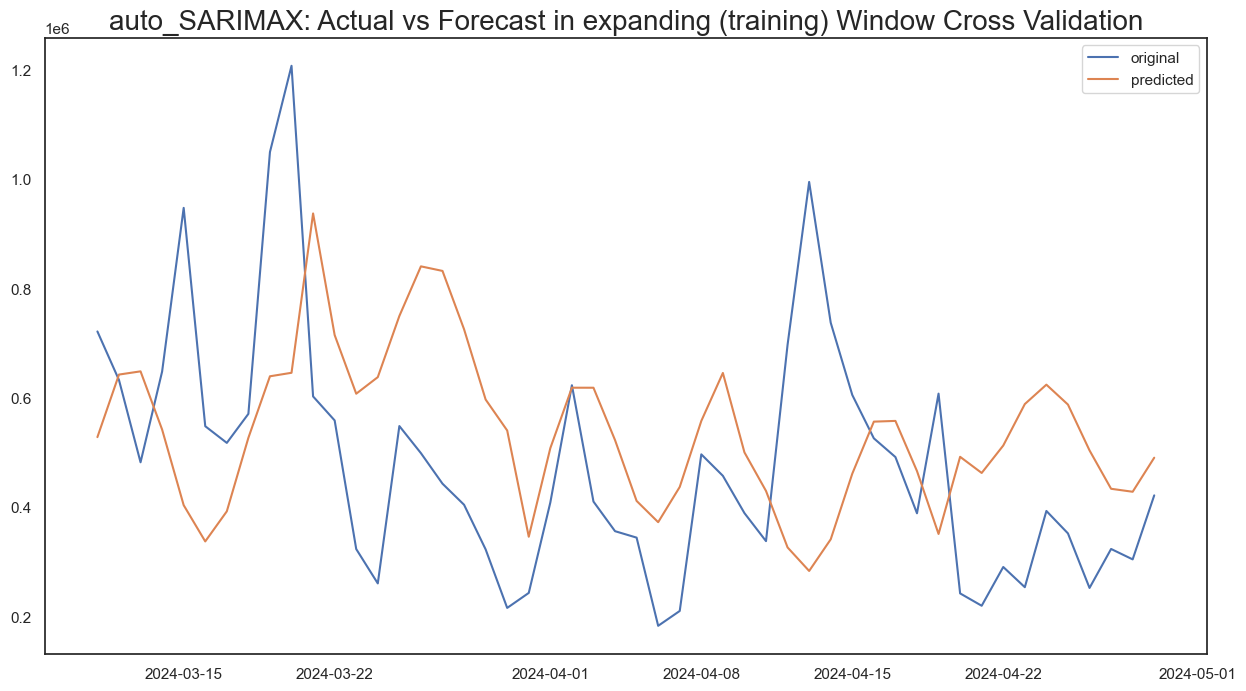

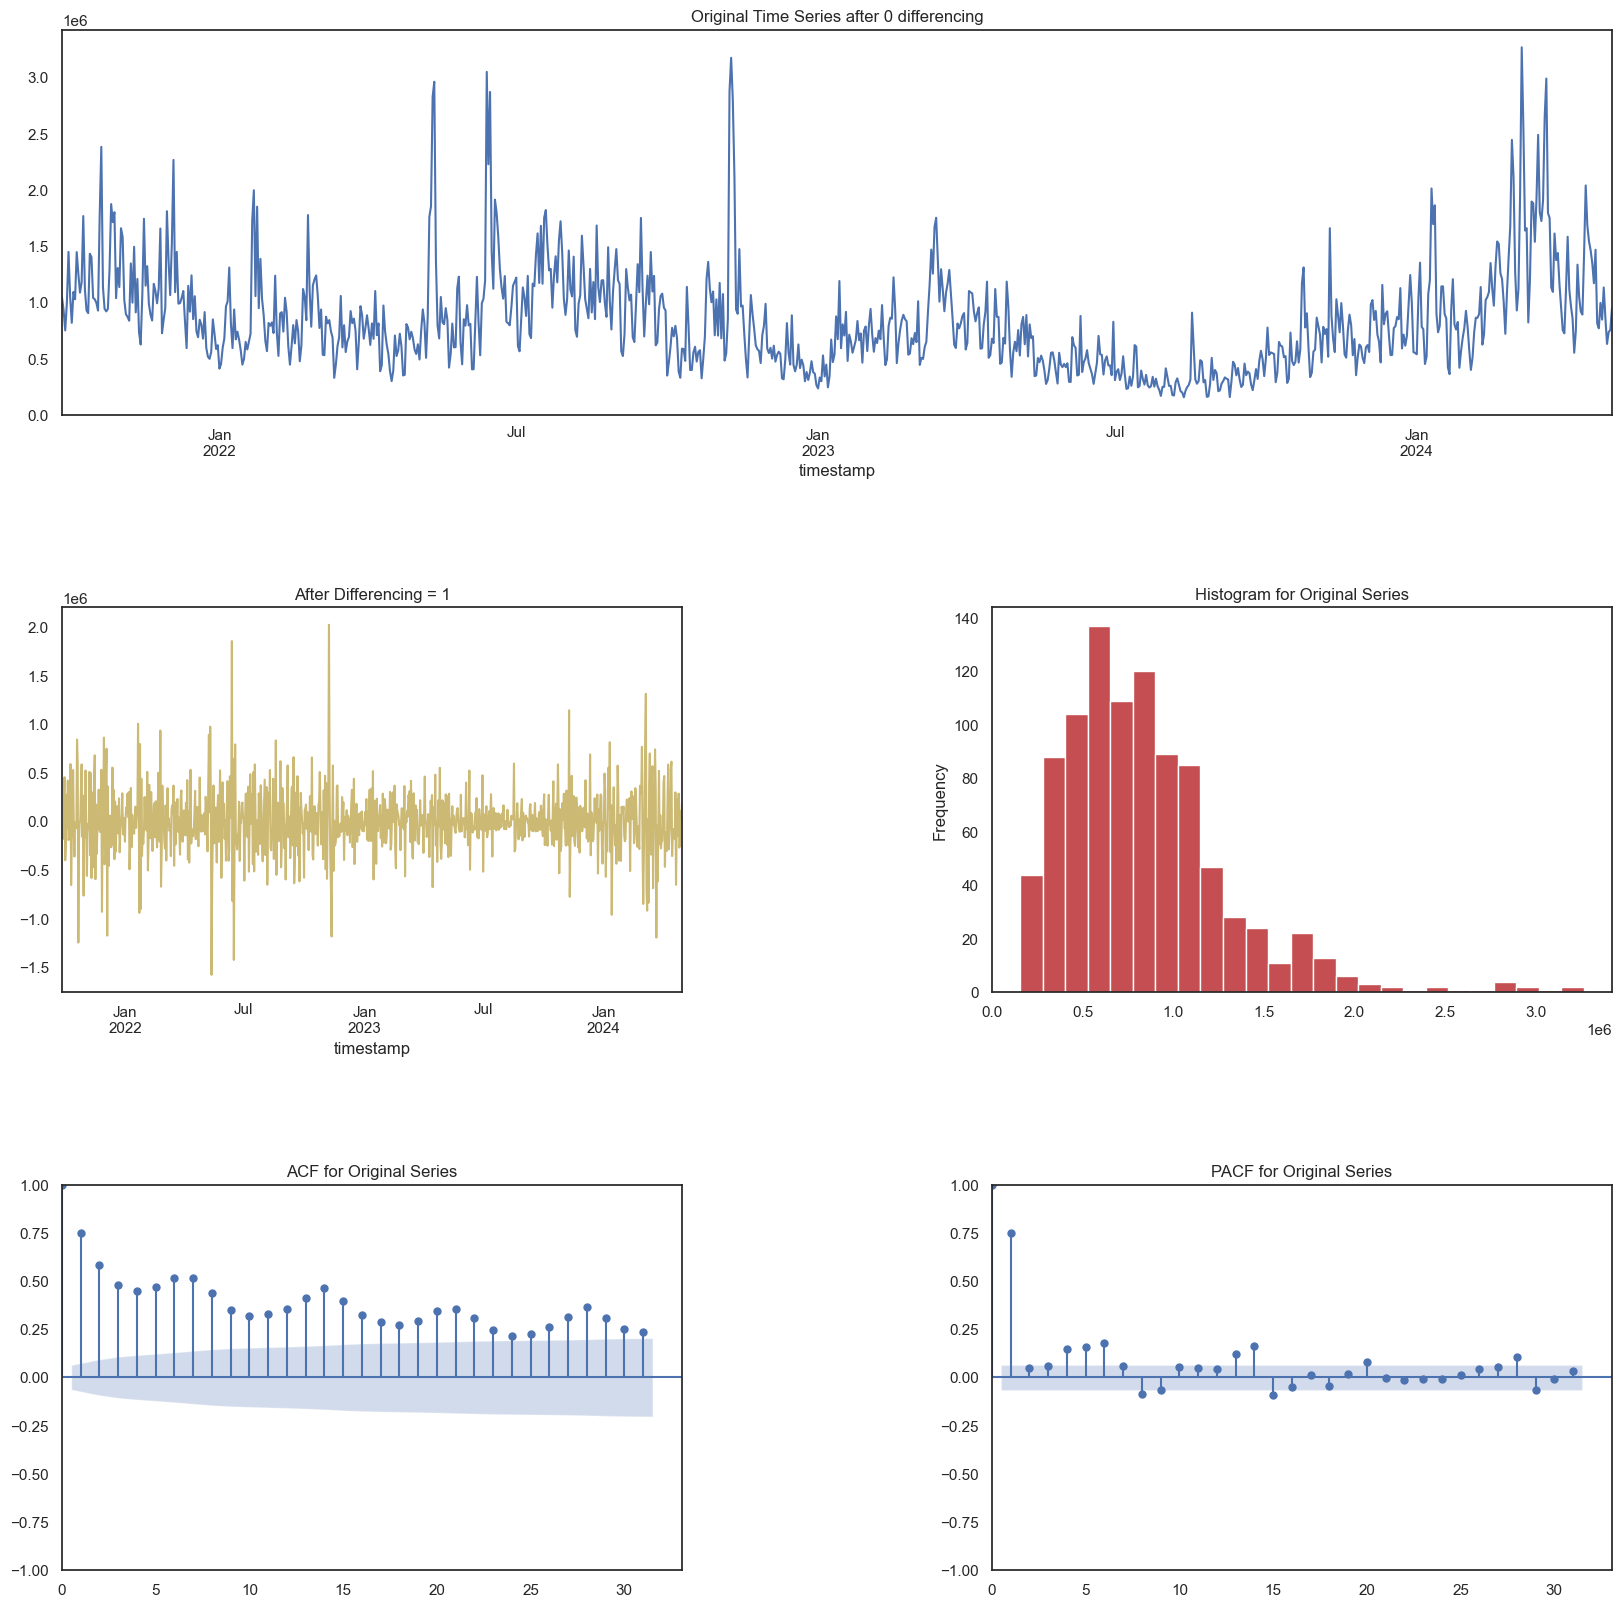

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=25235.038, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=25207.637, Time=0.33 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=25190.168, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=25233.039, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=25191.466, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=25188.755, Time=0.63 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=25190.948, Time=0.24 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=25180.062, Time=1.13 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   

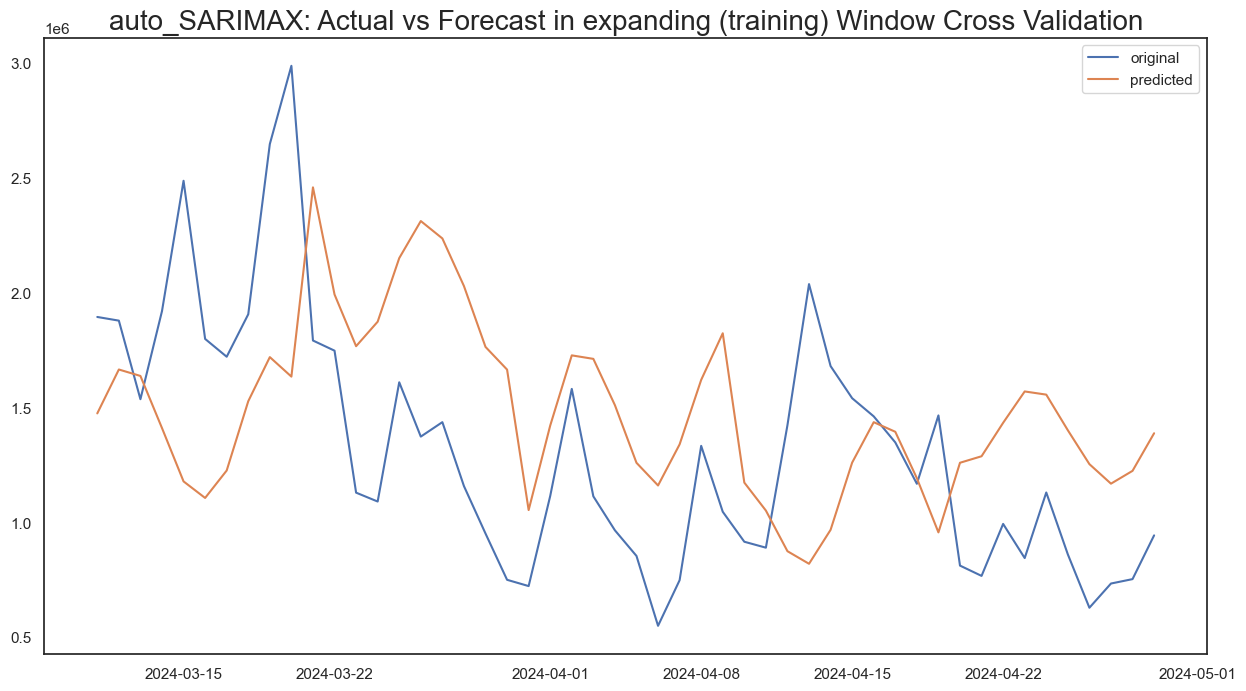

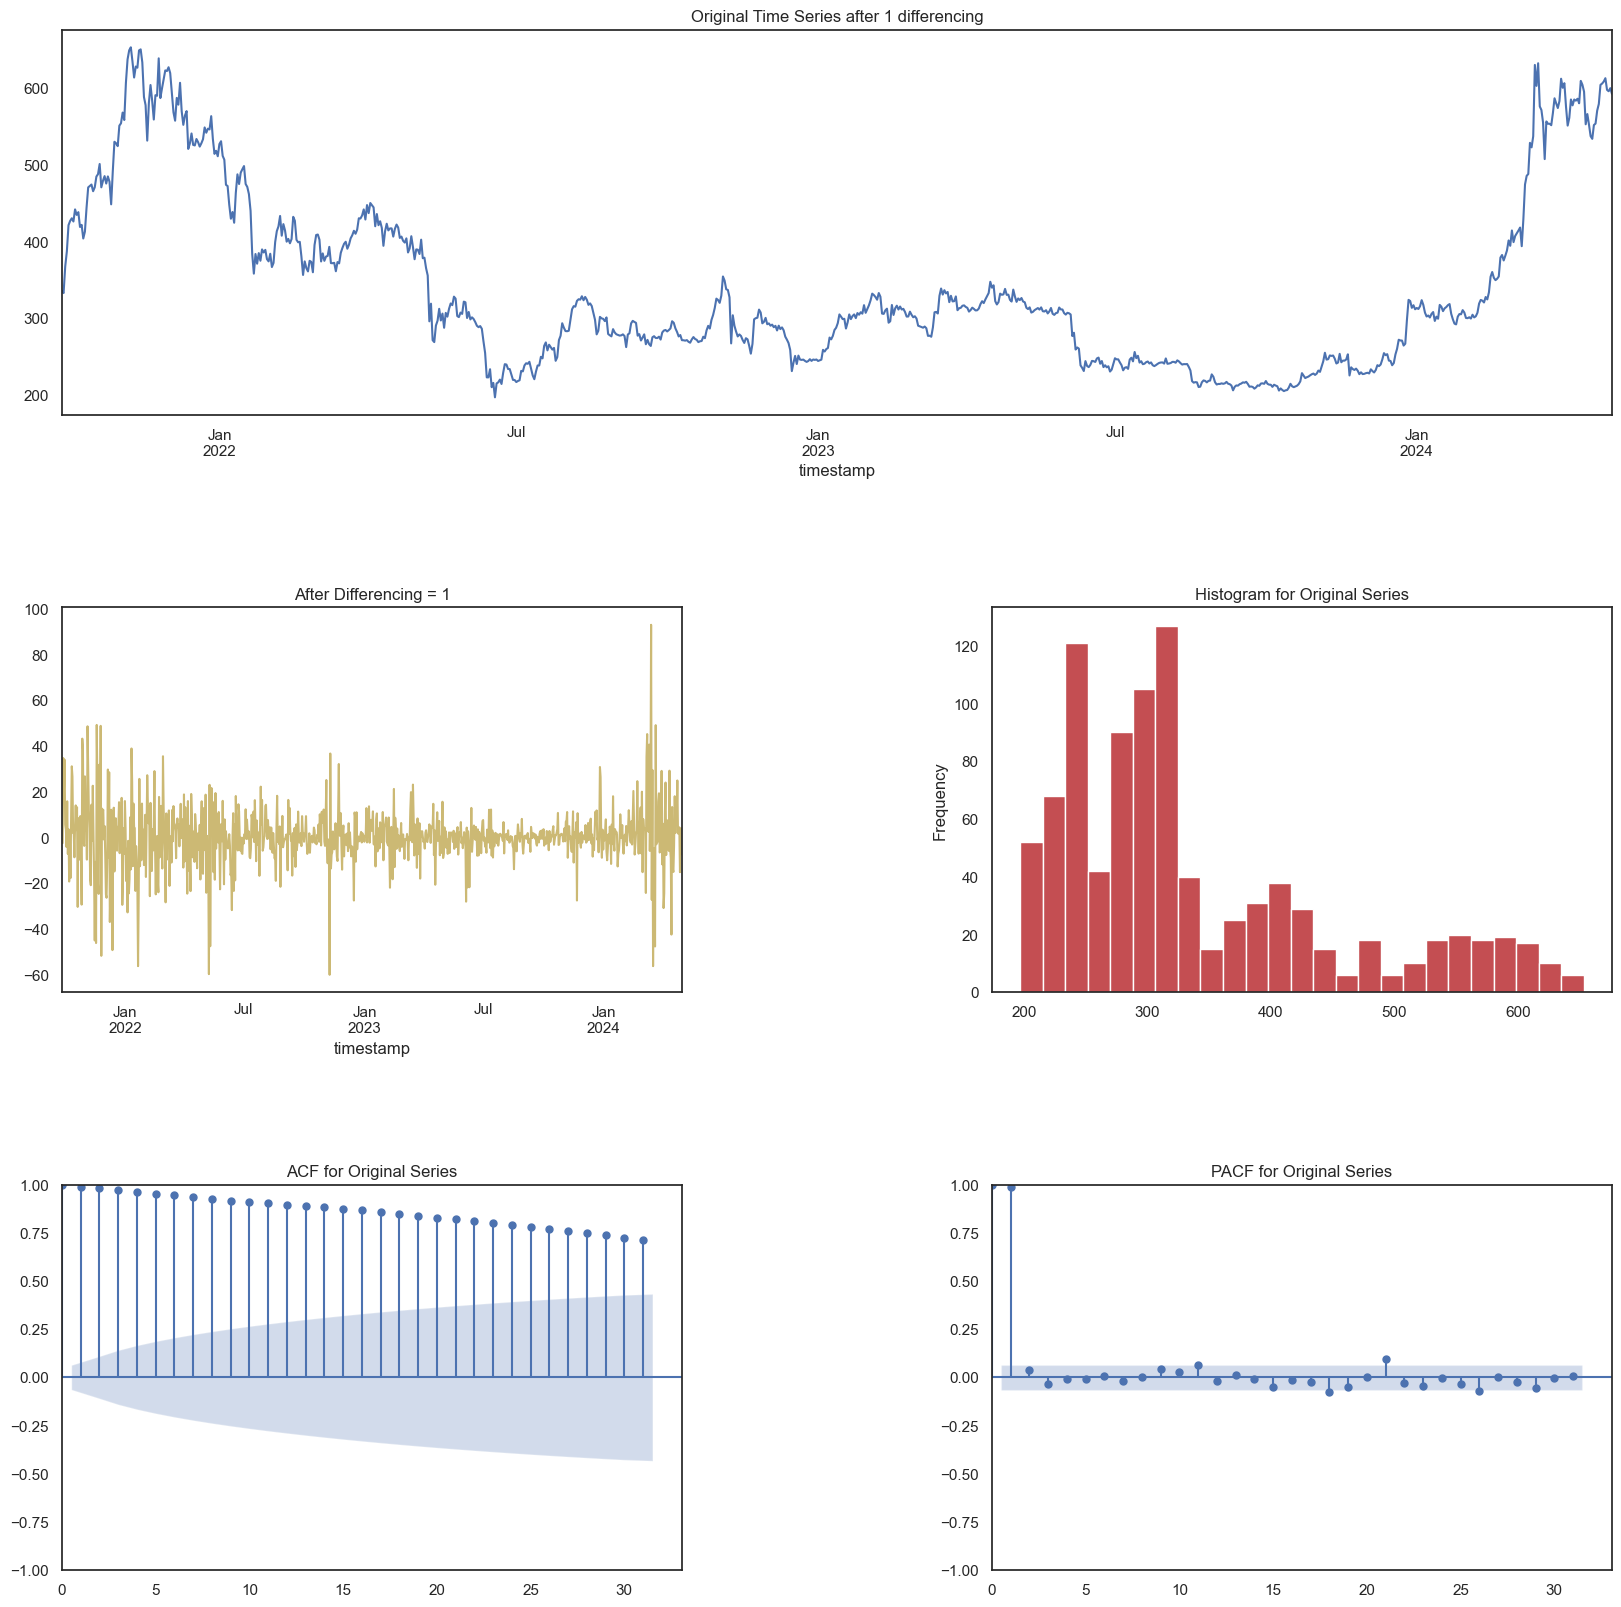

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6971.567, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6973.260, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6973.384, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6969.864, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=6973.556, Time=0.14 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=6973.558, Time=0.20 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=6972.868, Time=0.83 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=6971.284, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=69

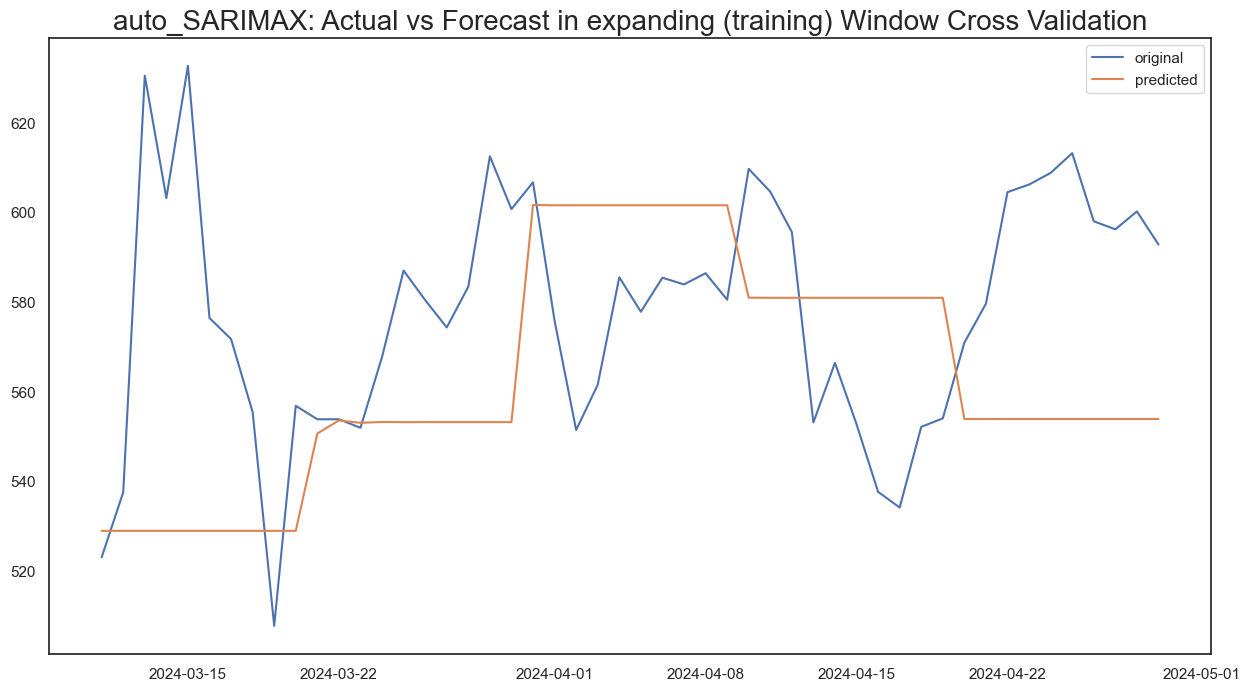

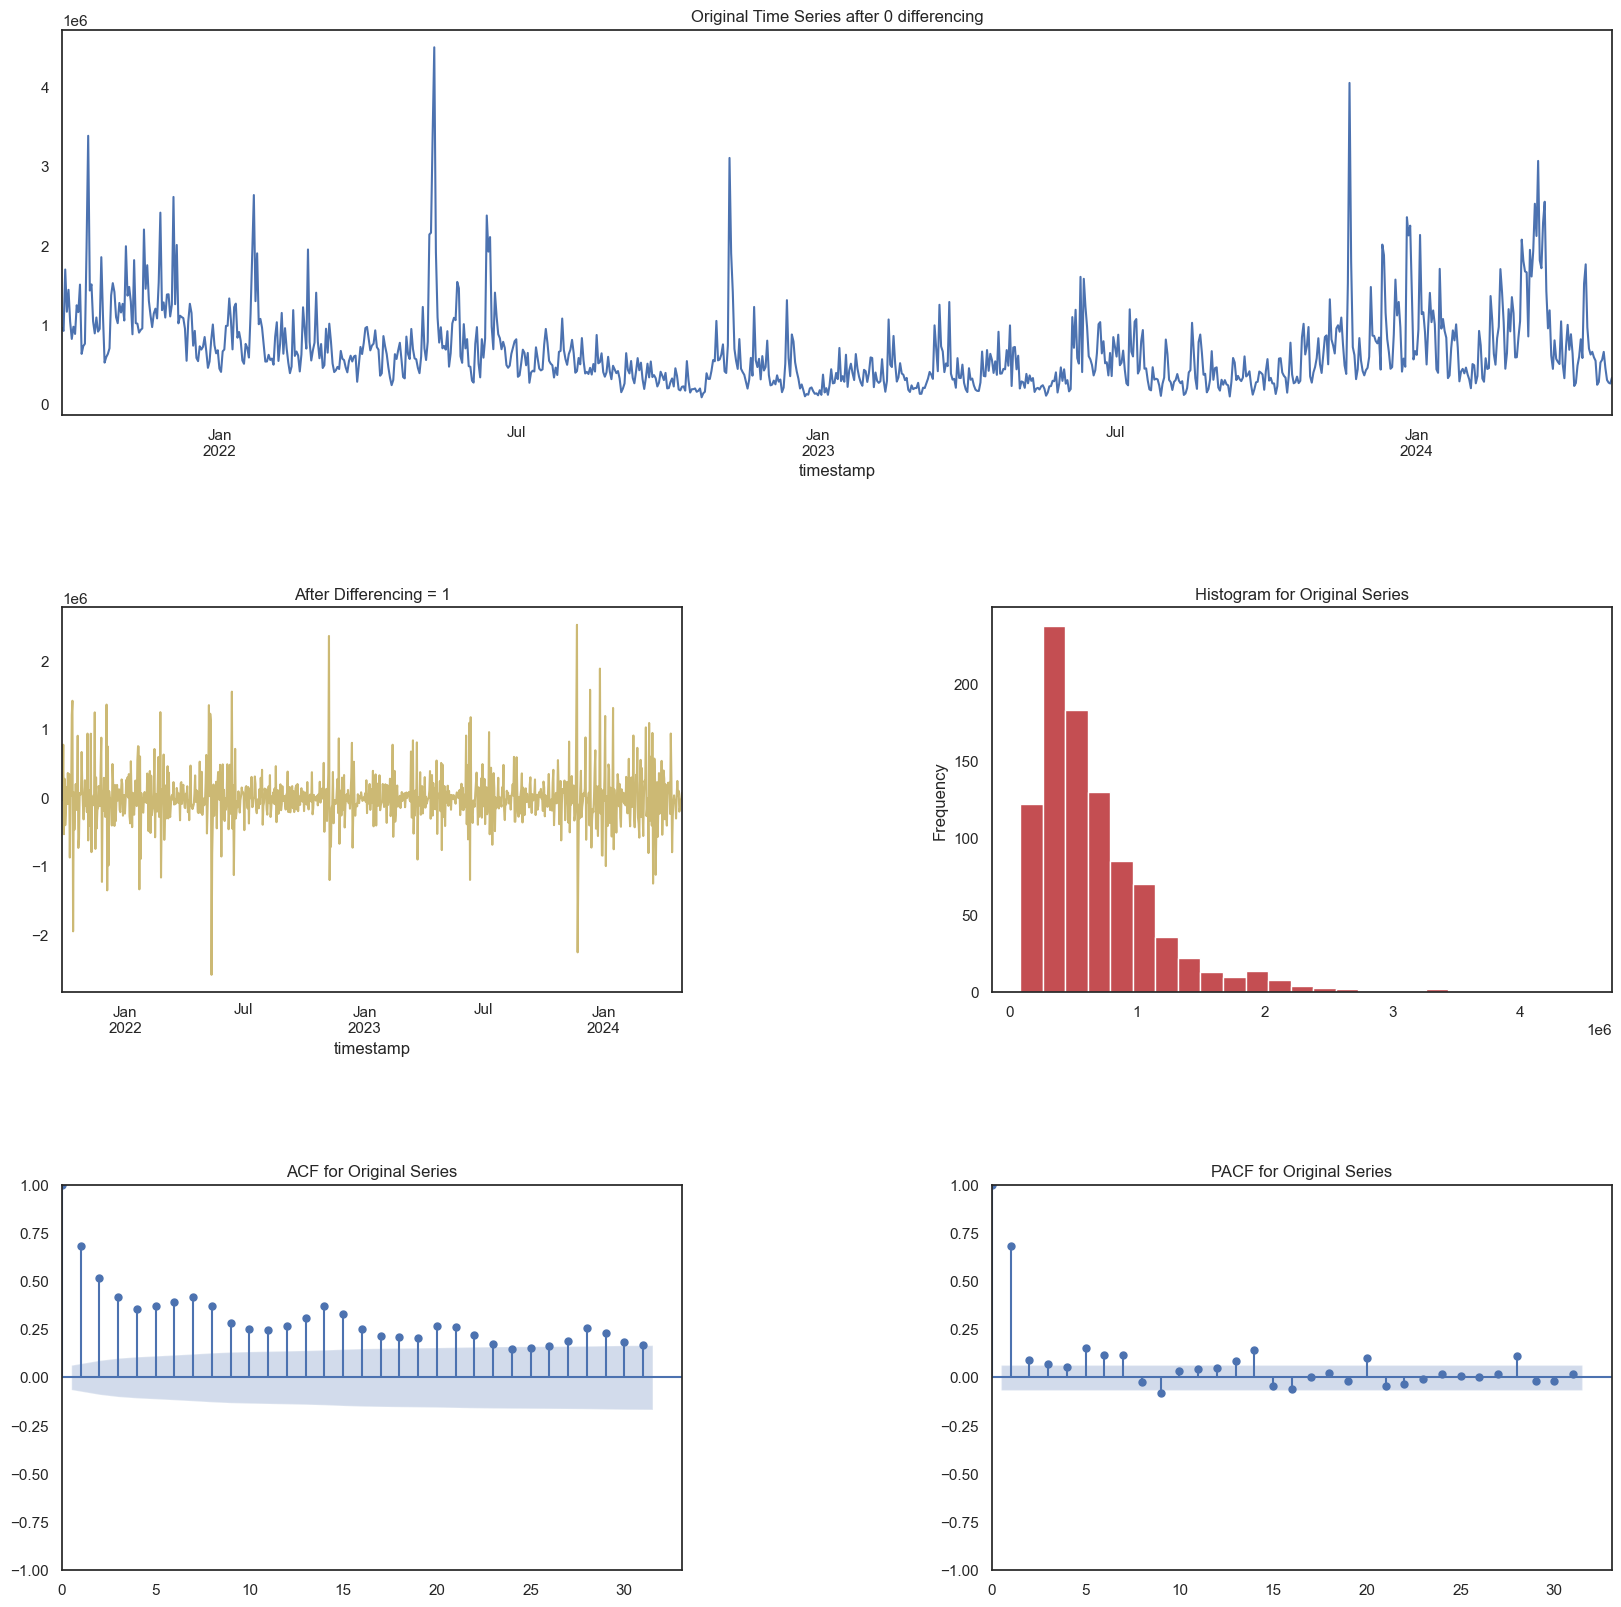

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=25626.873, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=25575.748, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=25537.119, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=25624.881, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=25539.230, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=25538.028, Time=0.73 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=25535.149, Time=1.04 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=25535.190, Time=2.38 sec
 ARIMA(0,1,1)(0,0,3)[12] intercept   

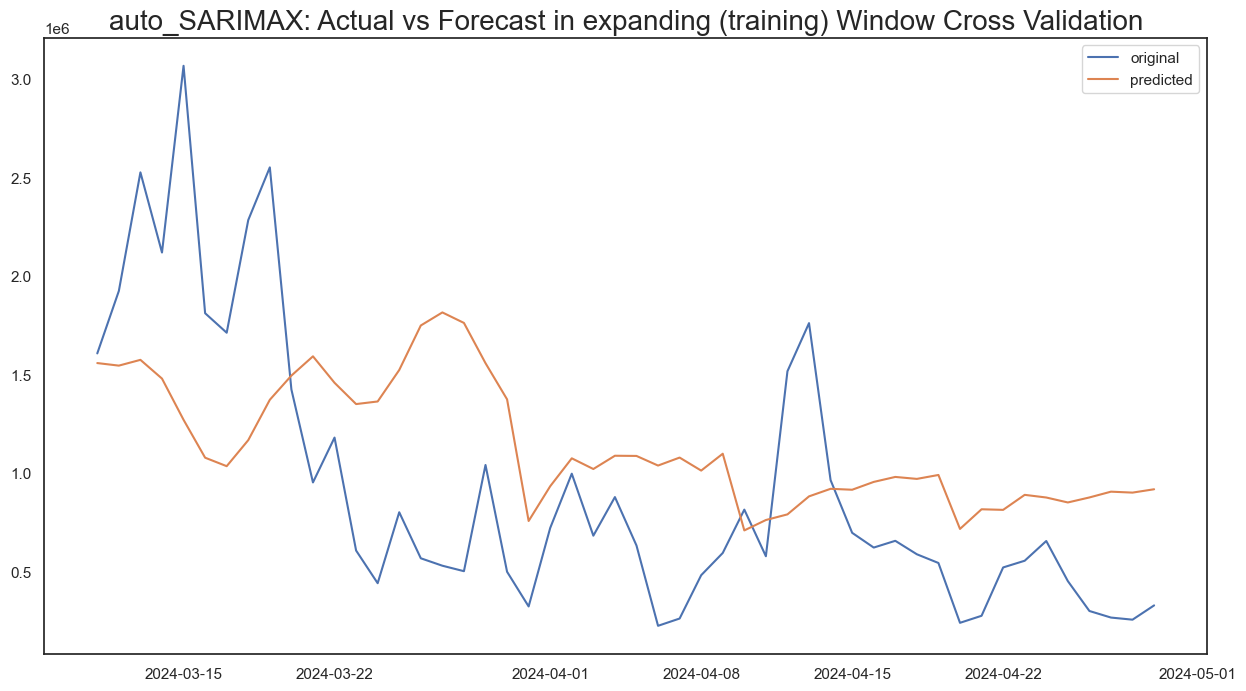

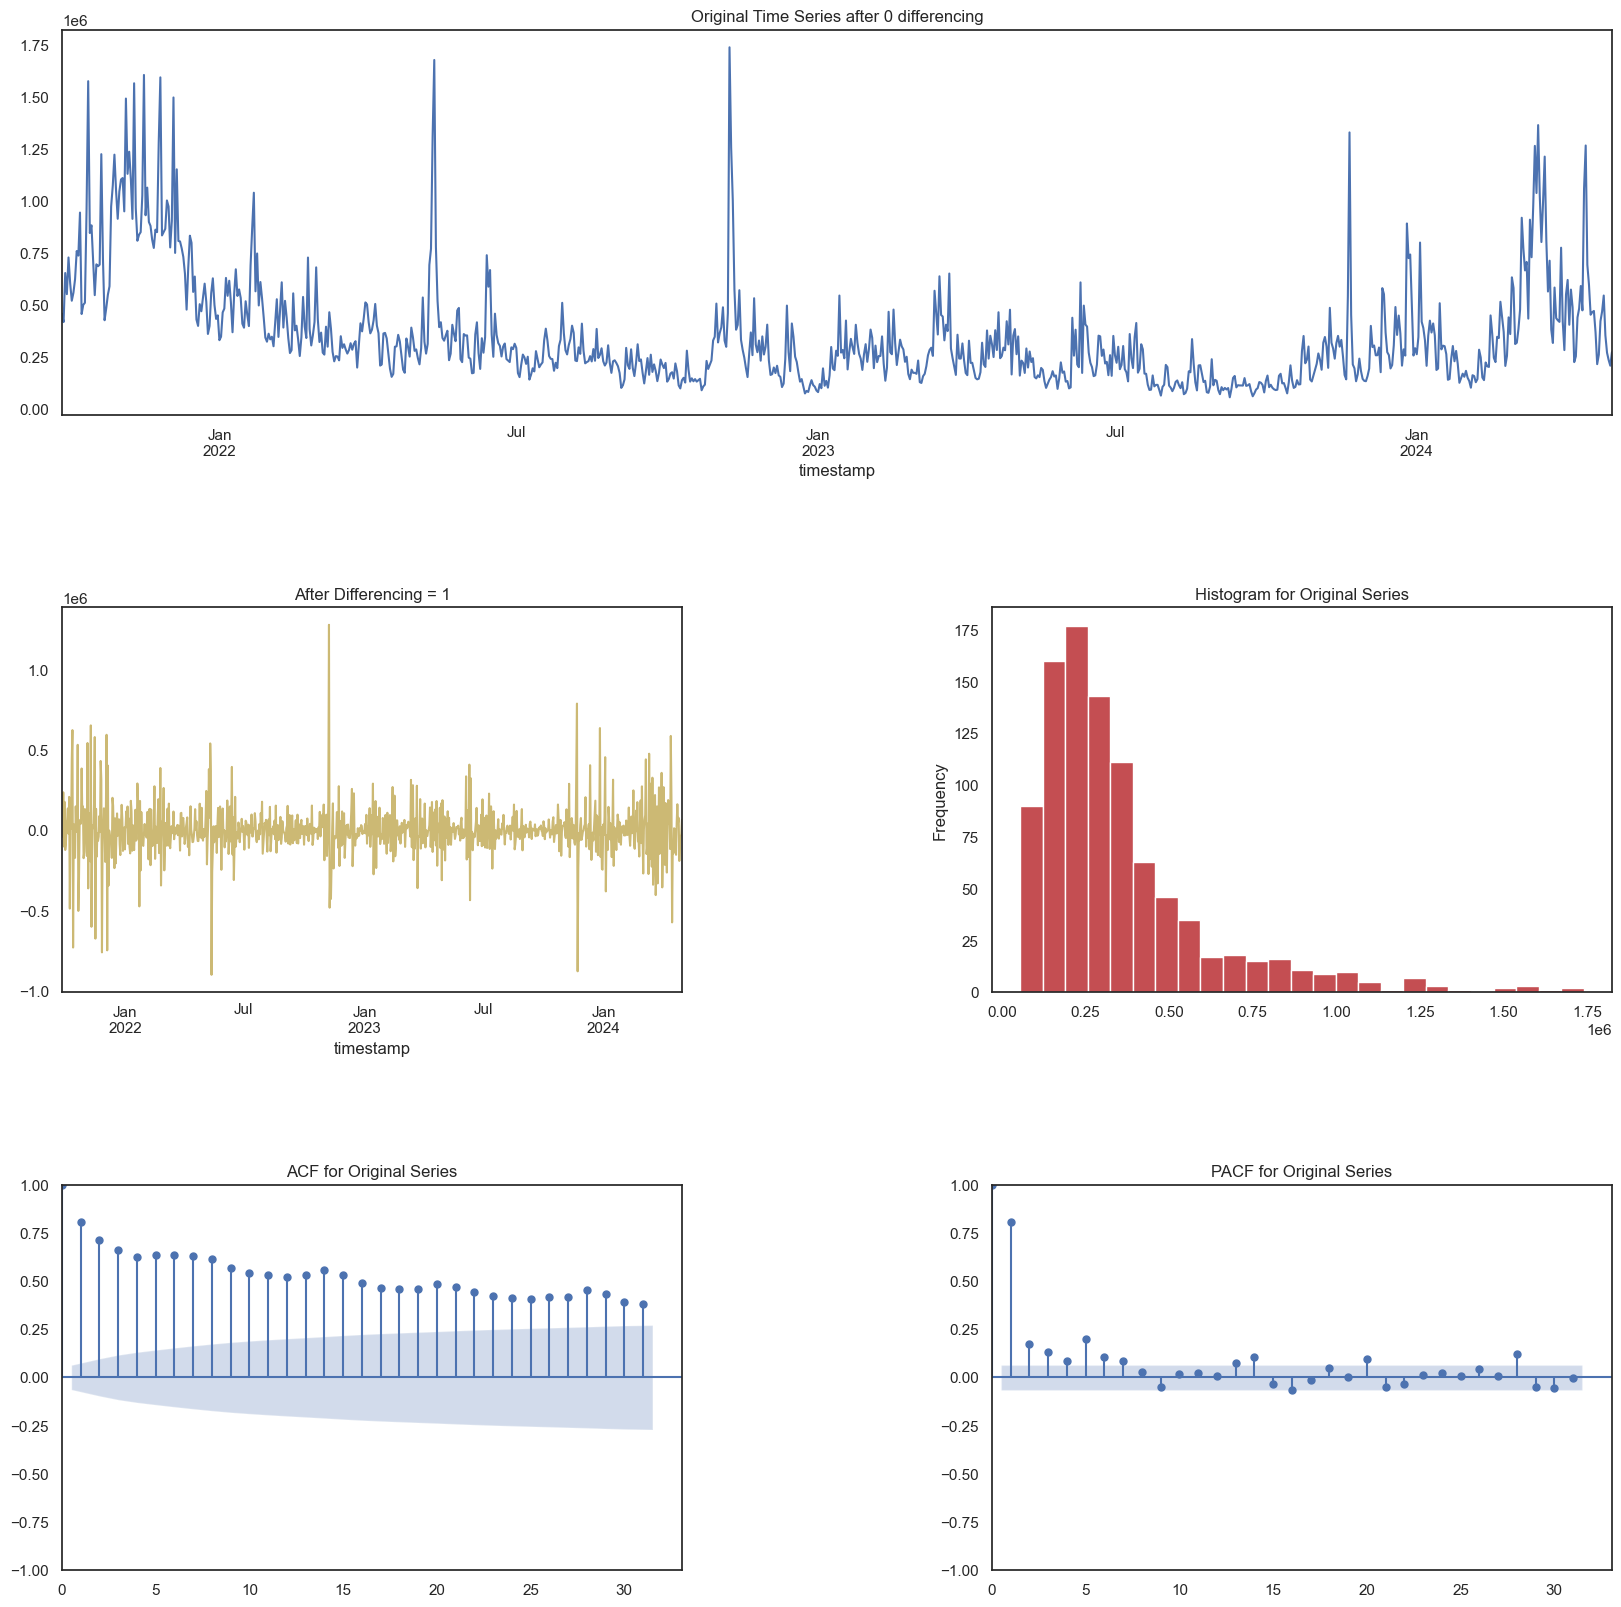

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=23958.610, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=23895.176, Time=0.56 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=23849.078, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=23956.620, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=23853.661, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=23850.046, Time=0.66 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=23848.529, Time=1.17 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=23849.736, Time=2.15 sec
 ARIMA(0,1,1)(0,0,3)[12] intercept   

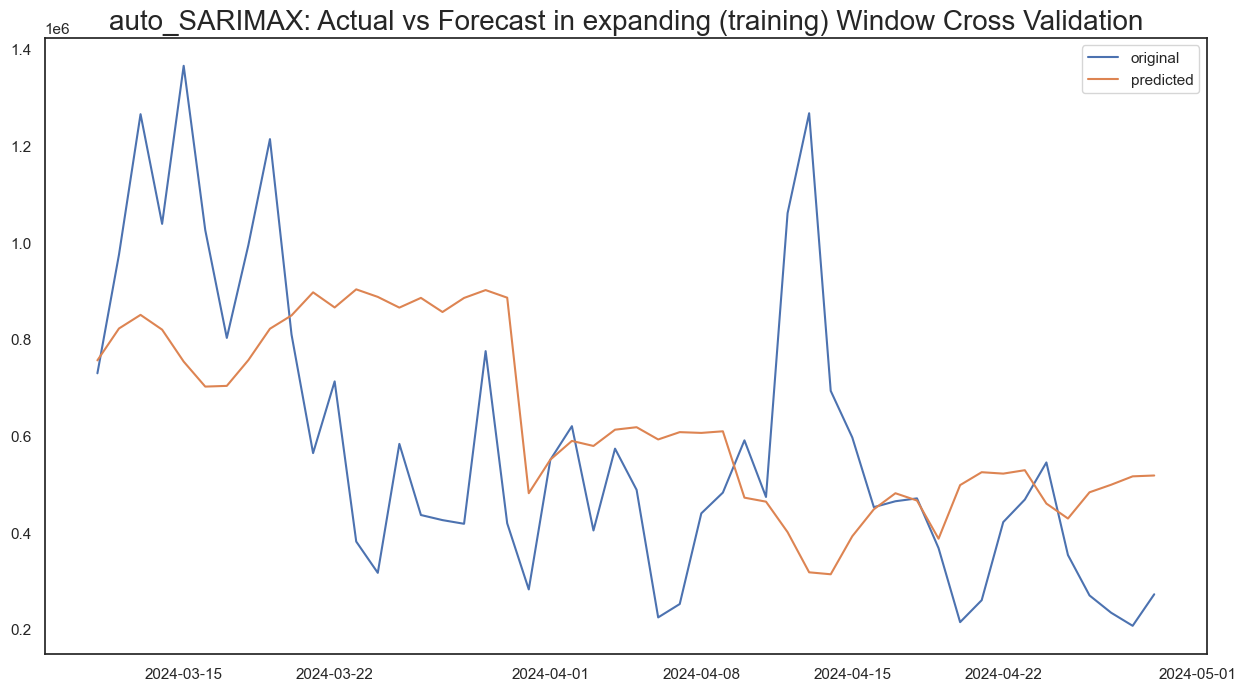

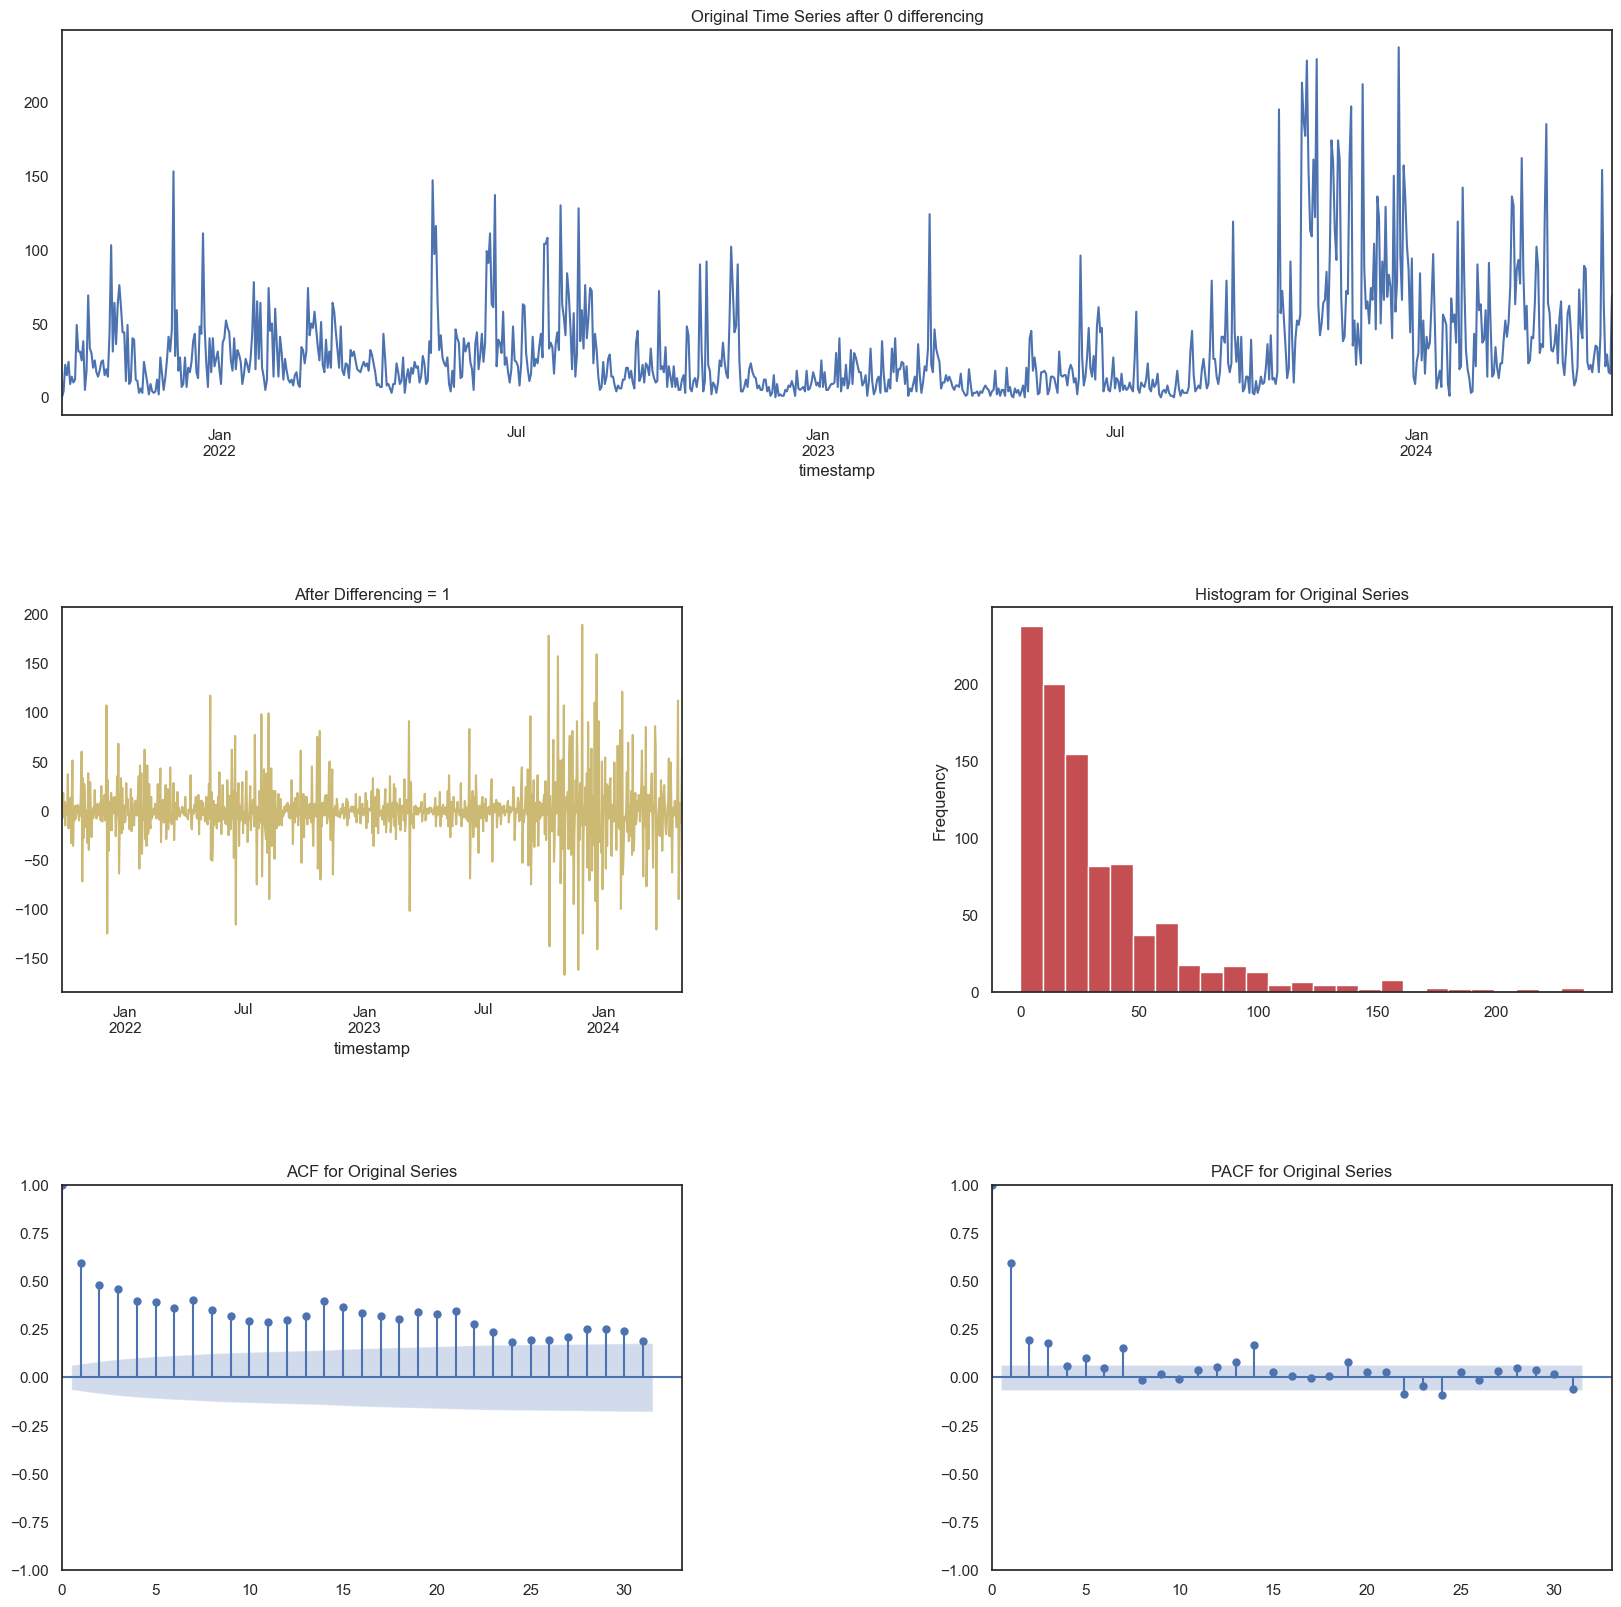

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8719.608, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8583.447, Time=0.47 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8466.672, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8717.609, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=8469.054, Time=0.18 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=8451.849, Time=1.48 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=8449.944, Time=3.30 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=8450.84

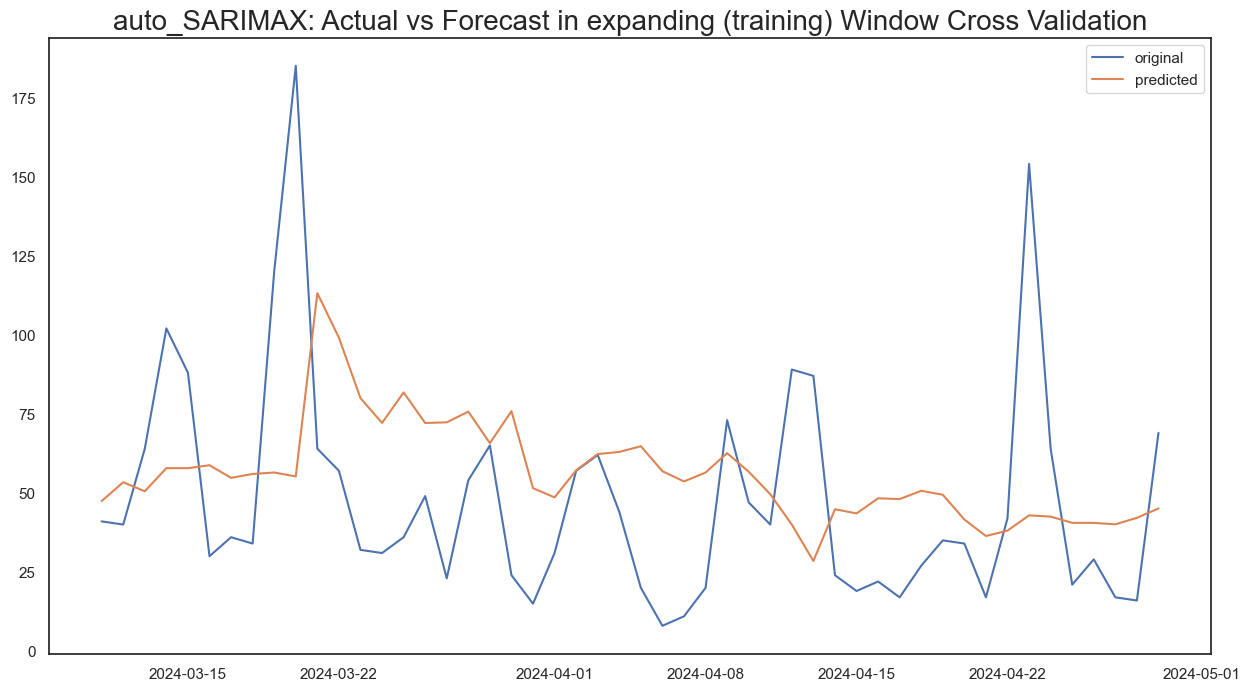

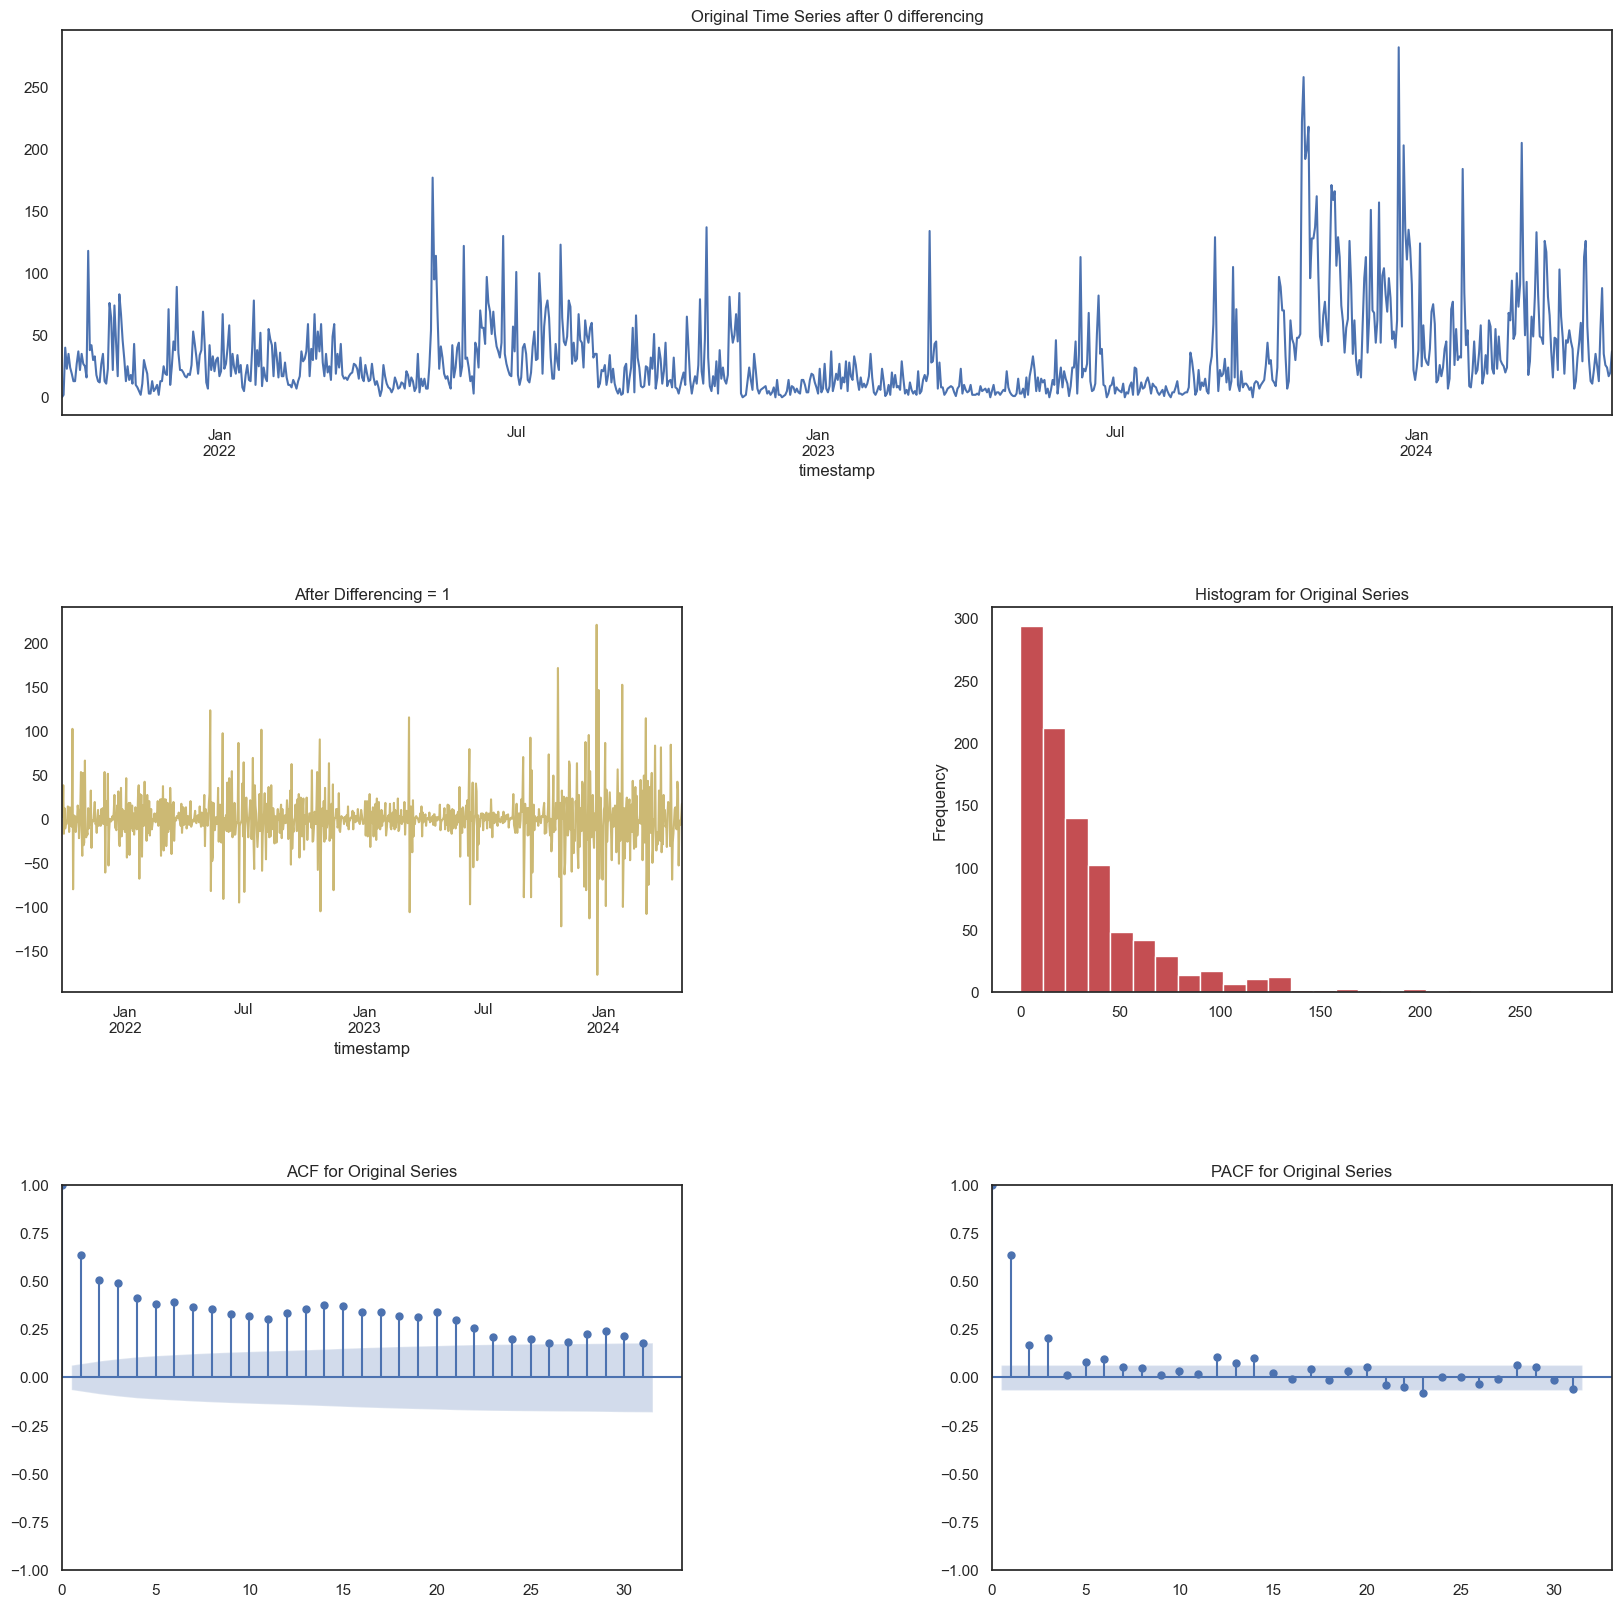

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8633.491, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8529.648, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8431.582, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8631.492, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=8429.597, Time=0.15 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=8431.584, Time=0.54 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=8430.104, Time=1.20 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=8384.755, Time=0.37 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=83

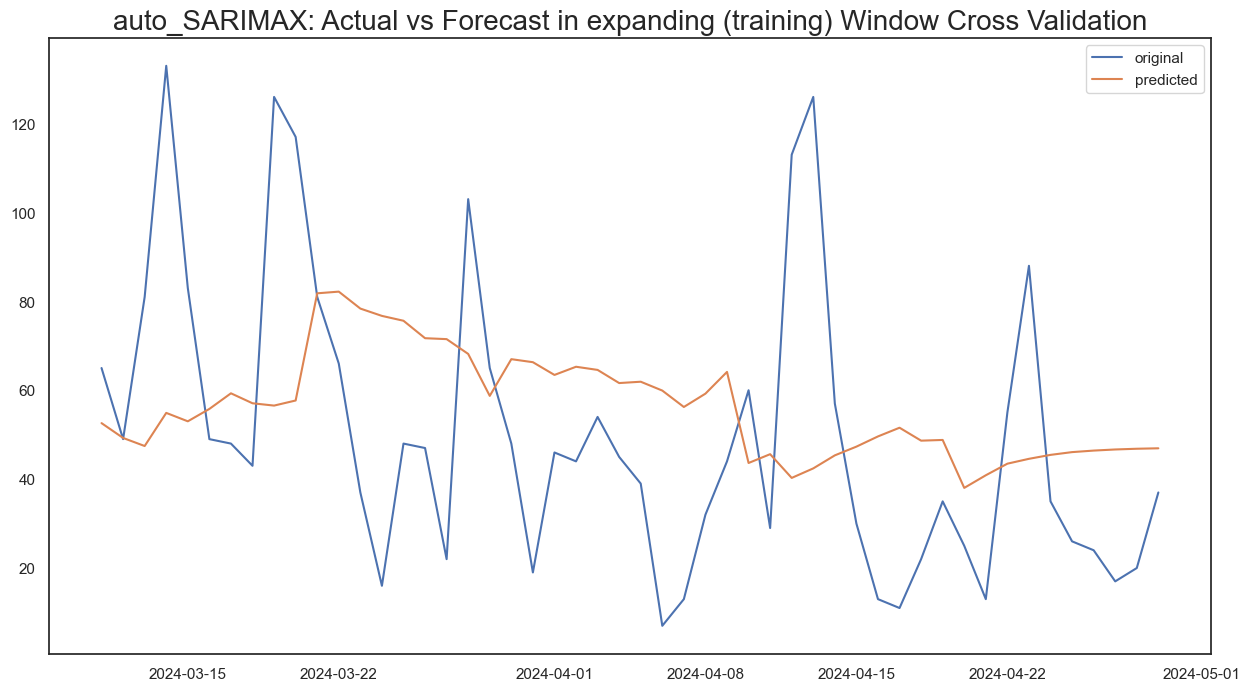

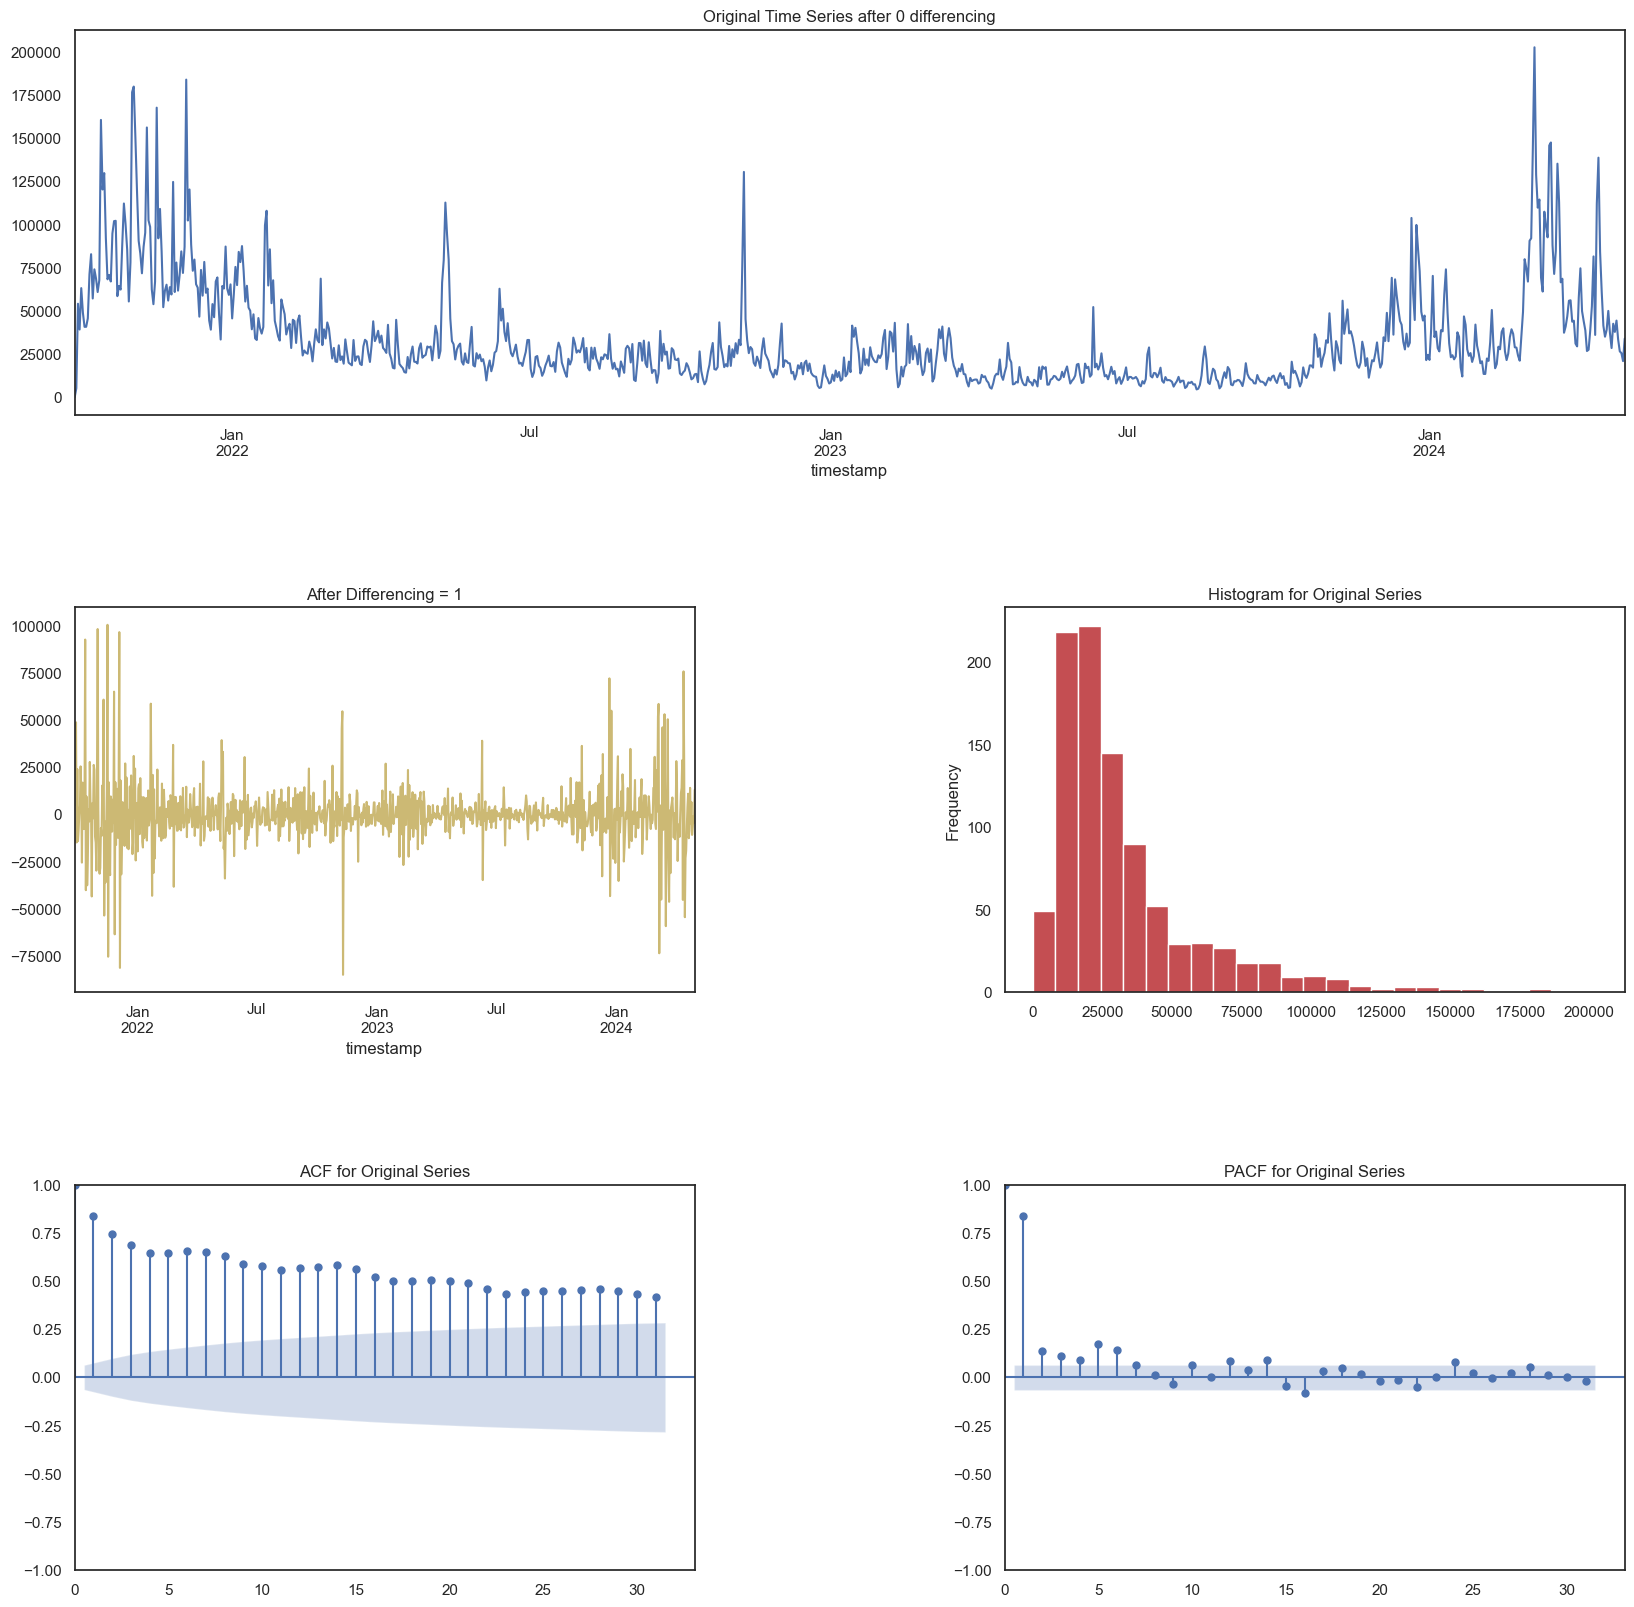

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=19779.628, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=19735.018, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=19716.297, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=19777.647, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=19714.486, Time=0.09 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=19716.313, Time=0.26 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=19717.478, Time=0.72 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=19643.662, Time=0.33 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   

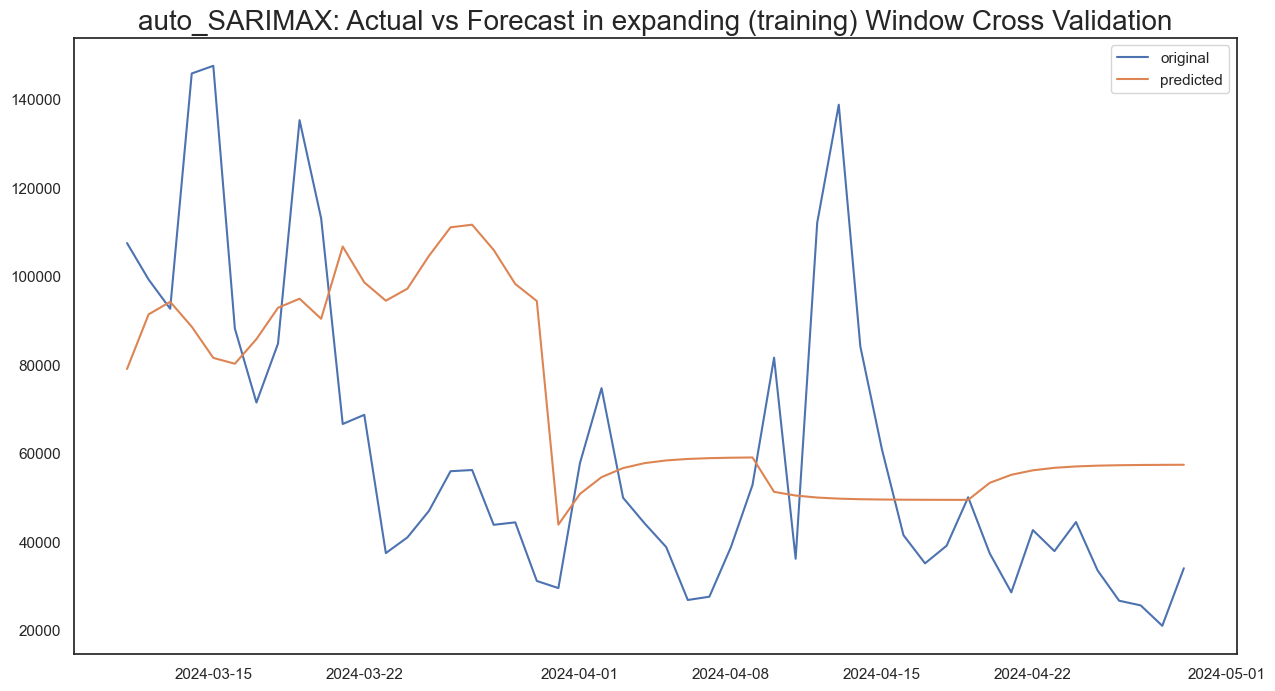

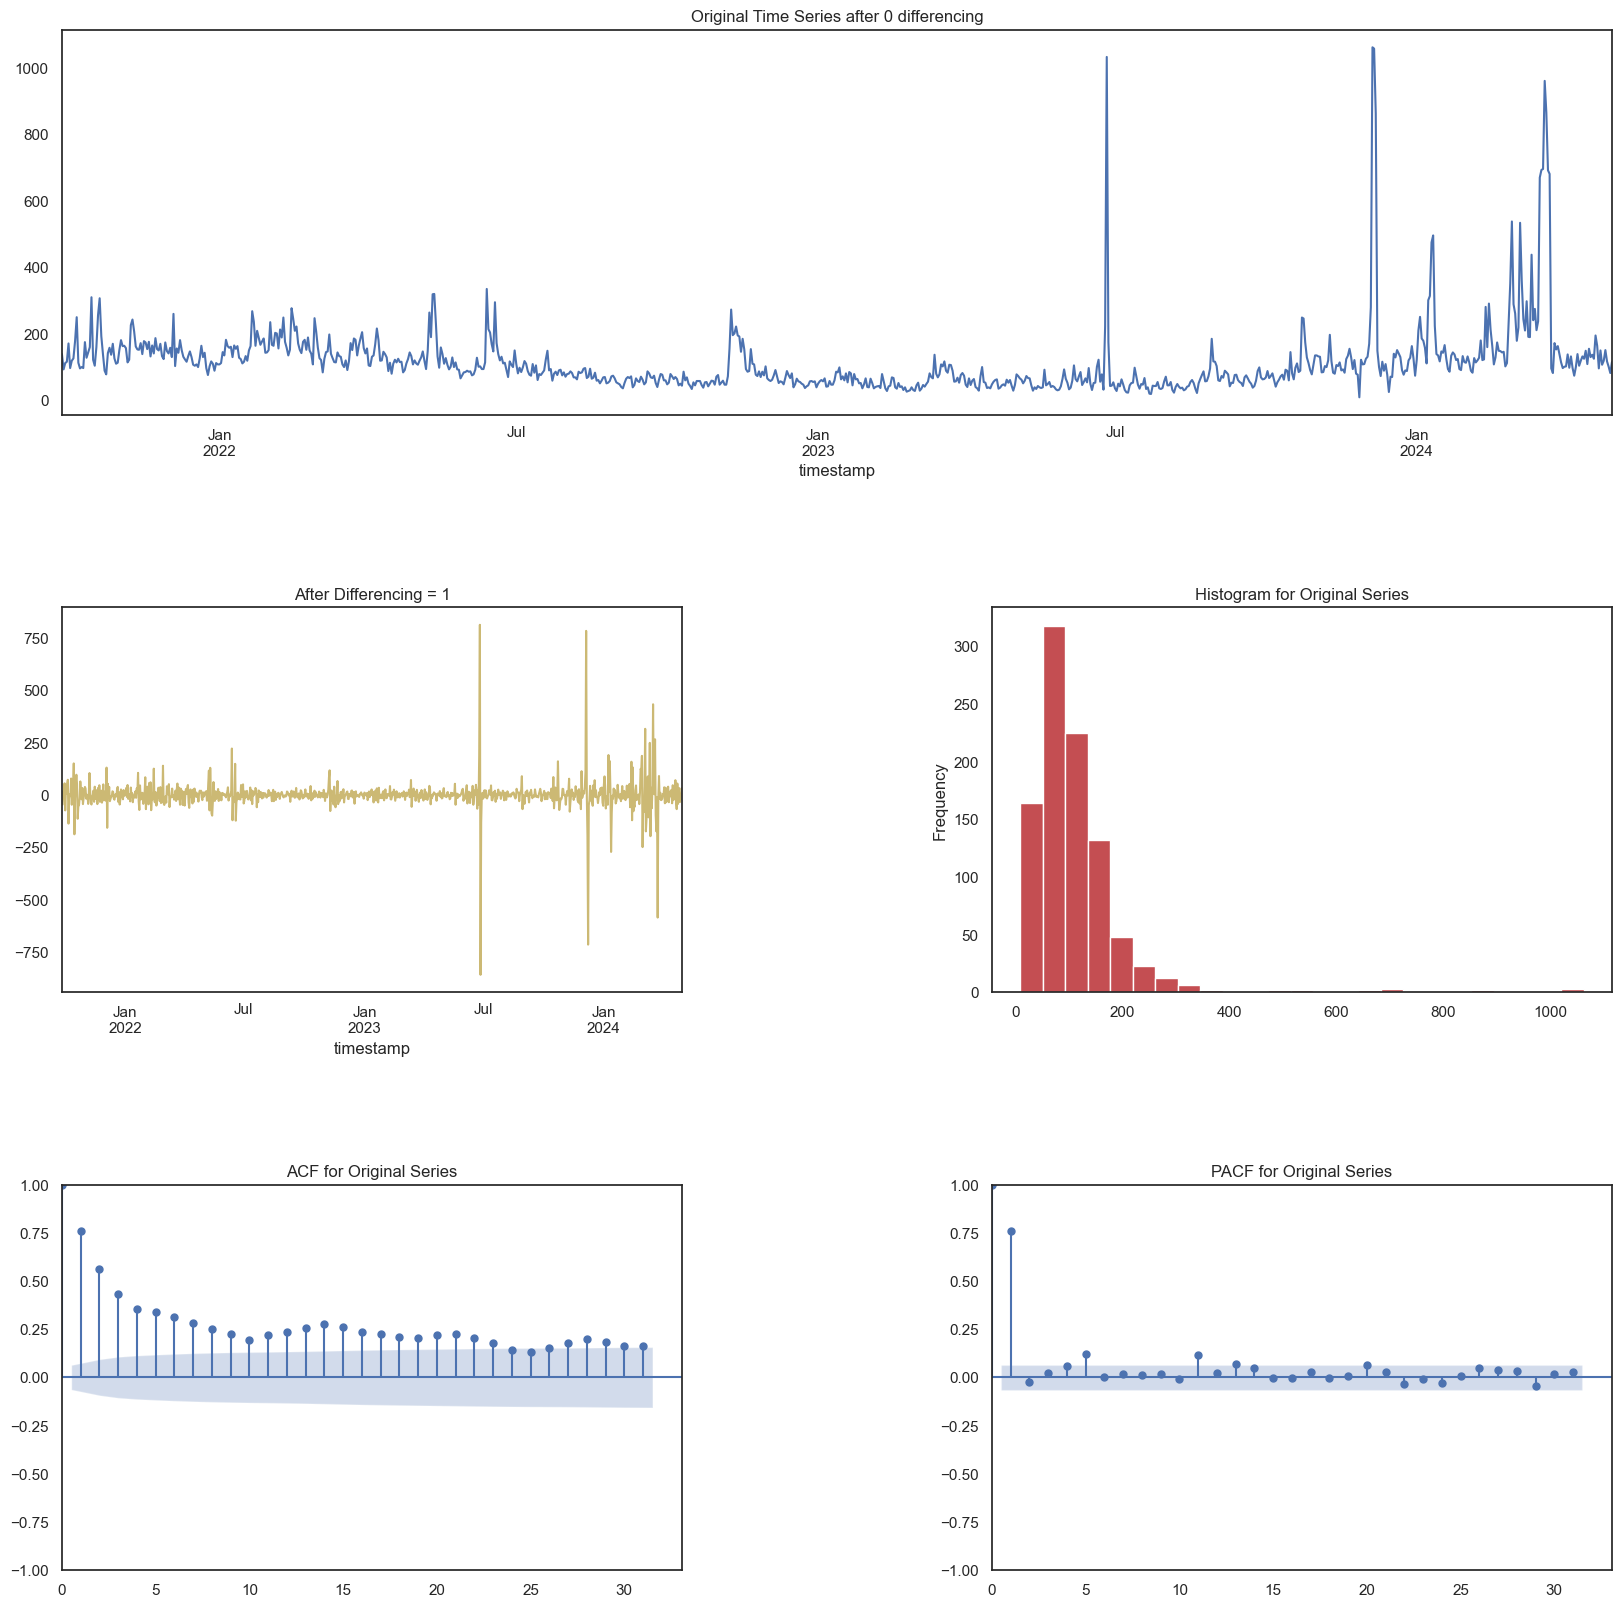

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=10082.342, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=10075.137, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=10069.040, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=10080.343, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=10067.971, Time=0.15 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=10069.106, Time=0.19 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=10070.929, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=9915.747, Time=0.40 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   :

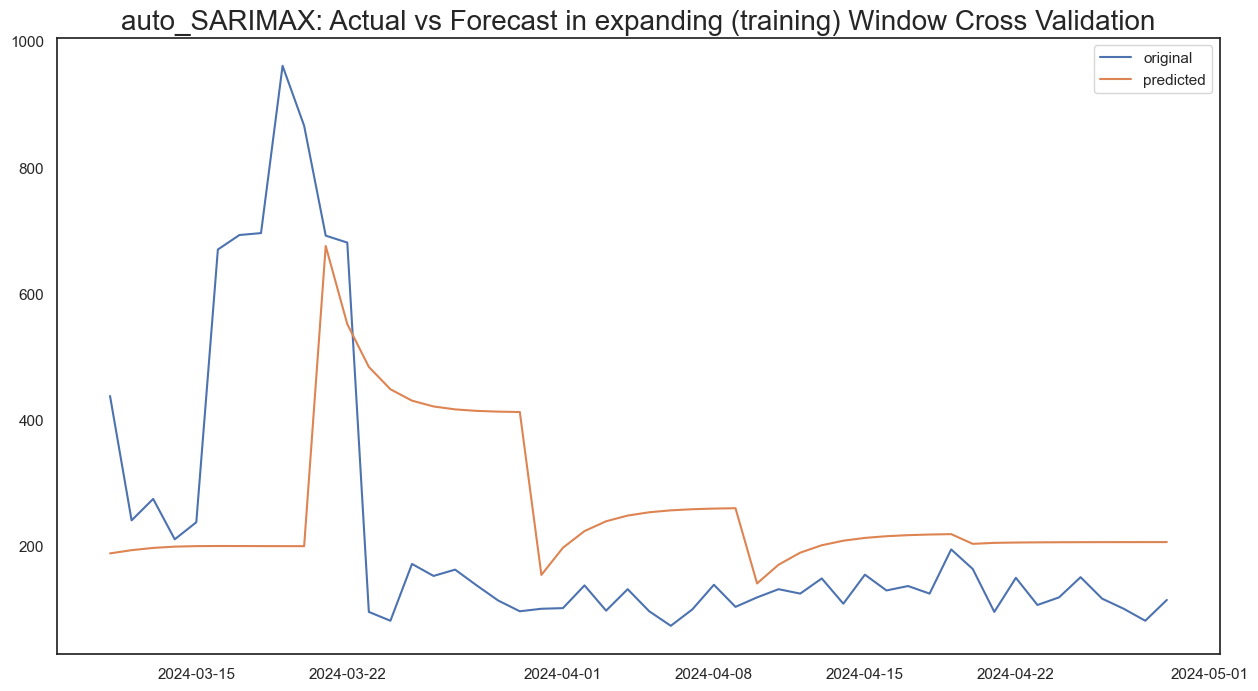

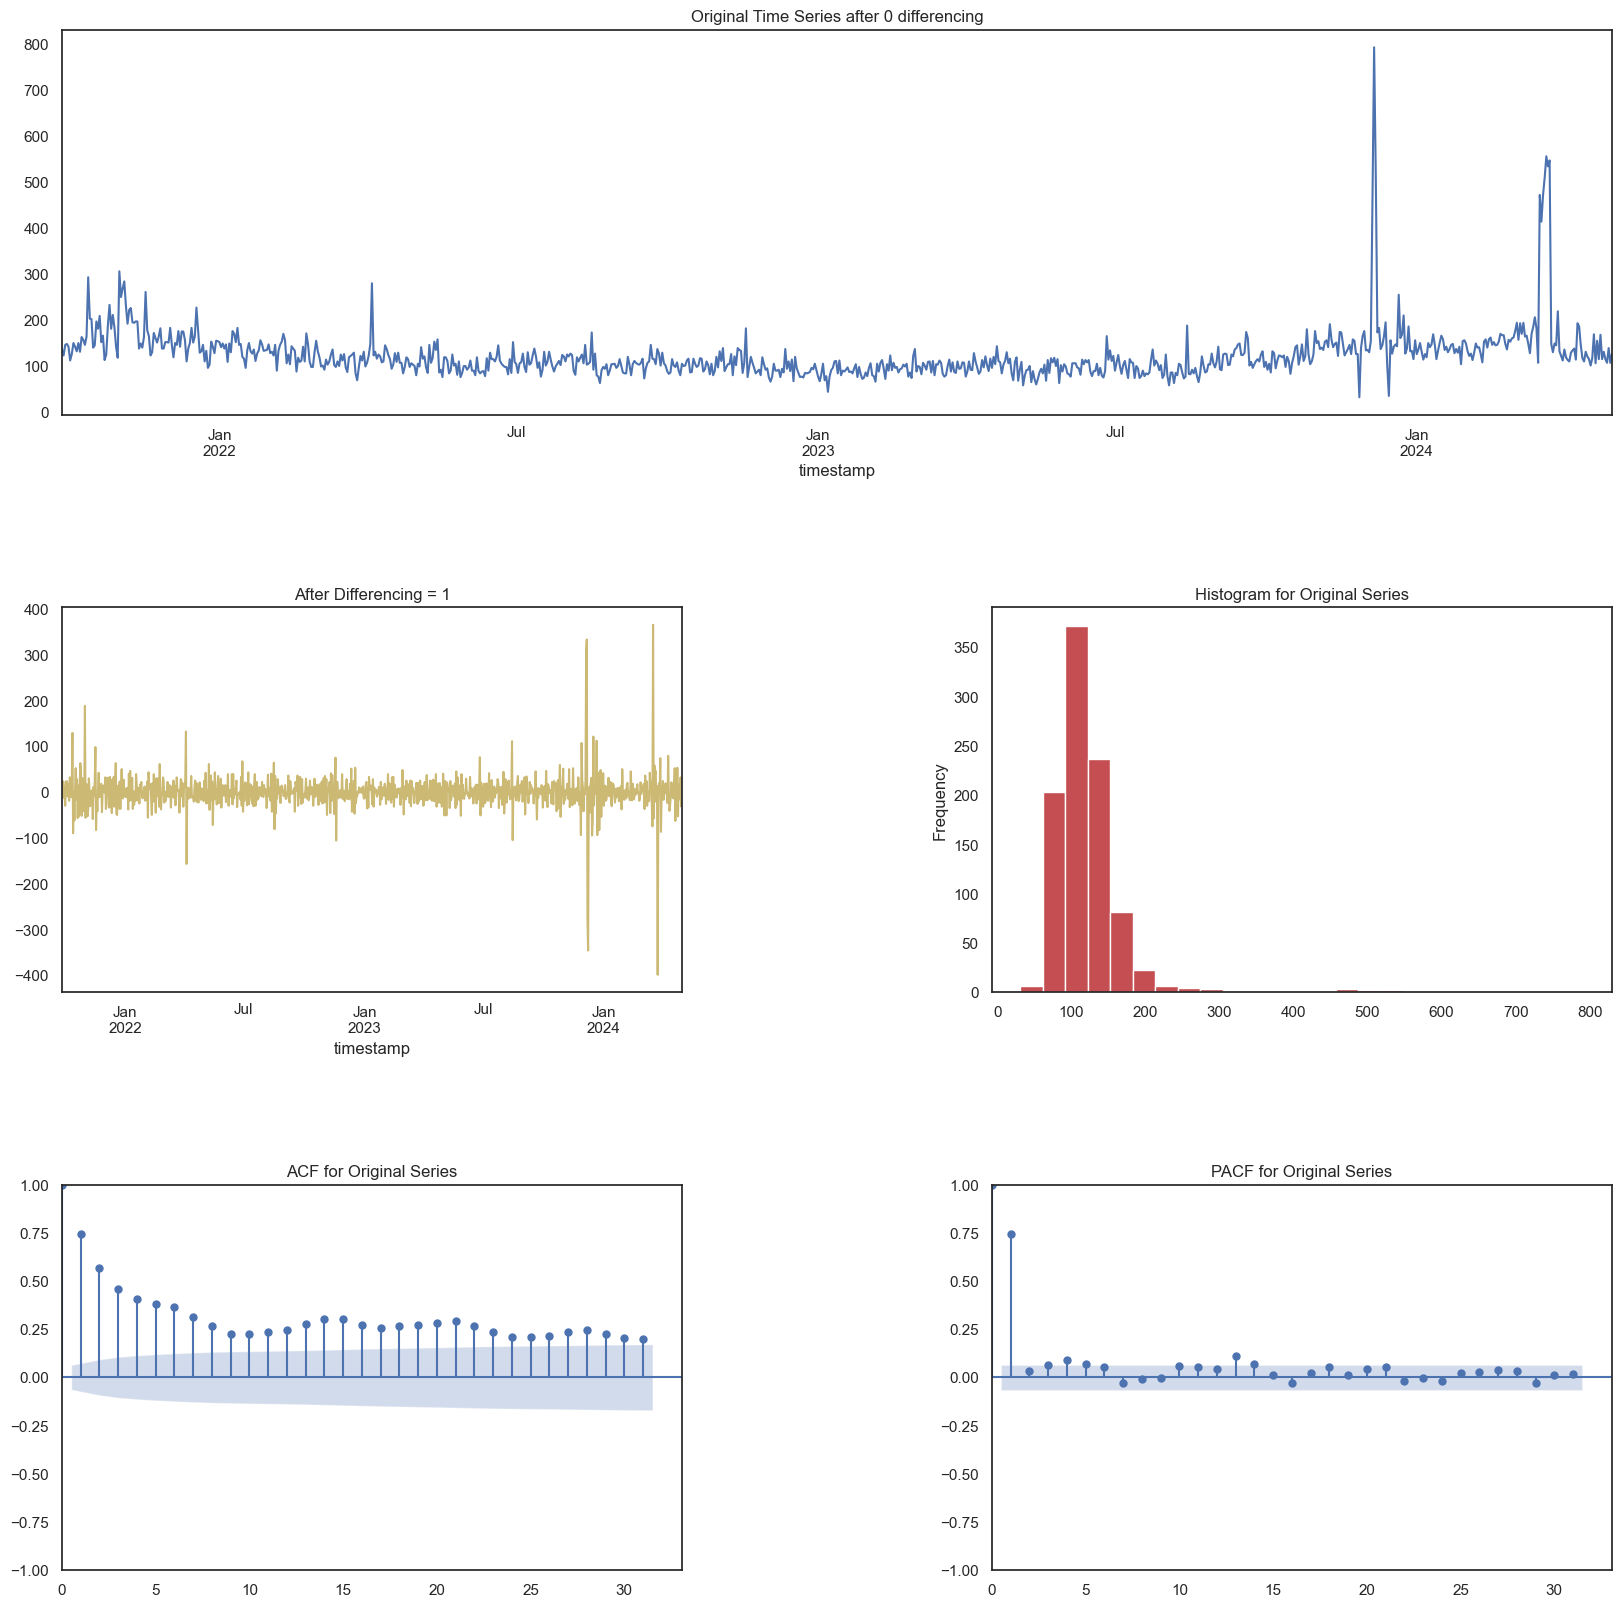

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8909.186, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8892.919, Time=0.48 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8868.788, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8907.186, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=8867.339, Time=0.15 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=8868.875, Time=0.42 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=8869.908, Time=1.00 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=8704.157, Time=0.38 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=87

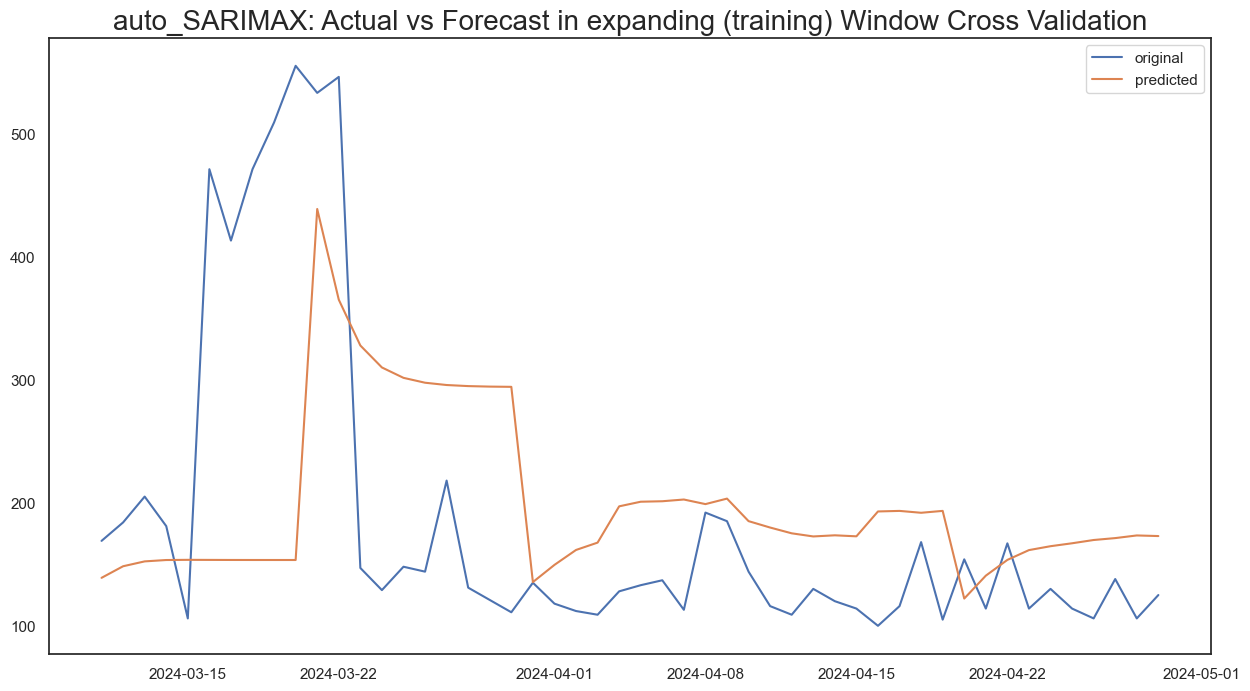

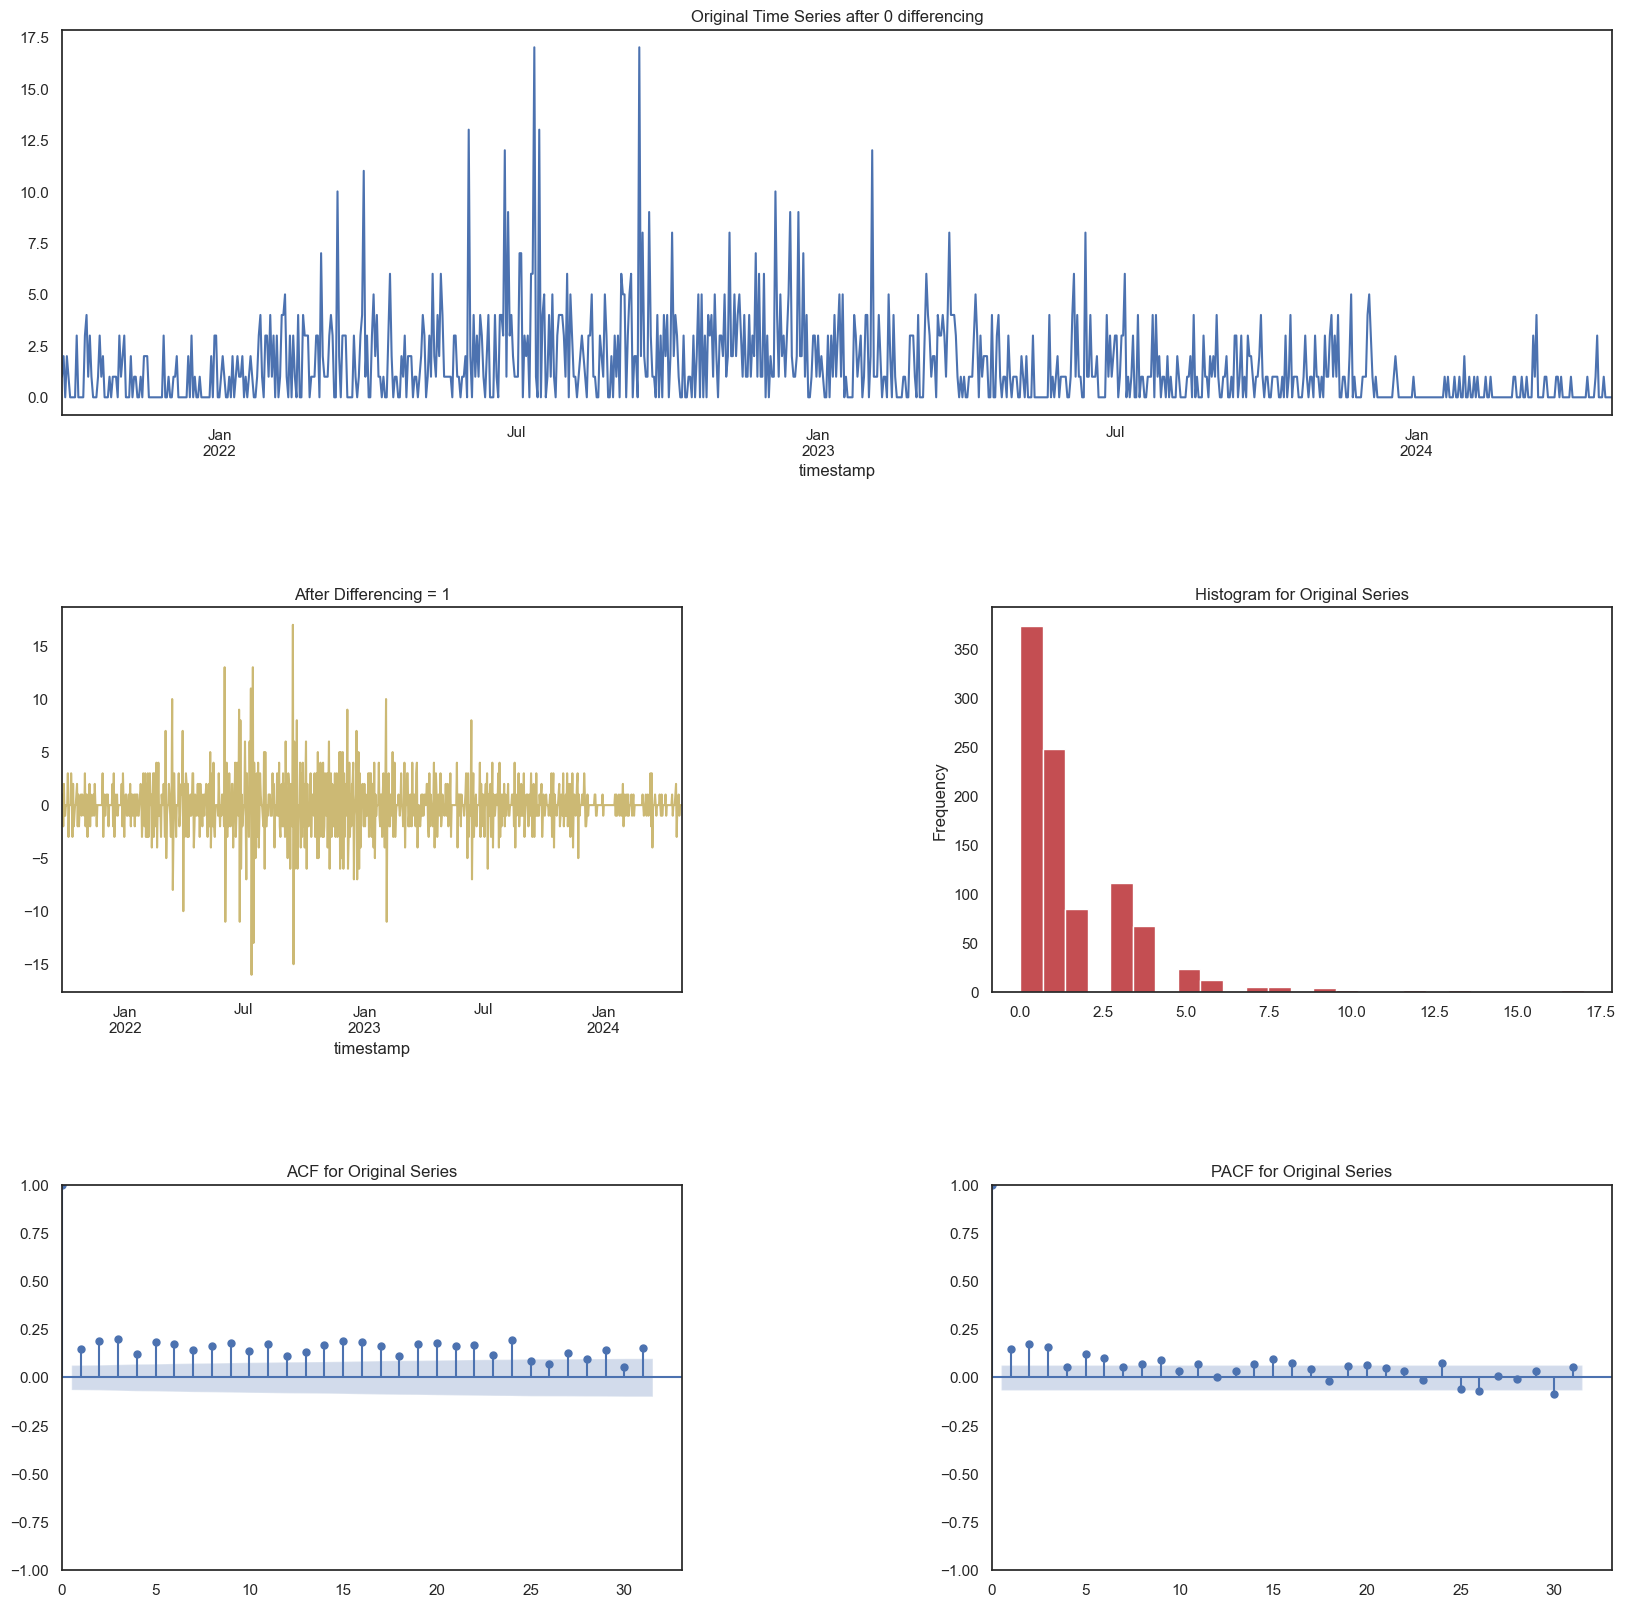

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4337.923, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4052.028, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3741.475, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4335.923, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3741.541, Time=0.20 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=3740.729, Time=1.20 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=3741.184, Time=0.57 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=3738.194, Time=4.06 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=37

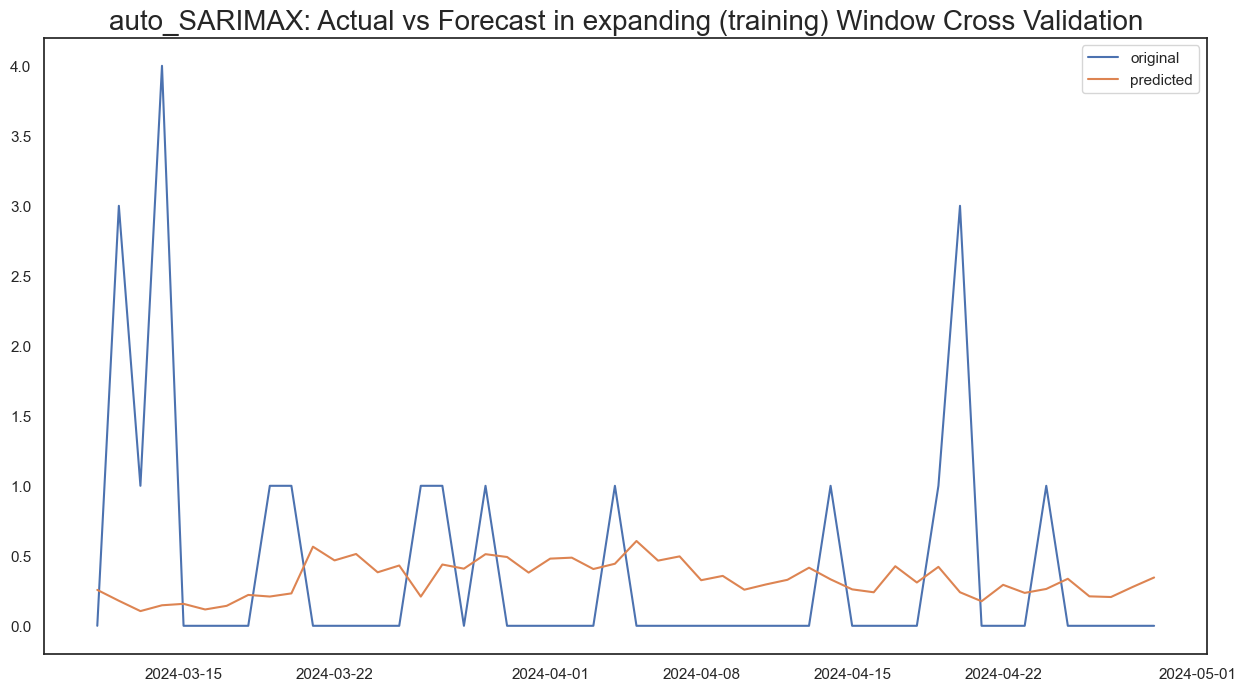

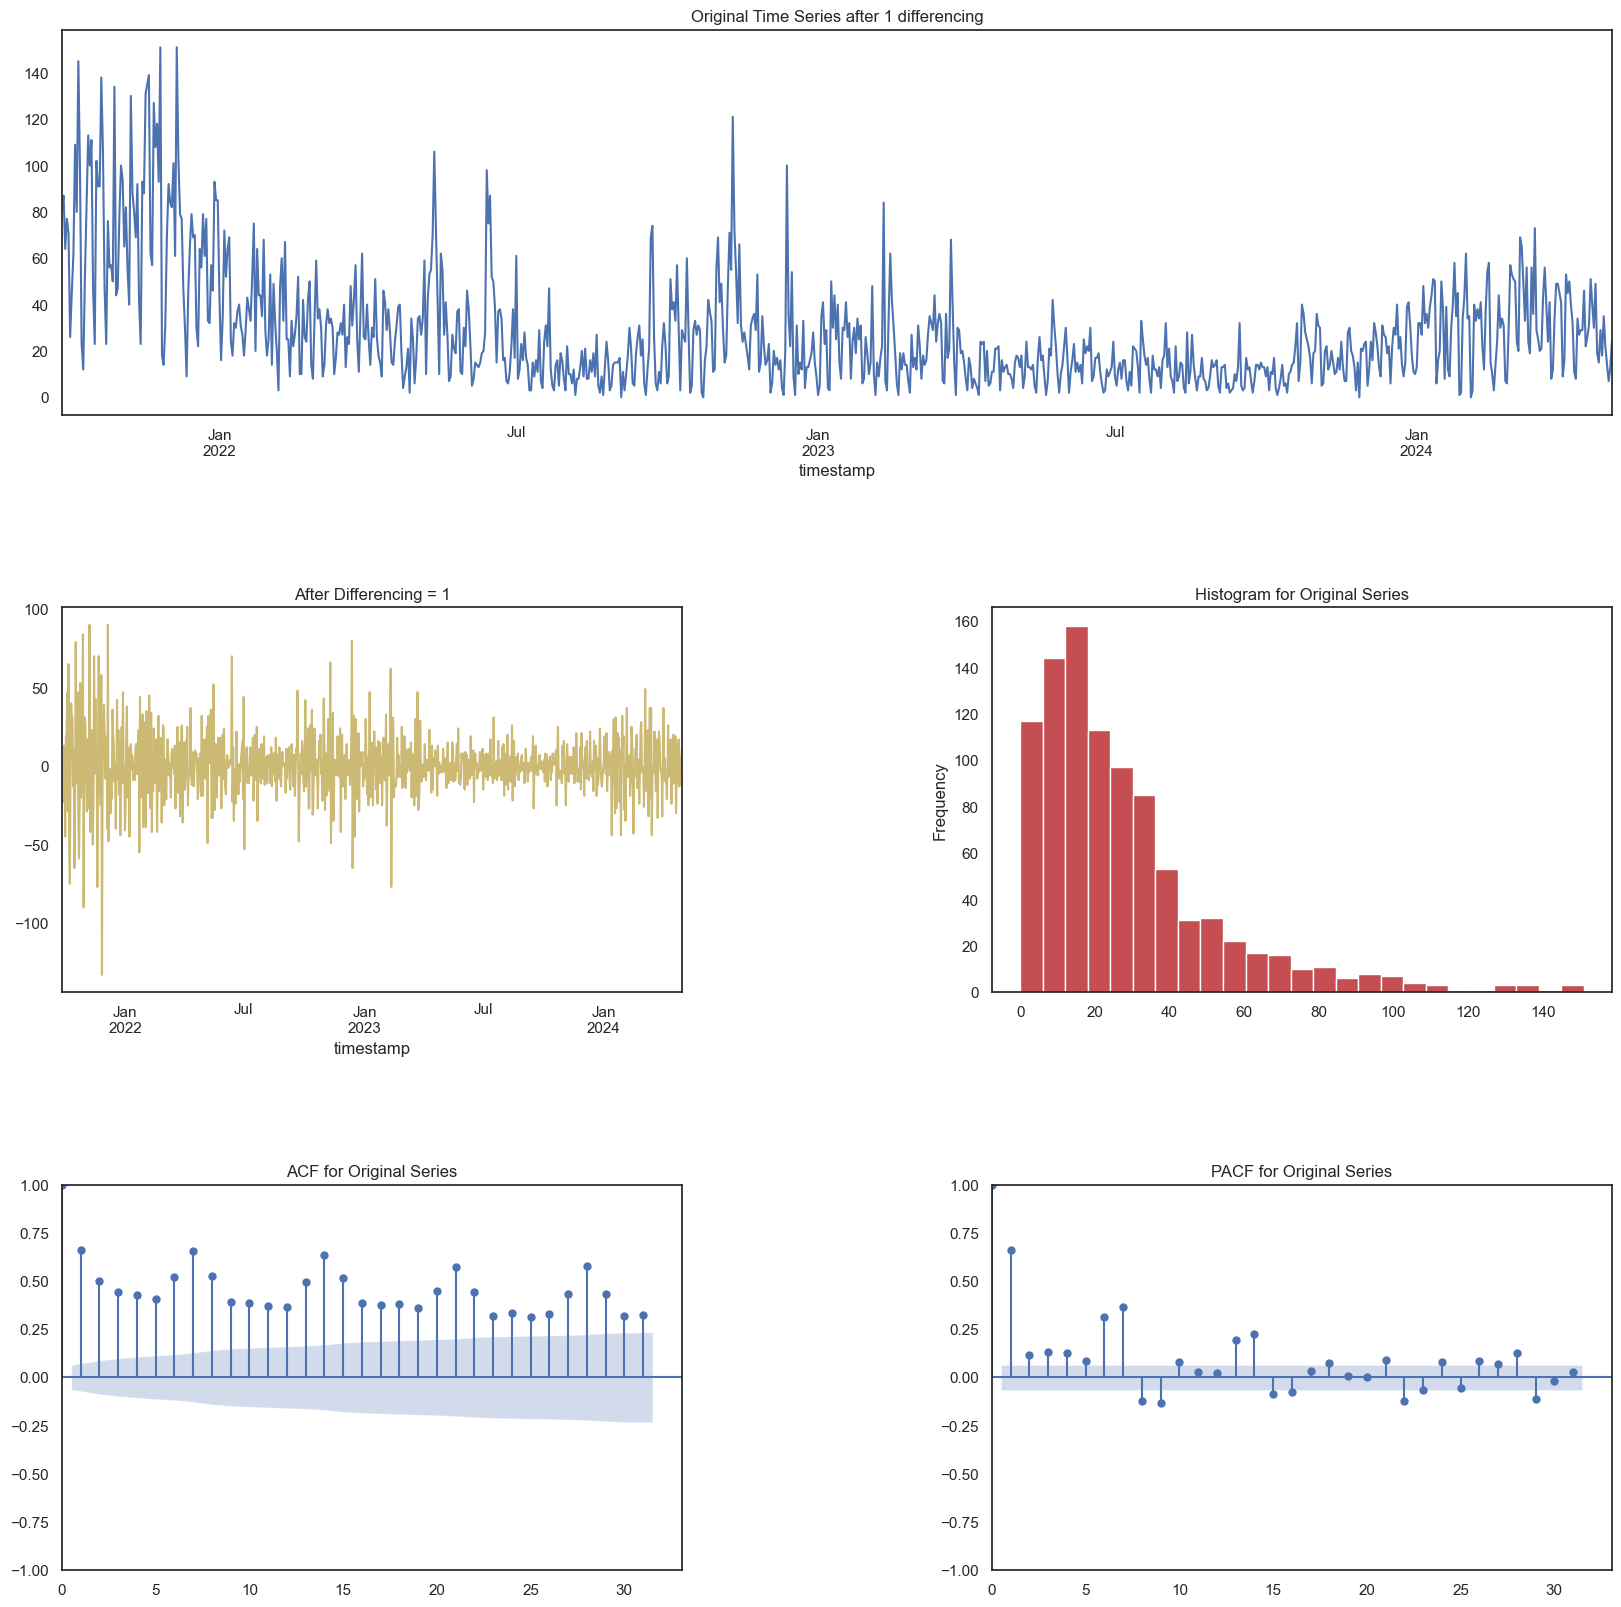

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7945.607, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=7829.402, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=7702.950, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7943.618, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=7749.325, Time=0.13 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=7704.273, Time=0.81 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=7702.621, Time=1.82 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=2.40 sec
 ARIMA(0,1,1)(0,0,3)[12] intercept   : AIC=7656.84

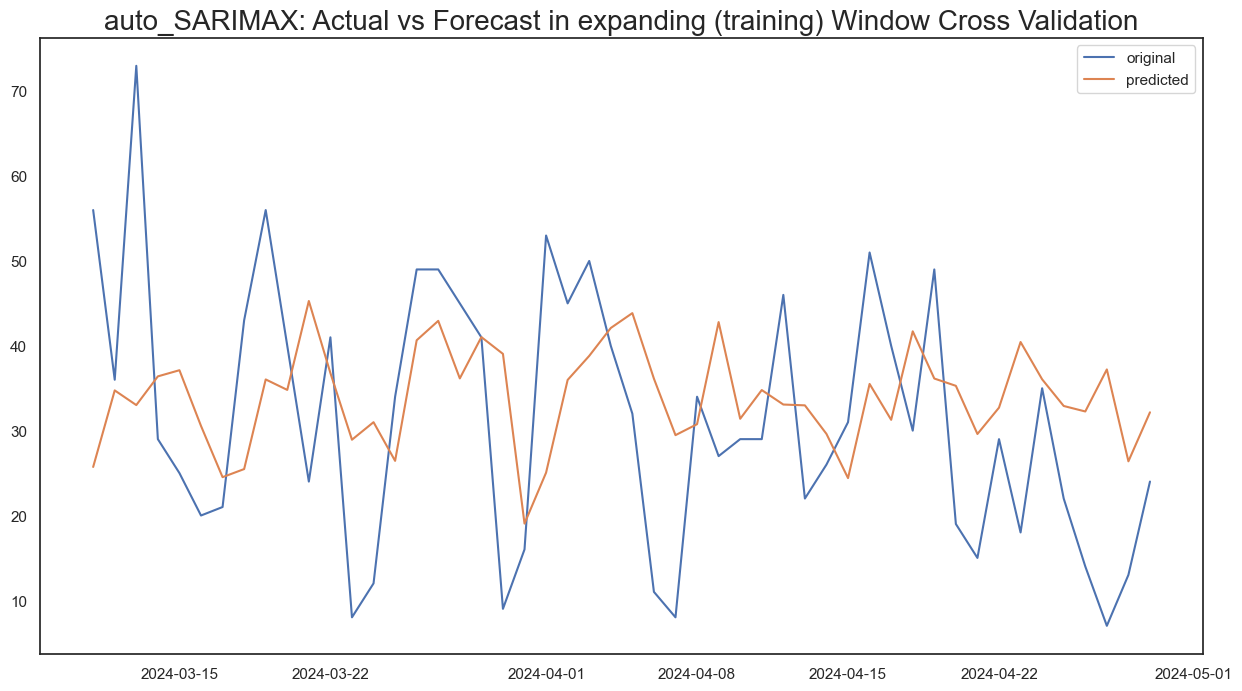

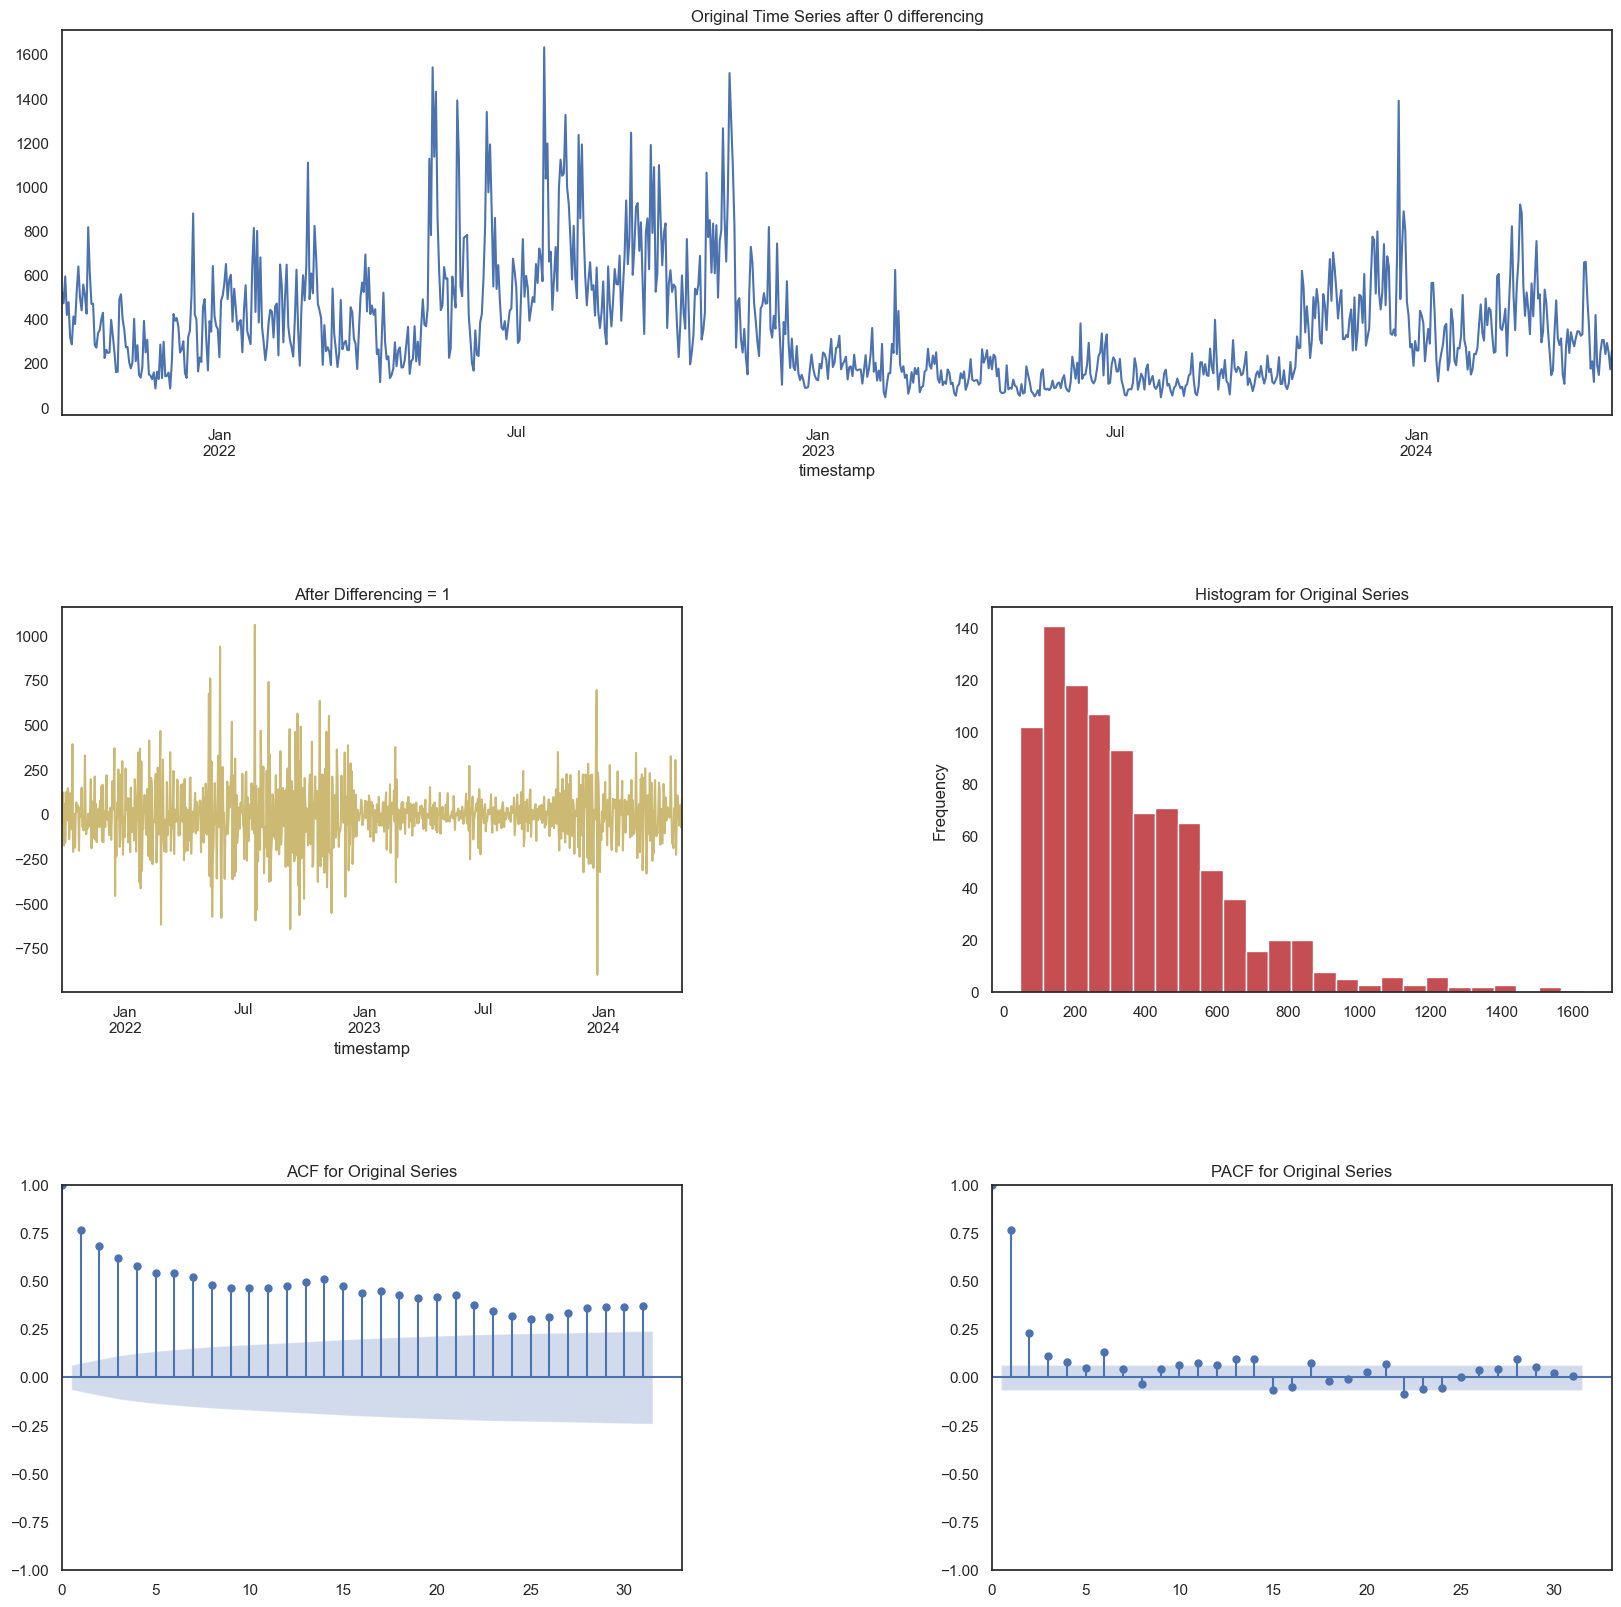

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=11820.499, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=11722.176, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=11677.791, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=11818.501, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=11676.474, Time=0.19 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=11677.930, Time=0.50 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=11635.035, Time=0.44 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=

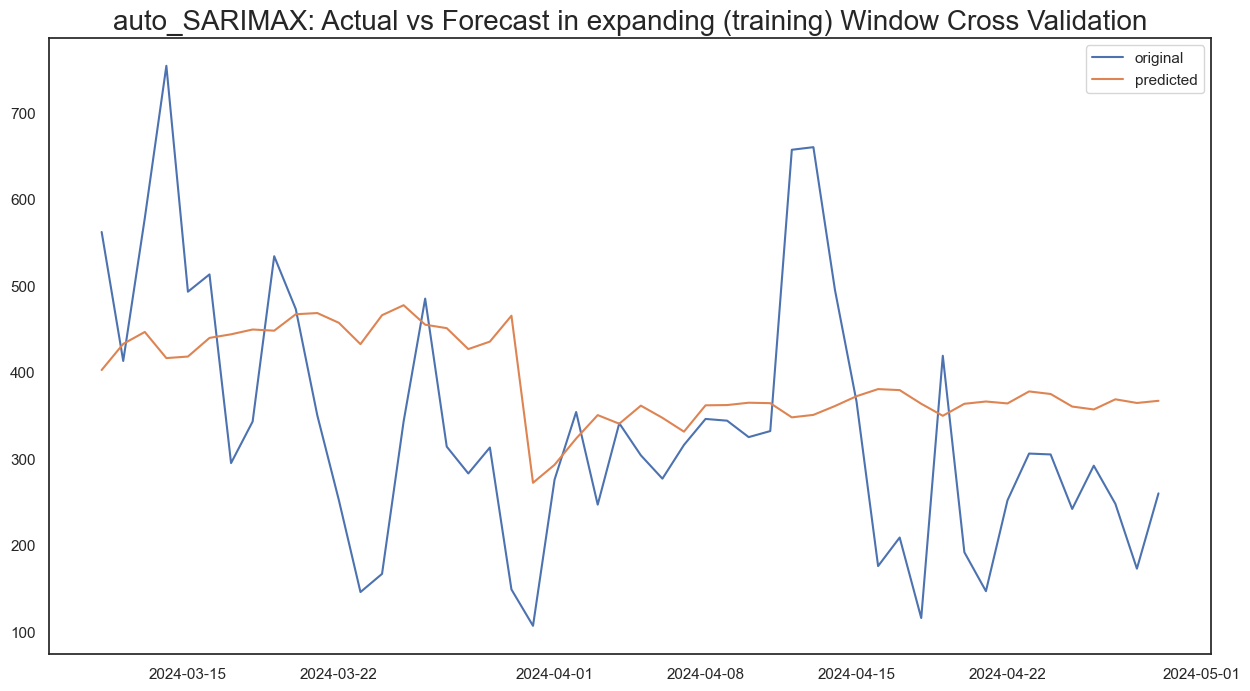

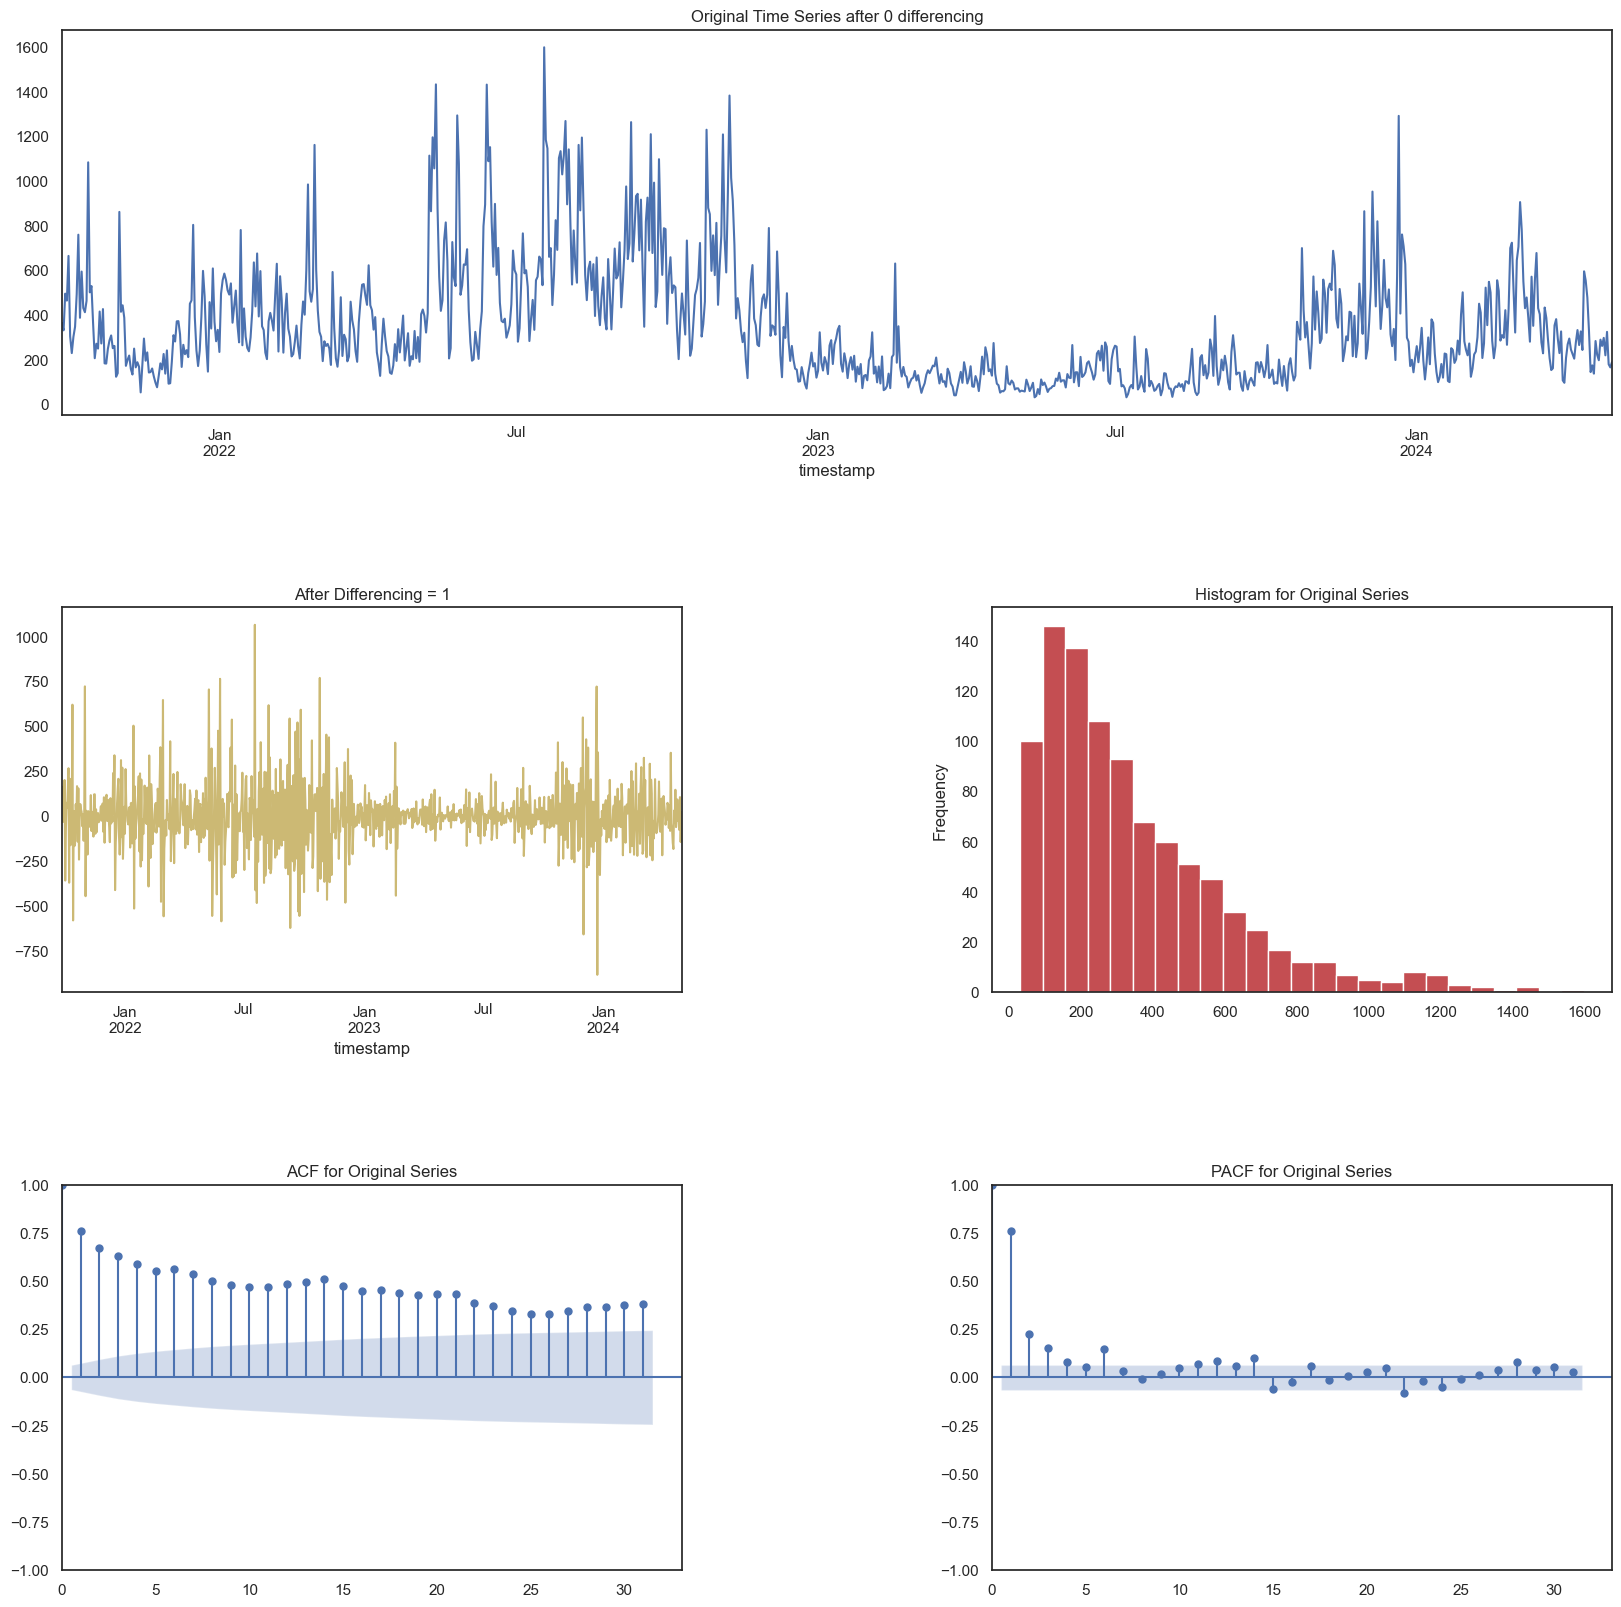

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=11857.411, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=11764.661, Time=0.44 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=11703.885, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=11855.412, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=11701.886, Time=0.58 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=11703.893, Time=0.78 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=11702.143, Time=1.39 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=11659.043, Time=0.50 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   

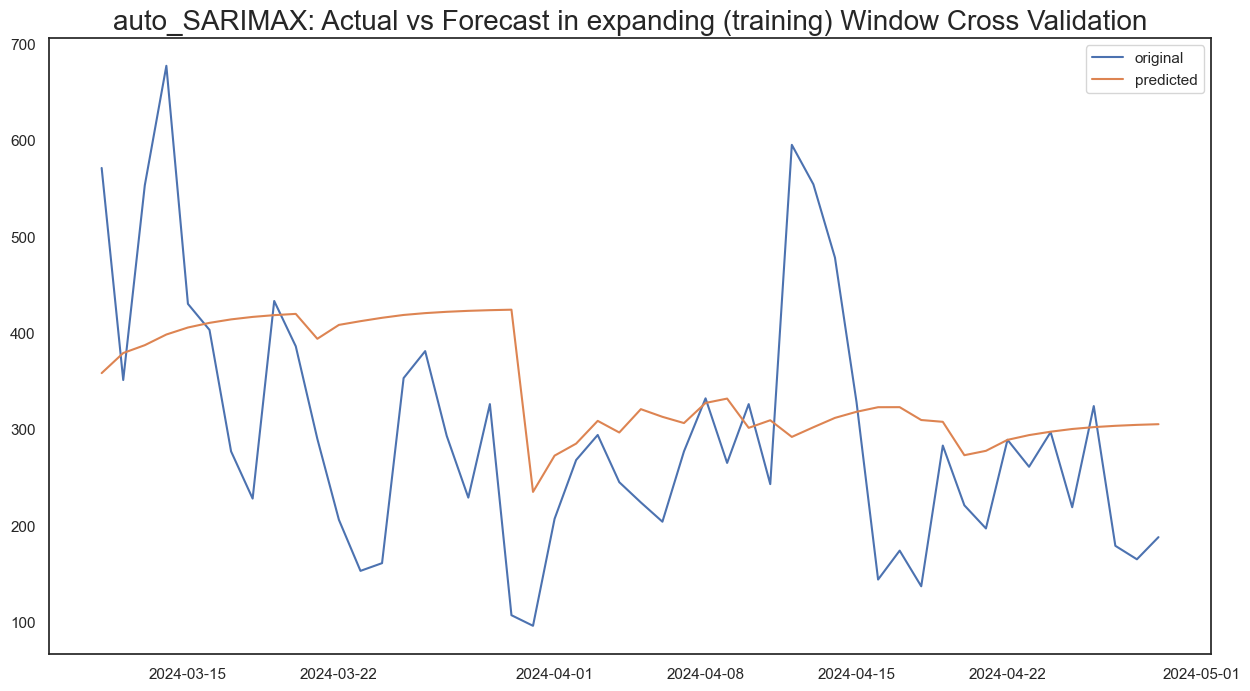

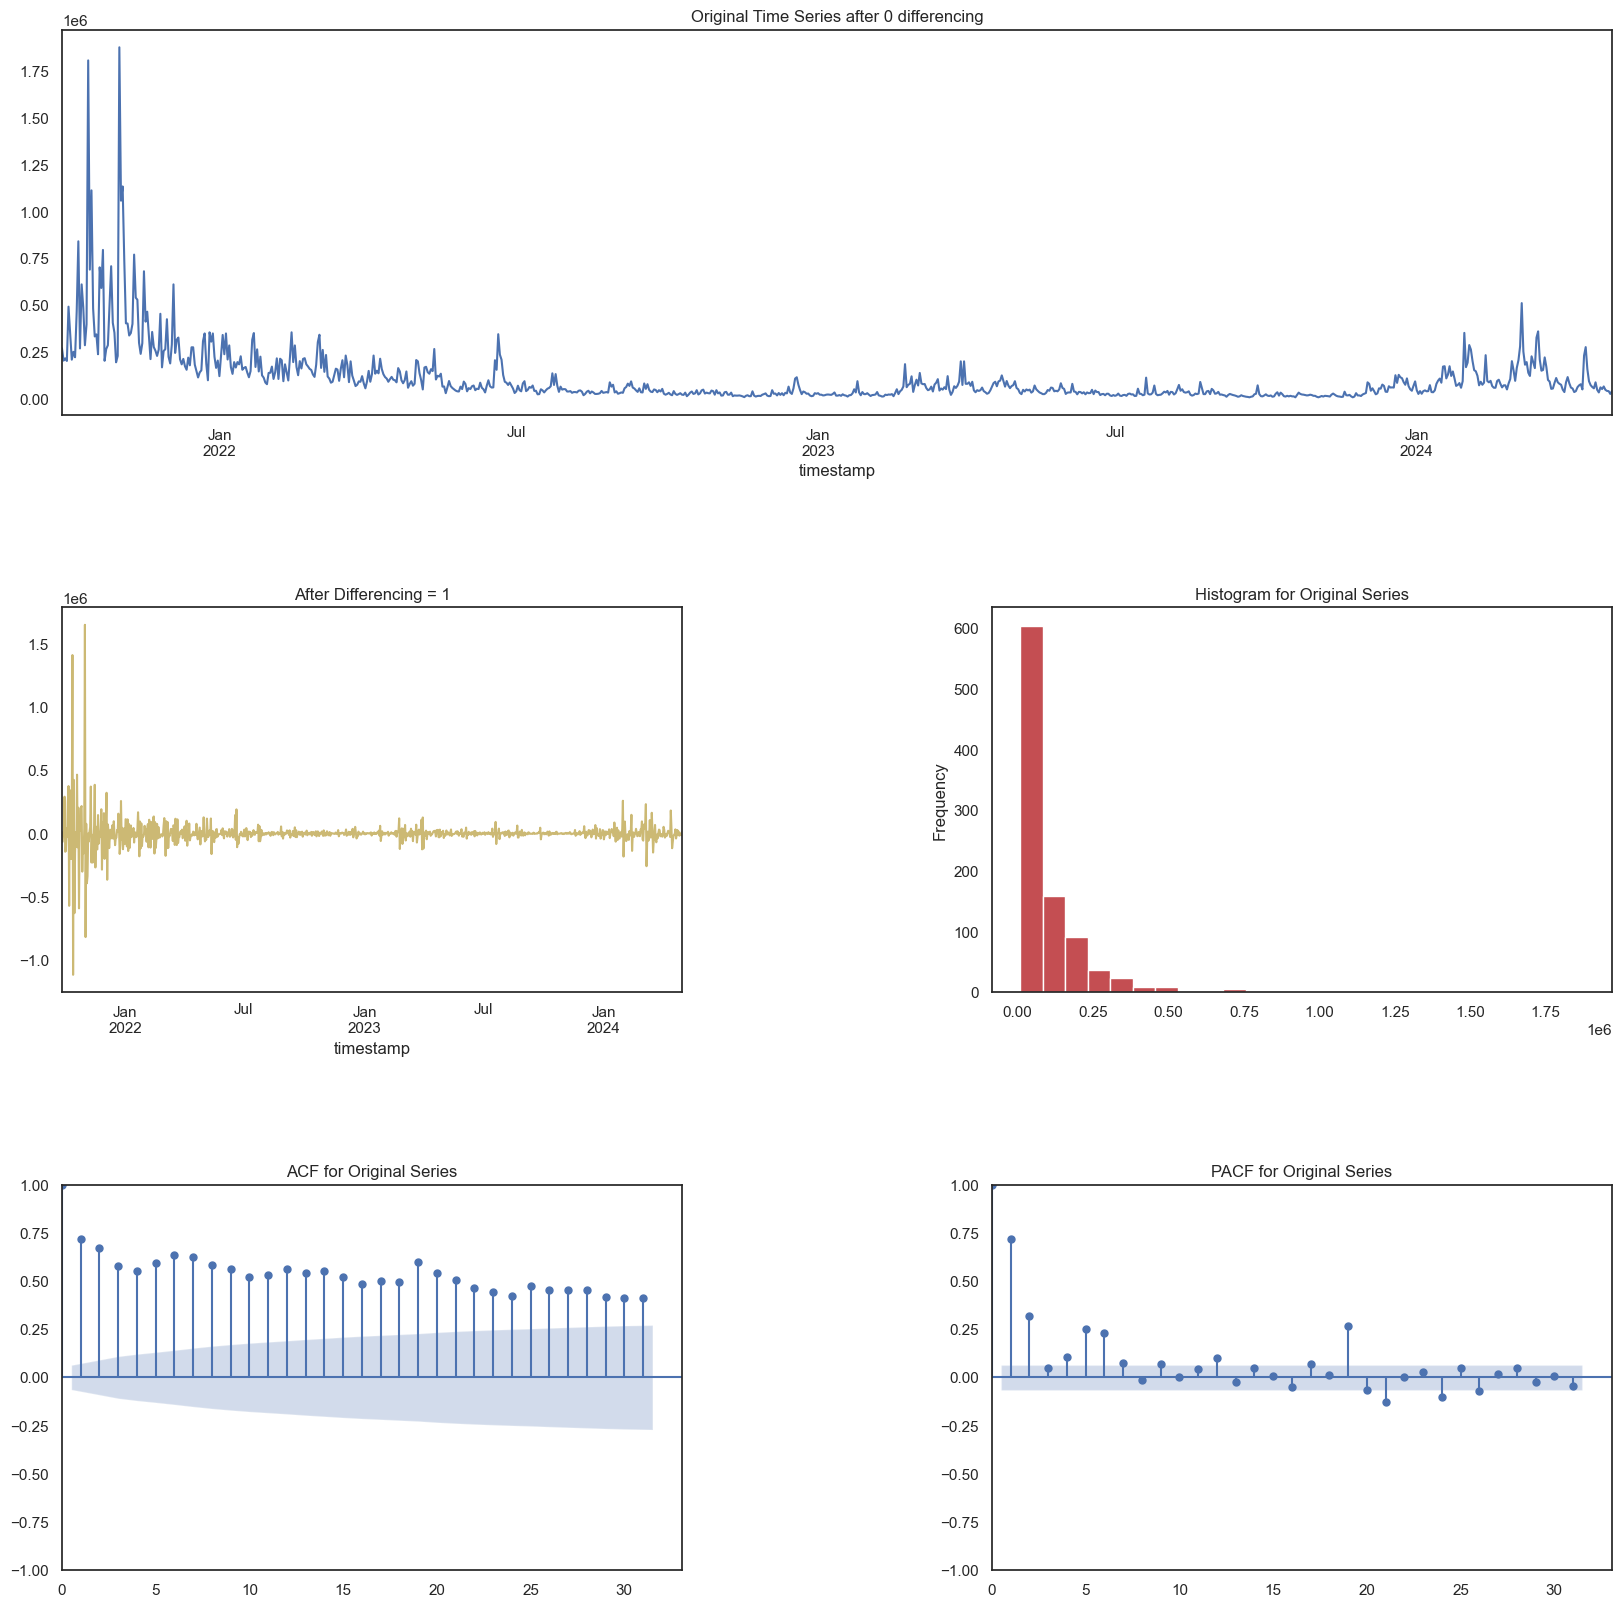

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 896 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=23397.952, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=23220.133, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=23137.819, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=23395.954, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=23138.369, Time=0.10 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=23135.137, Time=0.54 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=23138.575, Time=0.23 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=23111.987, Time=1.55 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   

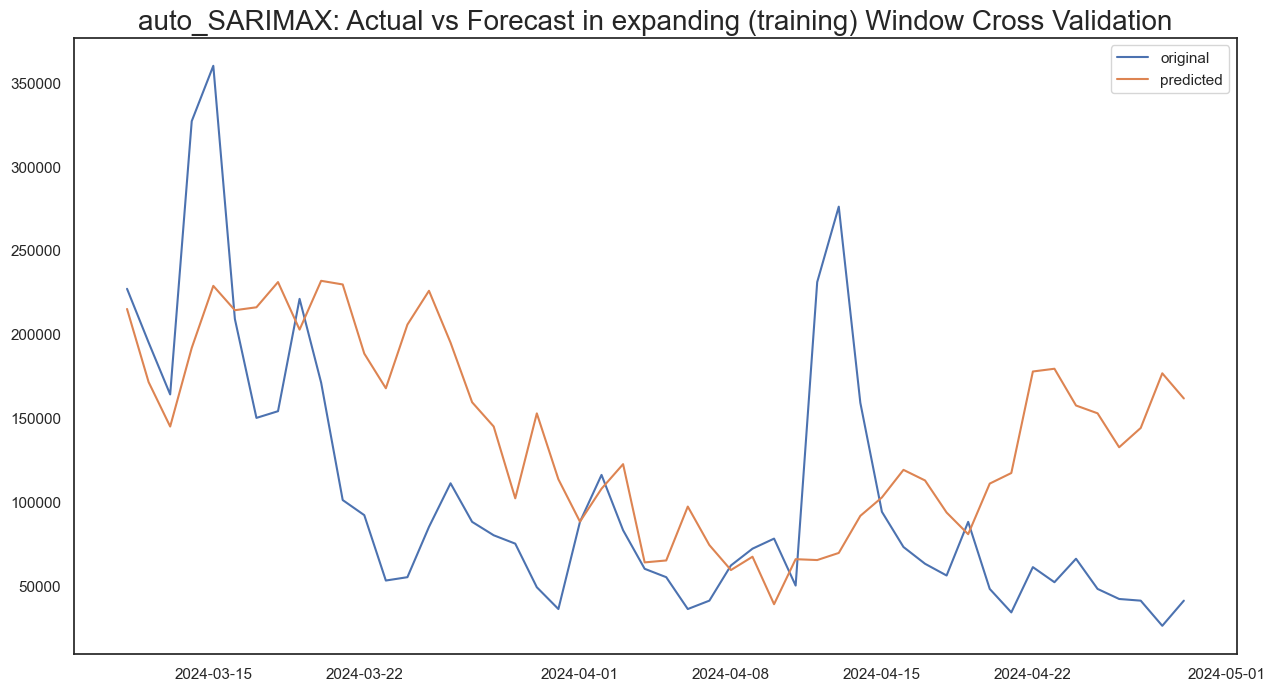

In [72]:
# Crear un diccionario para almacenar los modelos
trained_models = {}

# Iterar sobre cada columna seleccionada
for column in columns_to_model:
    # Excluir 'Open_time' del bucle de iteración
    if column != 'Open_time':
        # Seleccionar solo la columna actual y la columna de tiempo (Open_time)
        data = feature_dataset[['Open_time', column]]
        
        # Renombrar las columnas para que auto_ts pueda identificar la columna de tiempo
        data.columns = ['timestamp', 'target']
        
        # Convertir la columna de tiempo a tipo datetime
        data['timestamp'] = pd.to_datetime(data['timestamp'])
        
        # Entrenar el modelo utilizando auto_timeseries
        model = auto_timeseries(score_type='rmse', time_interval='D',
                                non_seasonal_pdq=None, seasonality=True,
                                model_type='stats', verbose=2, forecast_period=n_days_to_predict, cv=10)
        
        model.fit(data, 'timestamp', 'target')
        
        # Guardar el modelo en el diccionario
        trained_models[column] = model

#### Guardo el mejor modelo para cada columna

In [73]:
for column, model in trained_models.items():
    # Guarda el modelo en un archivo usando dill
    with open(f"auto_timeseries_models/{column}.pkl", "wb") as file:
        dill.dump(model, file)

#### Vuelvo a armar el mejor modelo para cada columna

In [74]:
loaded_models = {}

# Itera sobre los archivos guardados
for column in columns_to_model:
    if column != 'Open_time':
        # Cargar el modelo desde el archivo
        with open(f"auto_timeseries_models/{column}.pkl", "rb") as file:
            loaded_model = dill.load(file)
        
        # Guardar el modelo cargado en el diccionario
        loaded_models[column] = loaded_model

#### Prediccion N dias en el futuro

In [75]:
def calcular_indicadores_tecnicos(predictions_next_day, feature_dataset, n_days_to_predict):
    # Concatenar la columna Close de predictions_next_day y feature_dataset
    concatenated_df = pd.concat([feature_dataset['Close'], predictions_next_day['Close']], axis=0)

    # Calcular los indicadores sobre el nuevo dataset
    close_prices = np.array(concatenated_df, dtype=np.double)
    sma_20 = talib.SMA(close_prices, timeperiod=30)
    ema_20 = talib.EMA(close_prices, timeperiod=30)
    upper_band, middle_band, lower_band = talib.BBANDS(close_prices, timeperiod=30, nbdevup=2, nbdevdn=2)
    rsi = talib.RSI(close_prices, timeperiod=24)

    # Crear un DataFrame para almacenar los indicadores técnicos
    indicadores = pd.DataFrame({
        'SMA_20': sma_20,
        'EMA_20': ema_20,
        'Upper_Band': upper_band,
        'Middle_Band': middle_band,
        'Lower_Band': lower_band,
        'RSI': rsi
    })

    # Obtener los últimos N registros del dataset con los indicadores
    ultimos_indicadores = indicadores.tail(n_days_to_predict)
    ultimos_indicadores.index = predictions_next_day.index

    # Unir los DataFrames por sus índices
    resultado = pd.concat([predictions_next_day, ultimos_indicadores], axis=1)


    return resultado

In [76]:
def hacer_predicciones_para_N_dias_siguientes(trained_models, n_days_to_predict):
    predictions = {}

    for feature, model in trained_models.items():
        
        # Realizar la predicción para la característica actual
        prediction = model.predict(testdata=n_days_to_predict, model='best')
        print(prediction)
        # Obtener solo el valor 'yhat' de la predicción
        prediction_yhat = prediction['yhat']
        
        # Dependiendo del modelo seleccionado, es como se llama la columna fecha
        if 'ds' in prediction.columns:
            prediction_open_time = prediction['ds']
        elif 'target' in prediction.columns:
            prediction_open_time = prediction['target']
        else:
            prediction_open_time = prediction.index
        
        # Almacenar la predicción en el diccionario
        predictions[feature] = prediction_yhat
        predictions['Open_time'] = prediction_open_time

    # Convertir el diccionario de predicciones en un DataFrame de pandas
    predictions_df = pd.DataFrame(predictions)

    return predictions_df

In [77]:
predictions_next_day = hacer_predicciones_para_N_dias_siguientes(loaded_models, n_days_to_predict)
display(predictions_next_day)

predictions_next_day = calcular_indicadores_tecnicos(predictions_next_day, feature_dataset, n_days_to_predict )
display(predictions_next_day)

Predicting using forecast period=10 as input for auto_SARIMAX model
target      yhat  mean_se  mean_ci_lower  mean_ci_upper
2024-04-30  6.73     0.79           5.17           8.29
2024-05-01  6.76     1.10           4.59           8.92
2024-05-02  6.78     1.35           4.14           9.42
2024-05-03  6.84     1.55           3.80           9.88
2024-05-04  6.81     1.73           3.42          10.21
2024-05-05  6.82     1.90           3.10          10.54
2024-05-06  6.82     2.05           2.80          10.83
2024-05-07  6.73     2.19           2.44          11.02
2024-05-08  6.67     2.32           2.13          11.22
2024-05-09  6.71     2.45           1.92          11.50
Predicting using forecast period=10 as input for auto_SARIMAX model
target      yhat  mean_se  mean_ci_lower  mean_ci_upper
2024-04-30  6.81     0.71           5.42           8.20
2024-05-01  6.83     1.06           4.74           8.92
2024-05-02  6.85     1.31           4.29           9.42
2024-05-03  6.86     1.5

target          yhat   mean_se  mean_ci_lower  mean_ci_upper
2024-04-30 559147.72 366244.69     -158678.69     1276974.13
2024-05-01 670223.56 422475.86     -157813.90     1498261.03
2024-05-02 723185.73 443719.09     -146487.70     1592859.17
2024-05-03 757142.43 453413.66     -131532.01     1645816.87
2024-05-04 752025.18 458676.50     -146964.24     1651014.59
2024-05-05 781903.54 462048.82     -123695.51     1687502.59
2024-05-06 719591.40 464540.78     -190891.79     1630074.60
2024-05-07 719776.93 466593.02     -194728.58     1634282.45
2024-05-08 789180.28 468413.76     -128893.82     1707254.39
2024-05-09 813820.52 470107.71     -107573.67     1735214.71
Predicting using forecast period=10 as input for auto_SARIMAX model
target          yhat   mean_se  mean_ci_lower  mean_ci_upper
2024-04-30 338135.70 146929.84       50158.49      626112.90
2024-05-01 353488.53 169670.37       20940.72      686036.34
2024-05-02 396295.13 180420.20       42678.03      749912.24
2024-05-03 402720

Open  Open_time  High  Low  Close  Number of trades  \
2024-04-30  6.73 2024-04-30  6.81 6.52   6.56          75268.33   
2024-05-01  6.76 2024-05-01  6.83 6.52   6.63         120241.20   
2024-05-02  6.78 2024-05-02  6.85 6.62   6.63         138359.15   
2024-05-03  6.84 2024-05-03  6.86 6.70   6.65         117358.80   
2024-05-04  6.81 2024-05-04  6.88 6.57   6.60          98602.15   
2024-05-05  6.82 2024-05-05  6.88 6.61   6.63         115042.81   
2024-05-06  6.82 2024-05-06  6.88 6.28   6.47         102310.01   
2024-05-07  6.73 2024-05-07  6.85 6.14   6.45          88475.39   
2024-05-08  6.67 2024-05-08  6.85 6.31   6.44          92334.39   
2024-05-09  6.71 2024-05-09  6.85 6.35   6.47         108472.43   

            Close_BTCUSDT  Volume_BTCUSDT  Number_of_trades_BTCUSDT  \
2024-04-30       63968.01        34064.10                1237724.65   
2024-05-01       64106.72        33428.77                1046846.04   
2024-05-02       64243.61        38060.12                1132113.39   
2024-05-03       64380.86        29462.00                1326141.02   
2024-05-04       64518.33        20323.73                1170358.80   
2024-05-05       64656.04        19650.57                1043021.95   
2024-05-06       64793.99        25133.51                1235762.80   
2024-05-07       64932.18        34241.95                1249236.64   
2024-05-08       65070.61        37755.94                1019687.95   
2024-05-09       65209.27        33992.21                1071131.65   

            Close_ETHUSDT  Volume_ETHUSDT  Number_of_trades_ETHUSDT  \
2024-04-30        3222.26       436622.10                1097393.04   
2024-05-01        3227.80       432529.57                1097376.21   
2024-05-02        3233.36       389512.61                1055611.74   
2024-05-03        3238.92       326494.30                 962862.84   
2024-05-04        3244.49       281985.78                 923788.64   
2024-05-05        3250.08       282598.16                1003080.99   
2024-05-06        3255.68       322106.68                1104144.73   
2024-05-07        3261.28       365993.23                1201480.16   
2024-05-08        3266.90       377374.08                1204405.14   
2024-05-09        3272.53       344437.77                1109669.76   

            Close_BNBUSDT  Volume_BNBUSDT  Number_of_trades_BNBUSDT  \
2024-04-30         594.52       559147.72                 338135.70   
2024-05-01         595.55       670223.56                 353488.53   
2024-05-02         596.63       723185.73                 396295.13   
2024-05-03         597.71       757142.43                 402720.08   
2024-05-04         598.79       752025.18                 371272.41   
2024-05-05         599.87       781903.54                 387523.49   
2024-05-06         600.96       719591.40                 379431.97   
2024-05-07         602.04       719776.93                 378289.20   
2024-05-08         603.13       789180.28                 408124.50   
2024-05-09         604.22       813820.52                 413172.50   

            buy_1000x_high_coinbase  sell_1000x_high_coinbase  \
2024-04-30                    59.13                     37.14   
2024-05-01                    48.12                     38.42   
2024-05-02                    51.36                     41.14   
2024-05-03                    38.98                     41.71   
2024-05-04                    46.52                     42.39   
2024-05-05                    35.16                     42.96   
2024-05-06                    39.36                     43.21   
2024-05-07                    36.76                     43.42   
2024-05-08                    50.19                     43.56   
2024-05-09                    46.30                     43.63   

            total_trades_coinbase  Tweets_Utilizados  Tweets_Utilizados_coin  \
2024-04-30               35628.54             149.35                  142.08   
2024-05-01               36521.94             172.44

Open  Open_time  High  Low  Close  Number of trades  \
2024-04-30  6.73 2024-04-30  6.81 6.52   6.56          75268.33   
2024-05-01  6.76 2024-05-01  6.83 6.52   6.63         120241.20   
2024-05-02  6.78 2024-05-02  6.85 6.62   6.63         138359.15   
2024-05-03  6.84 2024-05-03  6.86 6.70   6.65         117358.80   
2024-05-04  6.81 2024-05-04  6.88 6.57   6.60          98602.15   
2024-05-05  6.82 2024-05-05  6.88 6.61   6.63         115042.81   
2024-05-06  6.82 2024-05-06  6.88 6.28   6.47         102310.01   
2024-05-07  6.73 2024-05-07  6.85 6.14   6.45          88475.39   
2024-05-08  6.67 2024-05-08  6.85 6.31   6.44          92334.39   
2024-05-09  6.71 2024-05-09  6.85 6.35   6.47         108472.43   

            Close_BTCUSDT  Volume_BTCUSDT  Number_of_trades_BTCUSDT  \
2024-04-30       63968.01        34064.10                1237724.65   
2024-05-01       64106.72        33428.77                1046846.04   
2024-05-02       64243.61        38060.12                1132113.39   
2024-05-03       64380.86        29462.00                1326141.02   
2024-05-04       64518.33        20323.73                1170358.80   
2024-05-05       64656.04        19650.57                1043021.95   
2024-05-06       64793.99        25133.51                1235762.80   
2024-05-07       64932.18        34241.95                1249236.64   
2024-05-08       65070.61        37755.94                1019687.95   
2024-05-09       65209.27        33992.21                1071131.65   

            Close_ETHUSDT  Volume_ETHUSDT  Number_of_trades_ETHUSDT  \
2024-04-30        3222.26       436622.10                1097393.04   
2024-05-01        3227.80       432529.57                1097376.21   
2024-05-02        3233.36       389512.61                1055611.74   
2024-05-03        3238.92       326494.30                 962862.84   
2024-05-04        3244.49       281985.78                 923788.64   
2024-05-05        3250.08       282598.16                1003080.99   
2024-05-06        3255.68       322106.68                1104144.73   
2024-05-07        3261.28       365993.23                1201480.16   
2024-05-08        3266.90       377374.08                1204405.14   
2024-05-09        3272.53       344437.77                1109669.76   

            Close_BNBUSDT  Volume_BNBUSDT  Number_of_trades_BNBUSDT  \
2024-04-30         594.52       559147.72                 338135.70   
2024-05-01         595.55       670223.56                 353488.53   
2024-05-02         596.63       723185.73                 396295.13   
2024-05-03         597.71       757142.43                 402720.08   
2024-05-04         598.79       752025.18                 371272.41   
2024-05-05         599.87       781903.54                 387523.49   
2024-05-06         600.96       719591.40                 379431.97   
2024-05-07         602.04       719776.93                 378289.20   
2024-05-08         603.13       789180.28                 408124.50   
2024-05-09         604.22       813820.52                 413172.50   

            buy_1000x_high_coinbase  sell_1000x_high_coinbase  \
2024-04-30                    59.13                     37.14   
2024-05-01                    48.12                     38.42   
2024-05-02                    51.36                     41.14   
2024-05-03                    38.98                     41.71   
2024-05-04                    46.52                     42.39   
2024-05-05                    35.16                     42.96   
2024-05-06                    39.36                     43.21   
2024-05-07                    36.76                     43.42   
2024-05-08                    50.19                     43.56   
2024-05-09                    46.30                     43.63   

            total_trades_coinbase  Tweets_Utilizados  Tweets_Utilizados_coin  \
2024-04-30               35628.54             149.35                  142.08   
2024-05-01               36521.94             172.44

In [78]:
predictions_next_day.to_csv('auto_timeseries_models/predicciones.csv', index=False)

Si predice maso menos bien para estas variables hacer lo siguiente:
- tengo forma de tunear la libreria para que performe mejor?
- existe alguna otra libreria de auto ml pra series que funcione mejor? 


- Armar el clasificador (LSTM o CONV), entrenandolo sobre los datos del dataset original ( sin los ultimos 5 registros)
- Probar como predice el target (Tendencia) para los ultimos 5 registros con los datos generados por los modelos